In [1]:
##import PySide2   this will force pyqtgraph to use PySide2 instead of PyQt5
#from PyQt5 import QtGui   (the example applies equally well to PySide2)
#import pyqtgraph as pg
import numpy as np
#pg.mkQApp()
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/general_data.csv')
data

Name  Suvmax_heart  Vol_ml_heart  Vol_mean_heart  SUVMean_heart  \
0   TCGA-34-2609         10.52         12.43           44.21           3.56   
1   TCGA-34-5234          2.64         12.13           25.07           2.07   
2   TCGA-34-5239          1.81         12.22           18.10           1.48   
3   TCGA-34-5240         11.65         10.76           54.12           5.03   
4   TCGA-34-7107          4.36         10.76           22.08           2.05   
5   TCGA-34-A5IX          7.60         12.81           45.82           3.58   
6   TCGA-51-4079         16.42         12.75          113.09           8.87   
7   TCGA-51-4080          2.24         16.35           27.34           1.67   
8   TCGA-60-2695          3.38          9.27           25.02           2.70   
9   TCGA-60-2696         12.72         10.78           89.08           8.27   
10  TCGA-60-2715          2.24          9.34           16.78           1.80   
11  TCGA-60-2719          2.66          9.63           19.76           2.05   
12  TCGA-60-2721          3.35         13.01           30.47           2.34   
13  TCGA-60-2722          4.12         15.38           42.45           2.76   
14  TCGA-60-2723         16.12          8.98           89.38           9.95   
15  TCGA-60-2726         14.50         15.13          109.30           7.22   
16  TCGA-34-5236           NaN           NaN             NaN            NaN   

    SD_heart  Suvmax_liver  Vol_ml_liver  Vol_mean_liver  SUVMean_liver  ...  \
0       1.68          3.62          8.05           20.44           2.54  ...   
1       0.26          3.87          9.49           28.61           3.02  ...   
2       0.44          2.20          9.98           19.46           1.95  ...   
3       2.77          2.16         12.71           19.21           1.51  ...   
4       0.77          2.32          9.49           15.94           1.68  ...   
5       1.59          2.79         13.79           21.72           1.58  ...   
6       3.87          2.53          9.28           15.50           1.67  ...   
7       0.24          2.42         10.93           20.83           1.91  ...   
8       0.27          3.87         13.72           38.13           2.78  ...   
9       2.29          2.42          8.77           16.32           1.86  ...   
10      0.18          3.05          7.90           19.17           2.43  ...   
11      0.21          2.88          7.90           12.08           1.53  ...   
12      0.40          3.29          8.48           23.01           2.71  ...   
13      0.55          3.46         11.14           26.50           2.38  ...   
14      3.93          1.56          7.69            9.81           1.28  ...   
15      3.53          2.60          9.19           20.50           2.23  ...   
16       NaN           NaN           NaN             NaN            NaN  ...   

    SuvMax_oblL   Vol_ml_oblL   Volmean_oblL   SUVMean_oblL  SD_oblL  \
0          0.88         20.40          11.12           0.55     0.13   
1          1.12         13.10           8.83           0.67     0.20   
2          2.73         16.04          10.16           0.63     0.27   
3          0.71          8.12           3.91           0.48     0.11   
4          0.95         24.16          13.61           0.56     0.14   
5          1.34         16.53          11.16           0.67     0.20   
6          0.81         14.44           5.70           0.39     0.14   
7          2.18         20.15           9.16           0.45     0.25   
8          1.43         16.53          11.34           0.69     0.21   
9          1.60         14.08          10.74           0.76     0.25   
10         1.12         14.44           9.57           0.66     0.17   
11         1.07          9.92           6.32           0.64     0.16   
12         1.96         19.83          15.25           0.77     0.23   
13         0.97         28.96          13.41           0.46     0.14   
14         1.18         13.87           9.96           0.72     0.15

In [78]:
demogr_data = data[['Alive', 'Male', 'Race', 'Stage', 'Age', 'Height', 'Weight', 'BMI']]
demogr_data = demogr_data.rename(columns={'Male': 'Sex'})
demogr_data['Height'] = demogr_data['Height'].replace(np.nan, 1.72)
demogr_data['BMI'] = (demogr_data['Weight'])/(demogr_data['Height']**2)
demogr_data['Sex'] = demogr_data['Sex'].apply(lambda x: 'Male' if x == 1 else 'Female')
demogr_data

Alive     Sex   Race Stage  Age  Height  Weight        BMI
0       0    Male  Black   iib   82    1.72    72.6  24.540292
1       1  Female  White    ia   71    1.62    65.0  24.767566
2       1    Male  White  iiia   75    1.70    76.0  26.297578
3       1  Female  White   iib   73    1.70    57.0  19.723183
4       0    Male  White    ii   70    1.68    78.0  27.636054
5       1    Male  White   iib   80    1.78    83.0  26.196187
6       0  Female  Black    ib   73    1.72    91.3  30.861276
7       0    Male  Black  iiib   66    1.72    89.0  30.083829
8       1  Female  White    ib   74    1.49    85.0  38.286564
9       0  Female  Black   iia   76    1.70    56.0  19.377163
10      0    Male  White    ia   52    1.80    58.0  17.901235
11      1  Female  White    ib   83    1.55    52.0  21.644121
12      1    Male  White    ib   74    1.74    68.0  22.460034
13      1    Male  White   iib   66    2.01   107.0  26.484493
14      1  Female  White    ib   74    1.60    54.0  21.093750
15      0    Male  White   iia   56    1.80    70.0  21.604938
16      0    Male  White   iib   60    1.75    73.0  23.836735

Graphs for categorical variables

In [130]:
stacked = pd.pivot_table(demogr_data.drop(['Alive', 'Stage'], axis=1), index=['Sex', 
                                  'Race'], aggfunc=[np.mean, np.std]).unstack(0).stack(0)
df = pd.DataFrame(stacked)
import dataframe_image as dfi
df_styled = df.style.background_gradient() #adding a gradient based on values in cell
dfi.export(df_styled,"mytable.png")
df

Age                   BMI               Height            \
Sex            Female       Male     Female       Male    Female      Male   
Race                                                                         
Black mean  74.500000  74.000000  25.119219  27.312061  1.710000  1.720000   
      std    2.121320  11.313708   8.120495   3.919873  0.014142  0.000000   
White mean  75.000000  66.625000  25.103037  24.052157  1.592000  1.782500   
      std    4.636809   9.898593   7.597684   3.268974  0.078549  0.101805   

               Weight             
Sex            Female       Male  
Race                              
Black mean  73.650000  80.800000  
      std   24.960869  11.596551  
White mean  62.600000  76.625000  
      std   13.464769  14.362028

In [170]:
stacked = pd.DataFrame(demogr_data.drop(['Age', 'Weight', 'Height', 'BMI'], axis=1))
stacked

Alive     Sex   Race Stage
0       0    Male  Black   iib
1       1  Female  White    ia
2       1    Male  White  iiia
3       1  Female  White   iib
4       0    Male  White    ii
5       1    Male  White   iib
6       0  Female  Black    ib
7       0    Male  Black  iiib
8       1  Female  White    ib
9       0  Female  Black   iia
10      0    Male  White    ia
11      1  Female  White    ib
12      1    Male  White    ib
13      1    Male  White   iib
14      1  Female  White    ib
15      0    Male  White   iia
16      0    Male  White   iib

In [191]:
percentile_b = 4/17
percentile_w = 13/17
sex_m = 10/17
sex_f = 7/17
is_alive = 9/17
newdf = pd.DataFrame({'Race':['Black', 'White'], 'Number':[4, 13], 'Percentile':[percentile_b*100, percentile_w*100]})
newdf.set_index('Race')
newdf1 = pd.DataFrame({'Alive':['Yes', 'No'], 'Number':[9, 8], 'Percentile':[is_alive*100, 100-is_alive*100]})
newdf1.set_index('Alive')
newdf2 = pd.DataFrame({'Sex':['Male', 'Female'], 'Number':[10, 7], 'Percentile':[sex_m*100, sex_f*100]})
newdf2.set_index('Sex')
newdf2

Sex  Number  Percentile
0    Male      10   58.823529
1  Female       7   41.176471

In [3]:
from scipy import stats
from pingouin import multivariate_normality
from scipy.stats import kendalltau, spearmanr, pearsonr
pearsonr(data['Weight'], data['WBM'])

(0.8509585551048309, 1.488462126694018e-05)

C:\Users\w\anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.9.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [230]:
par = np.polyfit(data['Weight'], data['WBM'], 1, full=True)
slope=par[0][0]
intercept=par[0][1]
y_predicted = [slope*i + intercept  for i in data['Weight']]

# plot it
fig=figure(background_fill_color='white',background_fill_alpha=0.3)
fig.circle(data['Weight'], data['WBM'],color='blue' )
fig.line(data['Weight'],y_predicted,color='green',
         legend_label='r='+str(0.85)+'p-value='+str(1.48e-05))
show(fig)


In [57]:
pearsonr(data_luad['Weight'], data_luad['FFM'])

(0.6751709045135311, 0.0015145320434721205)

In [56]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(data_luad, x="Weight", y="FFM", trendline='ols', template='plotly_white')
fig.update_layout(
    legend=dict(
    orientation="h"),
    annotations=[go.layout.Annotation(text='r=0.85, p-value=1.48e -05', x=85, y=88.81419)],
    xaxis_title="Weight (kg)",
    yaxis_title="Calculated Weight (kg)",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)
fig.show()
fig.write_image("weight_luad.jpeg")

In [53]:
data.columns

Index(['Name', 'Suvmax_heart', 'Vol_ml_heart', 'Vol_mean_heart',
       'SUVMean_heart', 'SD_heart', 'Suvmax_liver', 'Vol_ml_liver',
       'Vol_mean_liver', 'SUVMean_liver', 'SD_liver', 'Suvmax_deltoid',
       'Vol_ml_deltoid', 'Vol_mean_deltoid', 'SUVMean_deltoid', 'SD_deltoid',
       'Suvmax_scwat', 'Vol_ml_scwat', 'Vol_mean_scwat', 'SUVMean_scwat',
       'SD_scwat', 'Suvmax_brain', 'Vol_ml_brain', 'Vol_mean_brain',
       'SUVMean_brain', 'SD_brain', 'Alive', 'Male', 'Race', 'Age', 'Stage',
       'Height', 'Weight', 'BMI', 'Suv Max', 'FFM', 'FM', 'WBM', 'Vol_ml',
       'Vol_mean', 'SUVMean', 'SUVsd', 'SUV_Peak', 'Vol_ml_vat',
       ' Vol_mean_vat', ' SUVMean_vat', ' SD_vat', 'SuvMax_tumor',
       'Vol_ml_tumor', 'Vol_mean_tumor', 'SUVMean_tumor', 'SUVsd_tumor',
       'SUVpeak_tumor', 'SUVqPeak_tumor', 'SuvMax_psR', ' Vol_ml_psR',
       ' Volmean_psR', ' SUVMean_psR', 'SD_psR', 'SuvMax_psL', ' Vol_ml_psL',
       ' Volmean_psL', ' SUVMean_psL', 'SD_psL', 'SuvMax_parR', ' Vo

In [7]:
suv_mean_muscle = data[[' SUVMean_psR', ' SUVMean_psL', ' SUVMean_parR', ' SUVMean_parL',' SUVMean_oblR', ' SUVMean_oblL', ' SUVMean_rec']]
suv_mean_muscle['R.Psoas'] = suv_mean_muscle[' SUVMean_psR']
suv_mean_muscle['L.Psoas'] = suv_mean_muscle[' SUVMean_psL']
suv_mean_muscle['R.Paraspinal'] = suv_mean_muscle[' SUVMean_parR']
suv_mean_muscle['L.Paraspinal'] = suv_mean_muscle[' SUVMean_parL']
suv_mean_muscle['R.Oblique'] = suv_mean_muscle[' SUVMean_oblR']
suv_mean_muscle['L.Oblique'] = suv_mean_muscle[' SUVMean_oblL']
suv_mean_muscle['Rectus'] = suv_mean_muscle[' SUVMean_rec']
suv_mean_muscle.drop([' SUVMean_psR', ' SUVMean_psL', ' SUVMean_parR', ' SUVMean_parL',' SUVMean_oblR', ' SUVMean_oblL', ' SUVMean_rec'], axis=1, inplace=True)

C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [54]:
data_luad = pd.read_csv('data/csvCollection.csv')
data_luad
luad_muscle = data_luad[[' SUVMean_psR', ' SUVMean_psL', ' SUVMean_parR', ' SUVMean_parL',' SUVMean_oblR', ' SUVMean_oblL', ' SUVMean_rec']]
luad_muscle['R.Psoas'] = luad_muscle[' SUVMean_psR']
luad_muscle['L.Psoas'] = luad_muscle[' SUVMean_psL']
luad_muscle['R.Paraspinal'] = luad_muscle[' SUVMean_parR']
luad_muscle['L.Paraspinal'] = luad_muscle[' SUVMean_parL']
luad_muscle['R.Oblique'] = luad_muscle[' SUVMean_oblR']
luad_muscle['L.Oblique'] = luad_muscle[' SUVMean_oblL']
luad_muscle['Rectus'] = luad_muscle[' SUVMean_rec']
luad_muscle.drop([' SUVMean_psR', ' SUVMean_psL', ' SUVMean_parR', ' SUVMean_parL',' SUVMean_oblR', ' SUVMean_oblL', ' SUVMean_rec'], axis=1, inplace=True)

C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [16]:
data_luad.columns

Index(['Name', 'ID', 'Date', 'Alive', 'Male', 'Stage', 'Race', 'Age',
       'SuvMax_psR', ' Vol_ml_psR', ' Volmean_psR', ' SUVMean_psR', 'SD_psR',
       'SuvMax_psL', ' Vol_ml_psL', ' Volmean_psL', ' SUVMean_psL', 'SD_psL',
       'SuvMax_parR', ' Vol_ml_parR', ' Volmean_parR', ' SUVMean_parR',
       'SD_parR', 'SuvMax_parL', ' Vol_ml_parL', ' Volmean_parL',
       ' SUVMean_parL', 'SD_parL', 'SuvMax_oblR', ' Vol_ml_oblR',
       ' Volmean_oblR', ' SUVMean_oblR', 'SD_oblR', 'SuvMax_oblL',
       ' Vol_ml_oblL', ' Volmean_oblL', ' SUVMean_oblL', 'SD_oblL',
       'SuvMax_rec', ' Vol_ml_rec', ' Volmean_rec', ' SUVMean_rec', 'SD_rec',
       'Suvmax_heart', 'Vol_ml_heart', 'Vol_mean_heart', 'SUVMean_heart',
       'SD_heart', 'Suvmax_liver', 'Vol_ml_liver', 'Vol_mean_liver',
       'SUVMean_liver', 'SD_liver', 'Suvmax_deltoid', 'Vol_ml_deltoid',
       'Vol_mean_deltoid', 'SUVMean_deltoid', 'SD_deltoid', 'Suvmax_scwat',
       'Vol_ml_scwat', 'Vol_mean_scwat', 'SUVMean_scwat', 'SD_scwa

In [37]:
tumor_luad['LUAD'] = pd.DataFrame(data_luad['SUVMean_tumor'])
tumor_lusc['LUSC'] = pd.DataFrame(data['SUVMean_tumor'])
tumor_data = pd.concat([tumor_luad, tumor_lusc], axis=1)
tumor_data.drop(['SUVMean_tumor', 'SUVMean_tumor'], axis=1, inplace=True)

In [38]:
tumor_data

LUAD   LUSC
0   3.70   7.39
1    NaN   6.29
2   4.22   4.66
3   4.95   8.27
4   4.37   4.33
5   5.35   5.99
6    NaN   4.96
7   4.34   6.92
8    NaN   6.45
9   4.09  11.22
10   NaN   2.83
11  8.64   8.85
12  4.03   6.94
13  4.33   5.81
14  4.94   4.46
15  2.79   4.27
16  2.36   5.58
17  3.00    NaN
18  2.81    NaN

In [58]:
fig1 = px.box(pd.melt(tumor_data), x="variable", y="value", points="all", template='plotly_white')
fig1.update_layout(
    legend=dict(
    orientation="h"),
    xaxis_title='Patients Category',
    yaxis_title="SUV Mean (g/mL)",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)
fig1.show()
fig1.write_image("suppl/suv_mean_tumor.jpeg")

In [15]:
fig1 = px.box(pd.melt(luad_muscle), x="variable", y="value", points="all", template='plotly_white')
fig1.update_layout(
    legend=dict(
    orientation="h"),
    xaxis_title='Muscle Type',
    yaxis_title="SUV Mean (g/mL)",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)
fig1.show()
fig1.write_image("suv_mean_luad_muscle.jpeg")

C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

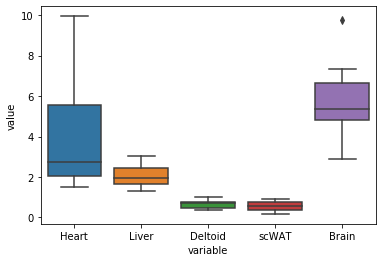

In [103]:
suv_mean_normal = data[['SUVMean_heart', 'SUVMean_liver', 'SUVMean_deltoid', 'SUVMean_scwat', 'SUVMean_brain']]
suv_mean_normal['Heart'] = suv_mean_normal['SUVMean_heart']
suv_mean_normal['Liver'] = suv_mean_normal['SUVMean_liver']
suv_mean_normal['Deltoid'] = suv_mean_normal['SUVMean_deltoid']
suv_mean_normal['scWAT'] = suv_mean_normal['SUVMean_scwat']
suv_mean_normal['Brain'] = suv_mean_normal['SUVMean_brain']
suv_mean_normal.drop(['SUVMean_heart', 'SUVMean_liver', 'SUVMean_deltoid', 'SUVMean_scwat', 'SUVMean_brain'], axis=1, inplace=True)
import seaborn as sns
sns.boxplot(x="variable", y="value", data=pd.melt(suv_mean_normal))
plt.show()

C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

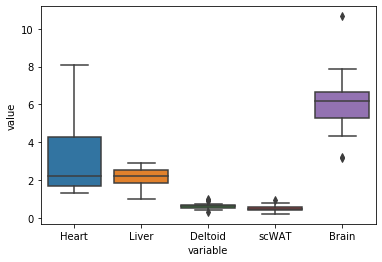

In [42]:
luad_normal = data_luad[['SUVMean_heart', 'SUVMean_liver', 'SUVMean_deltoid', 'SUVMean_scwat', 'SUVMean_brain']]
luad_normal['Heart'] = luad_normal['SUVMean_heart']
luad_normal['Liver'] = luad_normal['SUVMean_liver']
luad_normal['Deltoid'] = luad_normal['SUVMean_deltoid']
luad_normal['scWAT'] = luad_normal['SUVMean_scwat']
luad_normal['Brain'] = luad_normal['SUVMean_brain']
luad_normal.drop(['SUVMean_heart', 'SUVMean_liver', 'SUVMean_deltoid', 'SUVMean_scwat', 'SUVMean_brain'], axis=1, inplace=True)
import seaborn as sns
sns.boxplot(x="variable", y="value", data=pd.melt(luad_normal))
plt.show()

<Figure size 432x288 with 0 Axes>

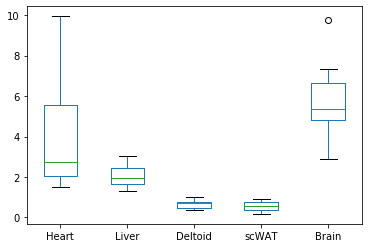

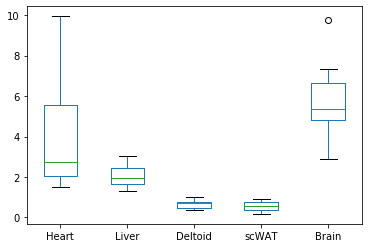

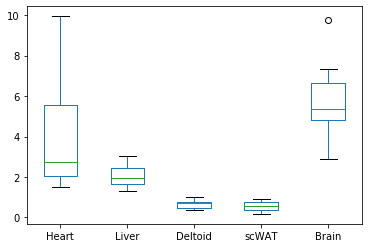

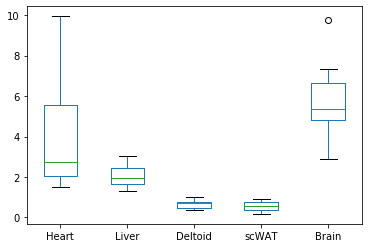

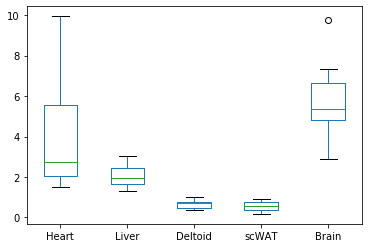

In [105]:
plt.figure()
for column in suv_mean_normal:
    suv_mean_normal.plot(kind='box')

In [43]:
fig1 = px.box(pd.melt(luad_normal), x="variable", y="value", points="all", template='plotly_white')
fig1.update_layout(
    legend=dict(
    orientation="h"),
    xaxis_title='Normal Tissue Type (LUAD)',
    yaxis_title="SUV Mean (g/mL)",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)
fig1.show()
fig1.write_image("luad_normal_bg.jpeg")

In [100]:
suv_mean = pd.DataFrame(suv_mean_normal.unstack())
suv_mean['SUV Mean'] = pd.DataFrame(suv_mean_normal.unstack())
suv_mean.drop(0, axis=1, inplace=True)
suv_mean

SUV Mean
Heart 0       3.56
      1       2.07
      2       1.48
      3       5.03
      4       2.05
...            ...
Brain 12      6.59
      13      6.46
      14      3.51
      15      4.72
      16       NaN

[85 rows x 1 columns]

In [60]:
data['Vol_sub_ml'] = data['Vol_ml'] - data['Vol_ml_vat']
data.columns

Index(['Name', 'Suvmax_heart', 'Vol_ml_heart', 'Vol_mean_heart',
       'SUVMean_heart', 'SD_heart', 'Suvmax_liver', 'Vol_ml_liver',
       'Vol_mean_liver', 'SUVMean_liver', 'SD_liver', 'Suvmax_deltoid',
       'Vol_ml_deltoid', 'Vol_mean_deltoid', 'SUVMean_deltoid', 'SD_deltoid',
       'Suvmax_scwat', 'Vol_ml_scwat', 'Vol_mean_scwat', 'SUVMean_scwat',
       'SD_scwat', 'Suvmax_brain', 'Vol_ml_brain', 'Vol_mean_brain',
       'SUVMean_brain', 'SD_brain', 'Alive', 'Male', 'Race', 'Age', 'Stage',
       'Height', 'Weight', 'BMI', 'Suv Max', 'FFM', 'FM', 'WBM', 'Vol_ml',
       'Vol_mean', 'SUVMean', 'SUVsd', 'SUV_Peak', 'Vol_ml_vat',
       ' Vol_mean_vat', ' SUVMean_vat', ' SD_vat', 'SuvMax_tumor',
       'Vol_ml_tumor', 'Vol_mean_tumor', 'SUVMean_tumor', 'SUVsd_tumor',
       'SUVpeak_tumor', 'SUVqPeak_tumor', 'SuvMax_psR', ' Vol_ml_psR',
       ' Volmean_psR', ' SUVMean_psR', 'SD_psR', 'SuvMax_psL', ' Vol_ml_psL',
       ' Volmean_psL', ' SUVMean_psL', 'SD_psL', 'SuvMax_parR', ' Vo

In [13]:
CATEGORICAL_VARIABLES = ["Alive", 
                       "Male"]

for c in CATEGORICAL_VARIABLES:
    if c not in ["Alive", "Male"]:
        correlation = stats.pearsonr(data[c], data["Vol_ml_tumor"])
    else:
        correlation = stats.pointbiserialr(data[c], data[' Volmean_oblR'])
    print("Correlation of %s to volume of tumor is %s" %(c, correlation))

Correlation of Alive to volume of tumor is PointbiserialrResult(correlation=-0.1970163494458348, pvalue=0.44849848221172145)
Correlation of Male to volume of tumor is PointbiserialrResult(correlation=0.7124628749872357, pvalue=0.0013305594709732483)


In [61]:
data_re = data.drop(['Name', 'Race', 'Stage', 'Male'], axis=1)
data_re = data_re.fillna(data_re.mean())

In [44]:
from pprint import pprint


In [63]:
corr_list = {}
data_lu = data_luad.drop(['Name', 'Race', 'Stage', 'Male', 'ID', 'Date'], axis=1)
data_lu = data_lu.fillna(data_lu.mean())
x = data_lu['SUVMean_tumor'].astype(float)
for column in data_lu:
    y = data_lu[column].astype(float)
    corr = stats.pearsonr(x, y)
    corr_list[column] = corr 
pprint(corr_list)

{' SD_vat': (-0.2786738198283941, 0.2479620766513123),
 ' SUVMean_oblL': (0.20162548644293454, 0.40781117072554407),
 ' SUVMean_oblR': (0.2690675908243672, 0.2653153225783176),
 ' SUVMean_parL': (0.43269834021237663, 0.06425993794965913),
 ' SUVMean_parR': (0.3031668243676814, 0.20705315527162574),
 ' SUVMean_psL': (0.34737649884131516, 0.14505607487649813),
 ' SUVMean_psR': (0.33983557508413864, 0.1545838817830238),
 ' SUVMean_rec': (0.17999724701172526, 0.46089120821397783),
 ' SUVMean_vat': (0.024830934707976815, 0.9196278797231217),
 ' Vol_mean_vat': (0.03722971383126371, 0.8797271010136021),
 ' Vol_ml_oblL': (-0.013778572540568447, 0.9553543001601597),
 ' Vol_ml_oblR': (0.09045157320002134, 0.7126801002373657),
 ' Vol_ml_parL': (-0.030078684144599126, 0.902712136290398),
 ' Vol_ml_parR': (0.046574963359901425, 0.8498302703203864),
 ' Vol_ml_psL': (0.09674961439070083, 0.693567709632015),
 ' Vol_ml_psR': (0.036666027051663524, 0.8815358140581337),
 ' Vol_ml_rec': (-0.06155419995663

In [65]:
corr_dict_lu = {'SUVmax L.Paraspinal':[0.45815112896706695],'SUVmean L.Paraspinal':[0.43269834021237663],
       'SD L.Paraspinal':[0.4901752516627218],
    'V Brain':[-0.4310910639838863]}
corr_heat_lu = pd.DataFrame(corr_dict_lu)
corr_heat_lu = corr_heat_lu.rename(index={0: 'SUVmean Tumor'})
corr_heat_lu

SUVmax L.Paraspinal  SUVmean L.Paraspinal  SD L.Paraspinal  \
SUVmean Tumor             0.458151              0.432698         0.490175   

                V Brain  
SUVmean Tumor -0.431091

In [66]:
corr_dict_lus = {'V scWAT':[-0.5188126544702126],
       'V Deltoid':[-0.6058049208504996],'SUVmax L.Paraspinal':[-0.4977263604631519],
    'Fat-Free mass':[-0.45526580916794246]}
corr_heat_lus = pd.DataFrame(corr_dict_lus)
corr_heat_lus = corr_heat_lus.rename(index={0: 'SUVmean Tumor'})
corr_heat_lus

V scWAT  V Deltoid  SUVmax L.Paraspinal  Fat-Free mass
SUVmean Tumor -0.518813  -0.605805            -0.497726      -0.455266

In [71]:
import seaborn as sns
sns.heatmap(corr_heat.transpose(), annot=True, square=True, linewidths=.5, cmap="YlGnBu")
#plt.savefig("corr_lusc.png")

NameError: name 'corr_heat' is not defined

In [64]:
corr_list = {}
x = data_re['SUVMean_tumor'].astype(float)
for column in data_re:
    y = data_re[column].astype(float)
    corr = stats.pearsonr(x, y)
    corr_list[column] = corr 
pprint(corr_list)

{' SD_vat': (-0.06320915802876649, 0.80954965665473),
 ' SUVMean_oblL': (0.03196112325505801, 0.9030798318798889),
 ' SUVMean_oblR': (0.03312943506723294, 0.8995535288416654),
 ' SUVMean_parL': (0.1624876774197042, 0.5332275943417387),
 ' SUVMean_parR': (0.21758761281727448, 0.4015128506923795),
 ' SUVMean_psL': (0.05121690410049784, 0.8452247727322719),
 ' SUVMean_psR': (0.26812766334623034, 0.2980979485876255),
 ' SUVMean_rec': (-0.4026644679391126, 0.10905173971268878),
 ' SUVMean_vat': (0.052688323178424645, 0.8408307822190297),
 ' Vol_mean_vat': (0.08723729100359988, 0.7391896517370775),
 ' Vol_ml_oblL': (-0.3190587544210911, 0.2119386157840564),
 ' Vol_ml_oblR': (-0.43101403669042415, 0.08411687113222537),
 ' Vol_ml_parL': (-0.24727236073848732, 0.3386453292701426),
 ' Vol_ml_parR': (-0.46042415551516314, 0.0629099528916154),
 ' Vol_ml_psL': (-0.5543607142458489, 0.020926845384281183),
 ' Vol_ml_psR': (-0.3848808623199276, 0.12713350118045805),
 ' Vol_ml_rec': (-0.498212182700553

In [8]:
corr_dict = {'Vmean VAT':[0.43294252688597334],
       'Vmean Deltoid':[0.4879932664412194],
        'SD Brain':[0.4423689519074648],
    'SD scWAT':[0.4197387853199788], 
        'SUVMean Deltoid':[0.49762772348411044],
     'SUVMax Deltoid':[0.4405856243270153], 'SUVMax scWAT':[0.44684243472651863],'V VAT':[0.4537377773020673]}
corr_heat = pd.DataFrame(corr_dict)
corr_heat = corr_heat.rename(index={0: 'Alive'})
corr_heat

Vmean VAT  Vmean Deltoid  SD Brain  SD scWAT  SUVMean Deltoid  \
Alive   0.432943       0.487993  0.442369  0.419739         0.497628   

       SUVMax Deltoid  SUVMax scWAT     V VAT  
Alive        0.440586      0.446842  0.453738

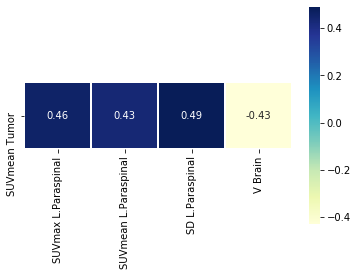

In [72]:
sns.heatmap(corr_heat_lu, annot=True, square=True, linewidths=.5, cmap="YlGnBu")
#plt.savefig("corr_lu_pointb.png")

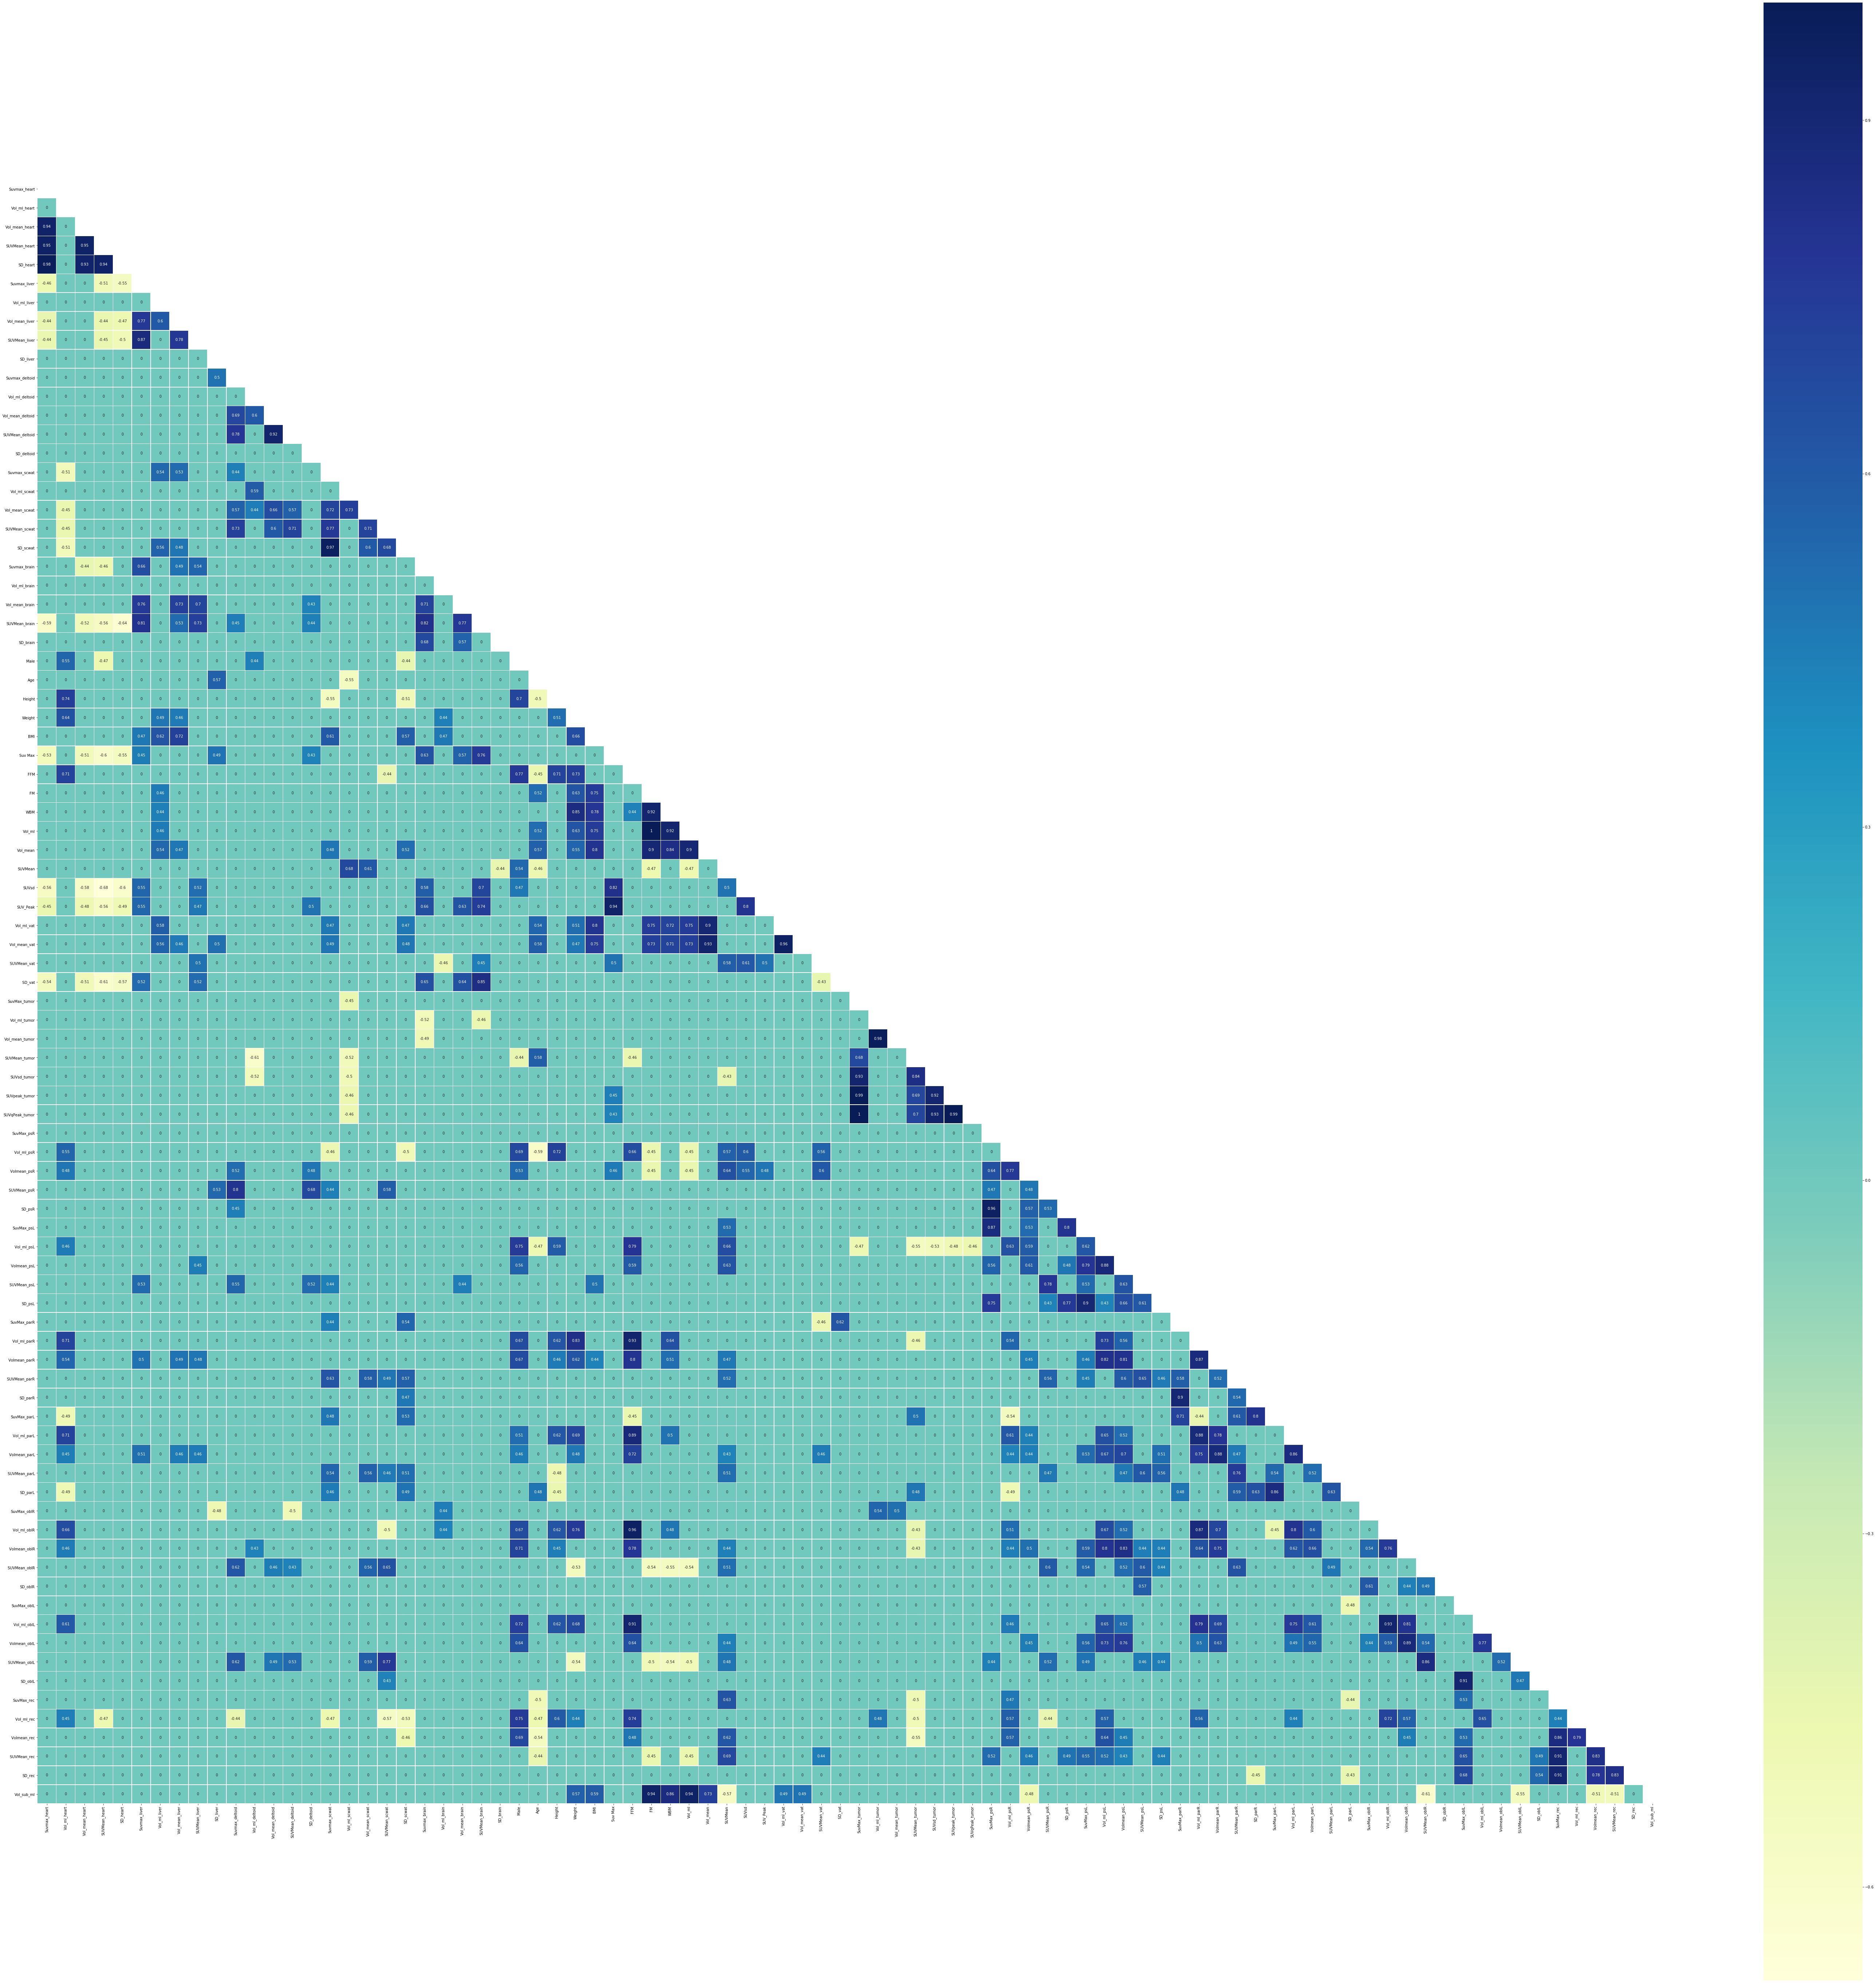

In [11]:
plt.figure(figsize=(100,100))
ax=plt.subplot(111)
data_continous = data.drop(['Name', 'Race', 'Stage', 'Alive'], axis=1)
mask = np.zeros_like(data_continous.corr(), dtype=np.bool)
data_cont_corr  =data_continous.corr()
data_cont_corr[np.abs(data_cont_corr)<.43] = 0
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_cont_corr, annot=True, square=True, linewidths=.5, cmap="YlGnBu",ax=ax, mask=mask)
plt.savefig("suppl/corr_sorted.tiff")
#make threshold and sort

In [5]:
data_continous = data.drop(['Name', 'Male', 'Alive', 'Race', 'Stage'], axis=1)

In [6]:
data_continous.columns

Index(['Suvmax_heart', 'Vol_ml_heart', 'Vol_mean_heart', 'SUVMean_heart',
       'SD_heart', 'Suvmax_liver', 'Vol_ml_liver', 'Vol_mean_liver',
       'SUVMean_liver', 'SD_liver', 'Suvmax_deltoid', 'Vol_ml_deltoid',
       'Vol_mean_deltoid', 'SUVMean_deltoid', 'SD_deltoid', 'Suvmax_scwat',
       'Vol_ml_scwat', 'Vol_mean_scwat', 'SUVMean_scwat', 'SD_scwat',
       'Suvmax_brain', 'Vol_ml_brain', 'Vol_mean_brain', 'SUVMean_brain',
       'SD_brain', 'Age', 'Height', 'Weight', 'BMI', 'Suv Max', 'FFM', 'FM',
       'WBM', 'Vol_ml', 'Vol_mean', 'SUVMean', 'SUVsd', 'SUV_Peak',
       'Vol_ml_vat', ' Vol_mean_vat', ' SUVMean_vat', ' SD_vat',
       'SuvMax_tumor', 'Vol_ml_tumor', 'Vol_mean_tumor', 'SUVMean_tumor',
       'SUVsd_tumor', 'SUVpeak_tumor', 'SUVqPeak_tumor', 'SuvMax_psR',
       ' Vol_ml_psR', ' Volmean_psR', ' SUVMean_psR', 'SD_psR', 'SuvMax_psL',
       ' Vol_ml_psL', ' Volmean_psL', ' SUVMean_psL', 'SD_psL', 'SuvMax_parR',
       ' Vol_ml_parR', ' Volmean_parR', ' SUVMean_par

In [7]:
data_continous = data_continous.fillna(np.mean(data_continous))

C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\Users\w\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

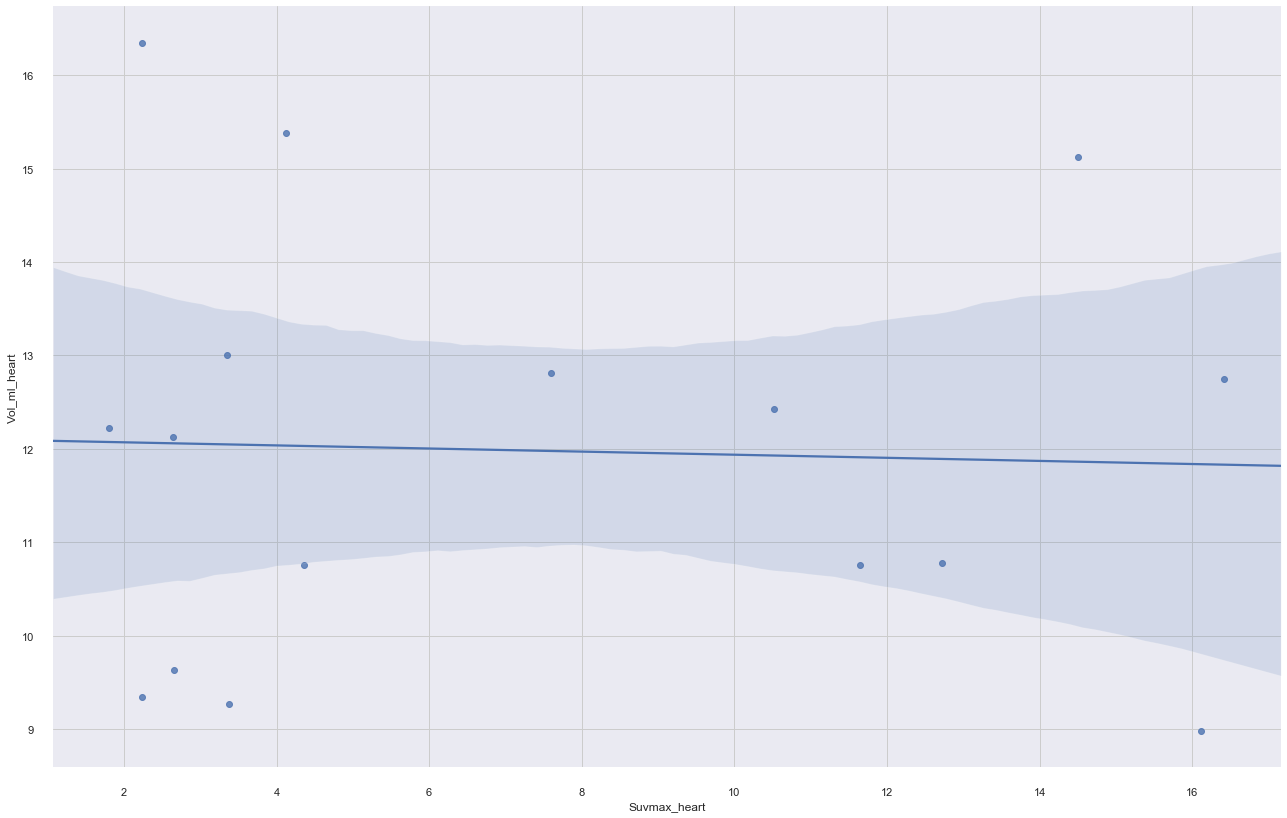

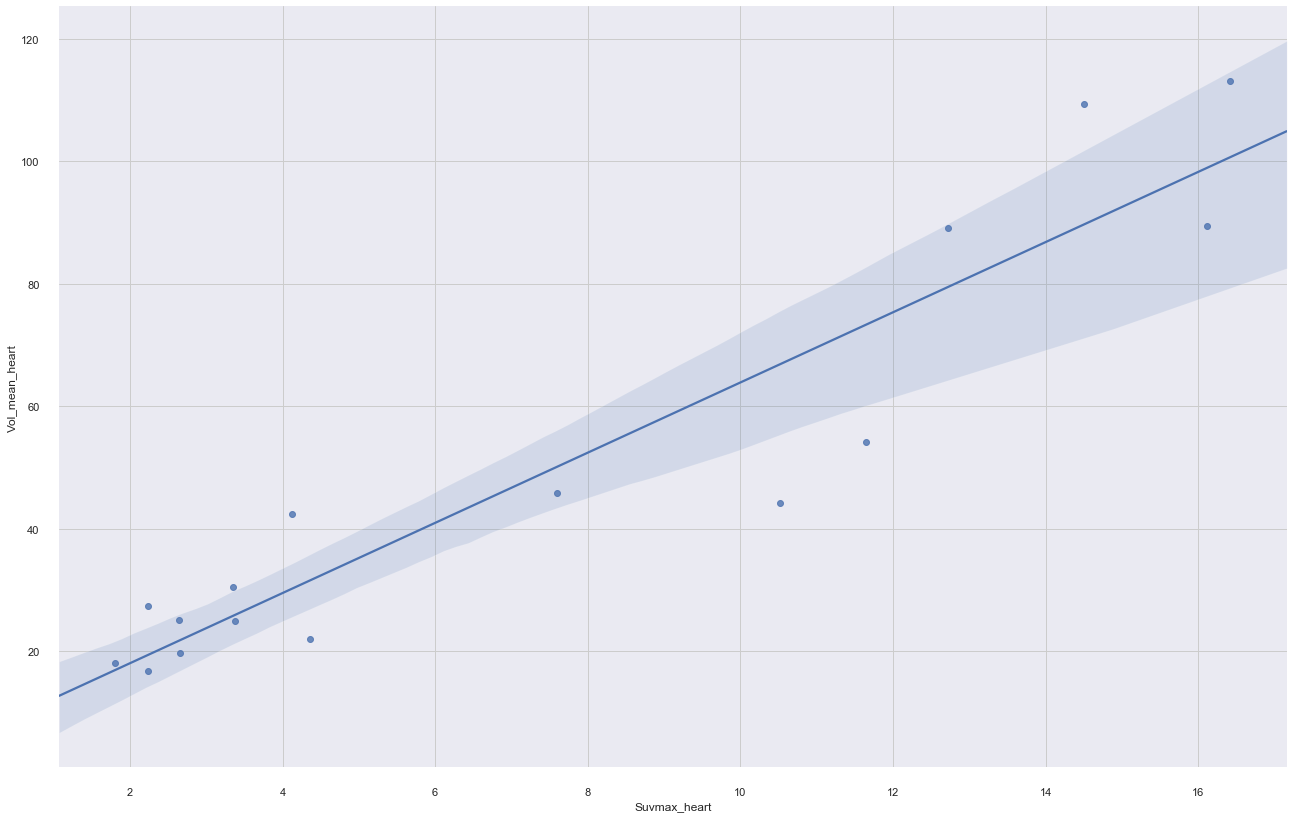

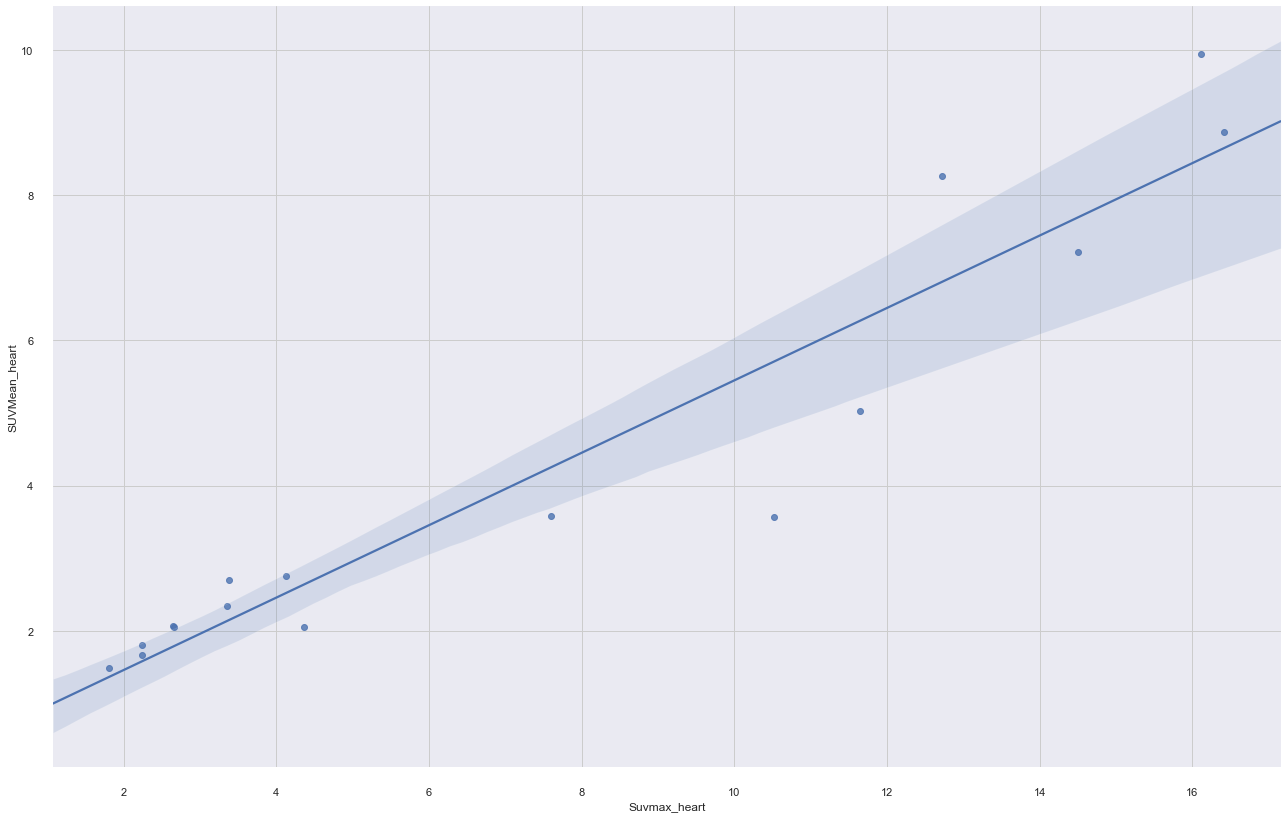

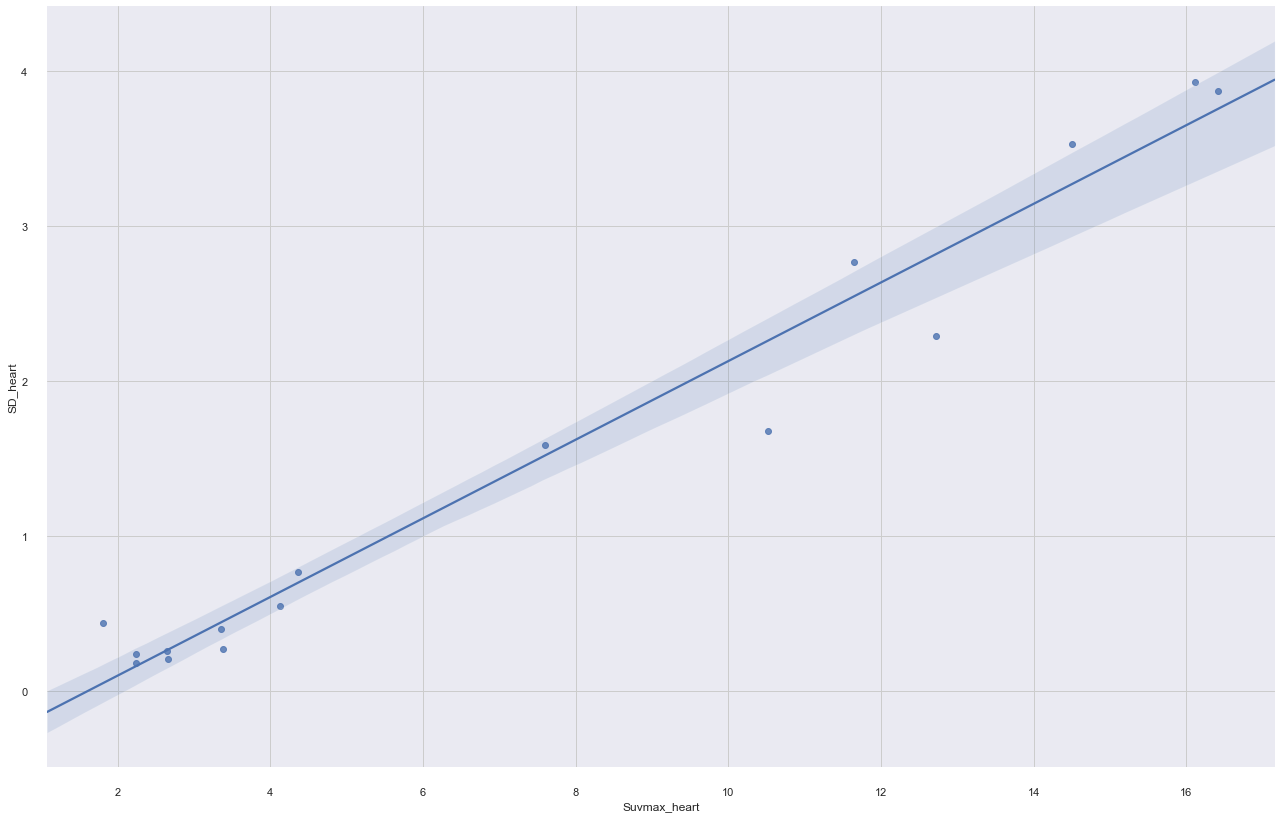

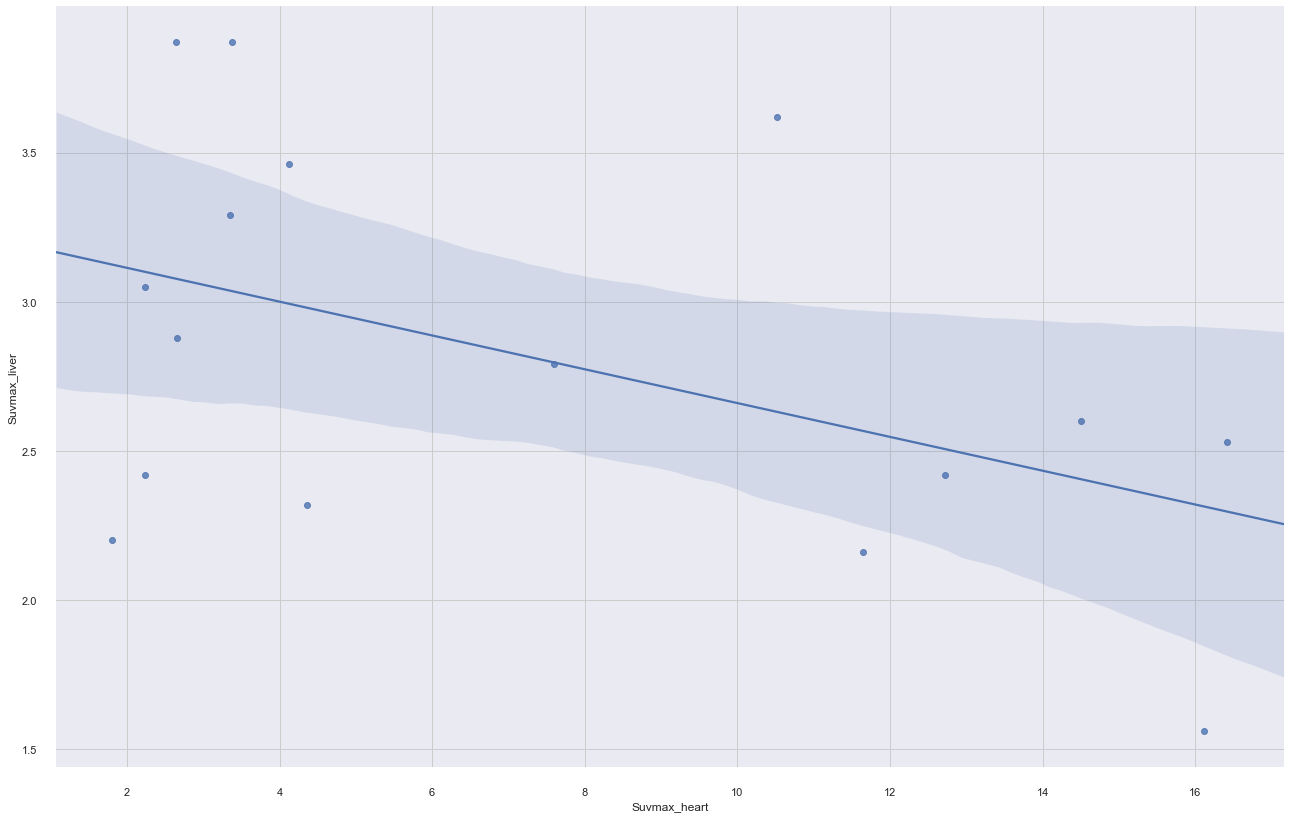

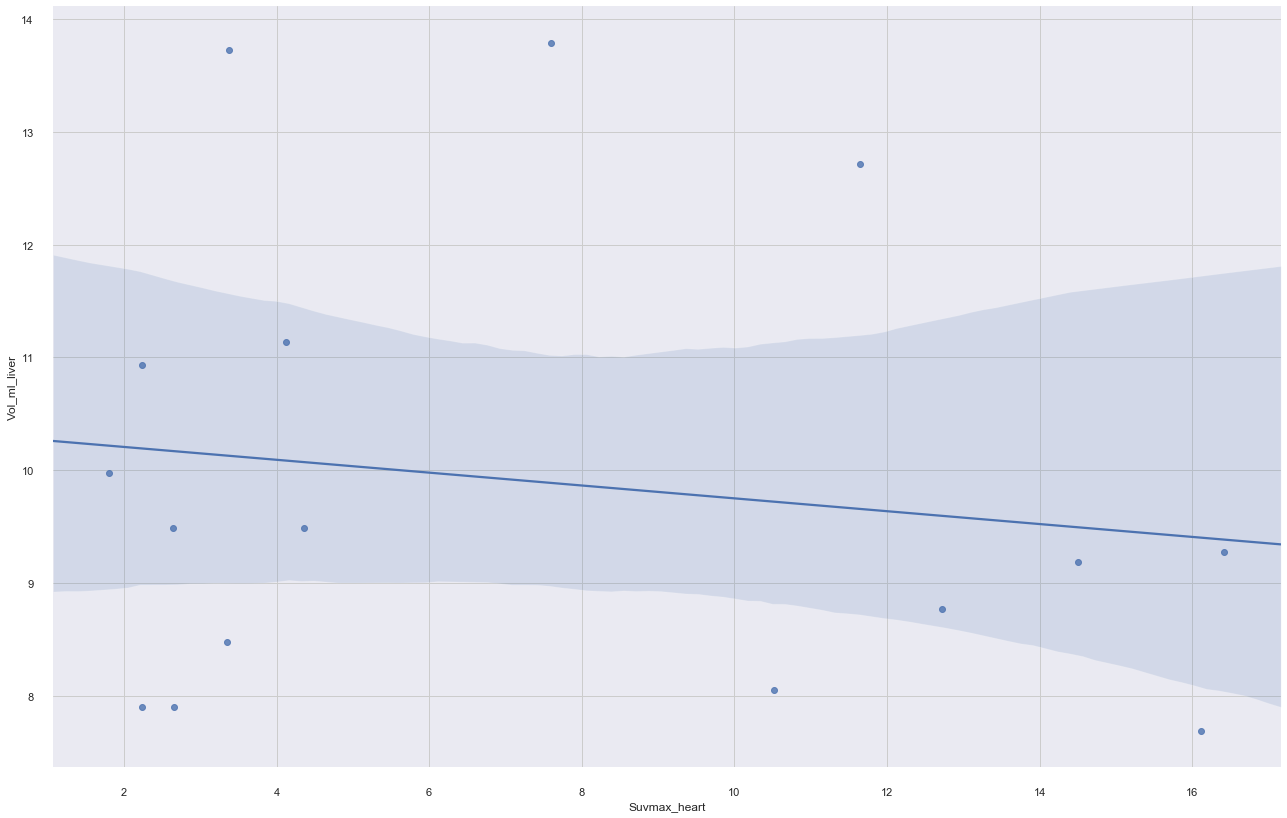

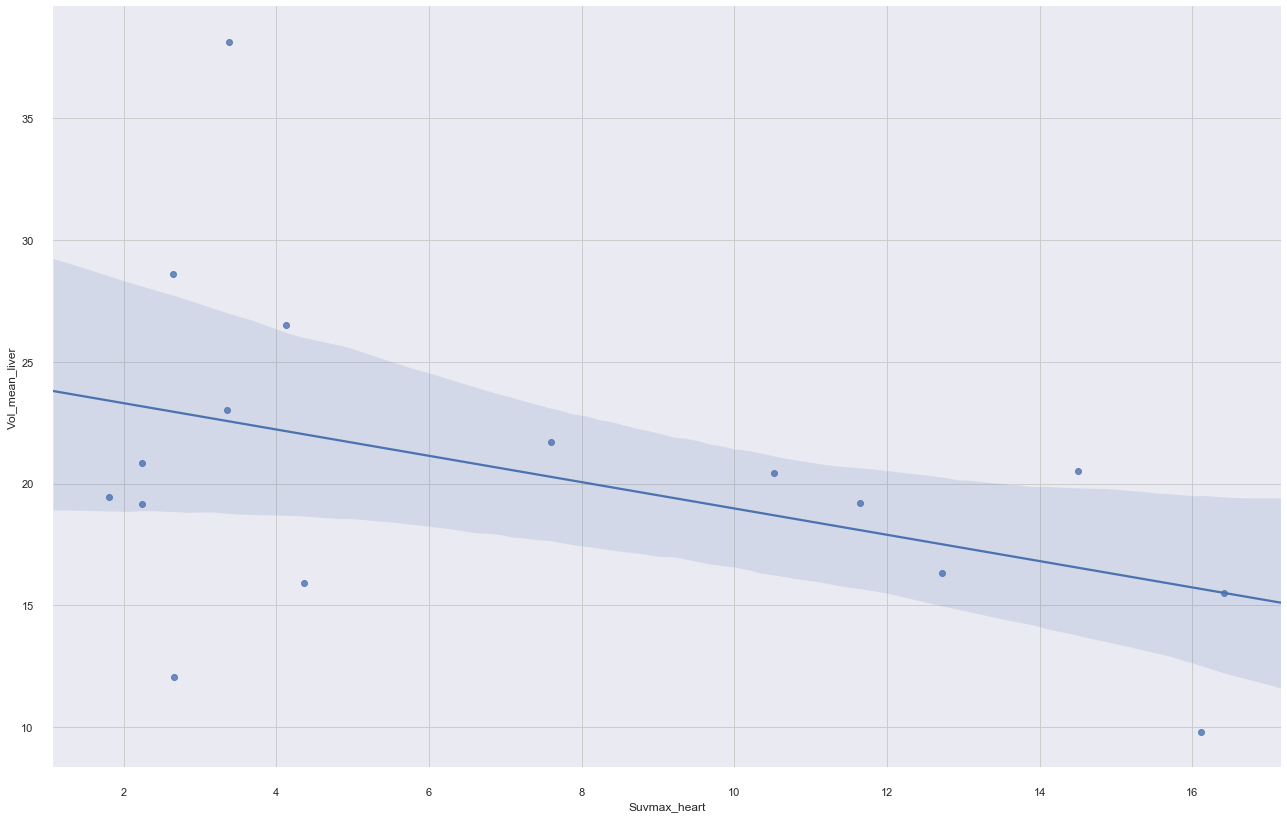

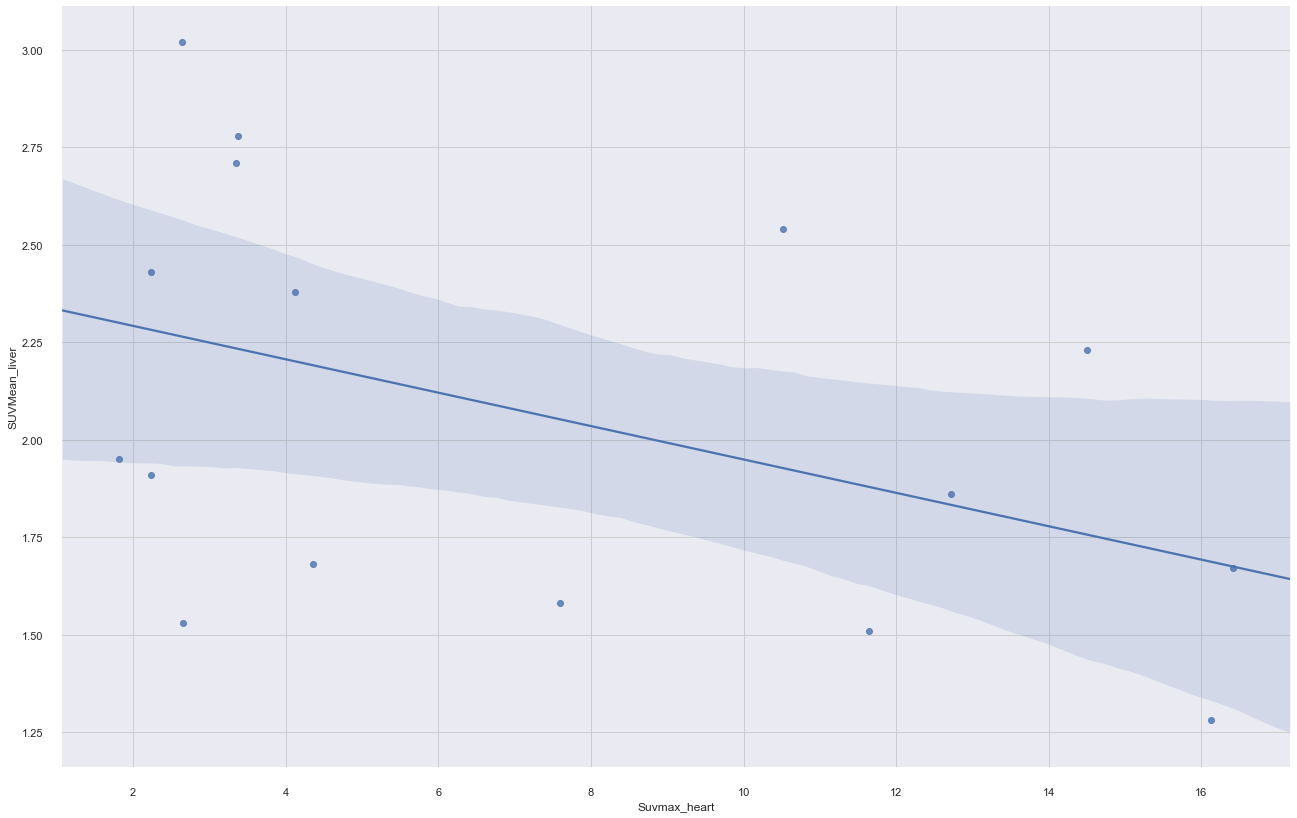

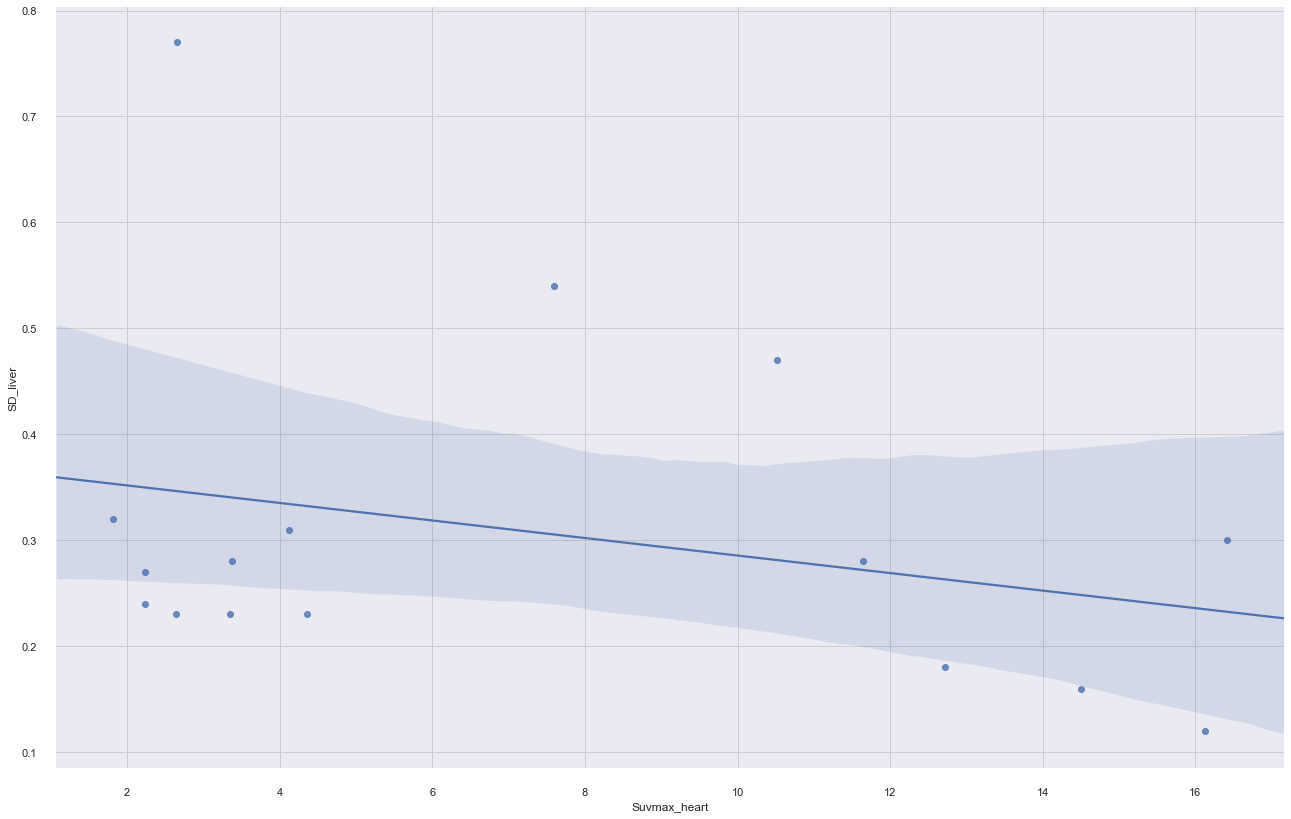

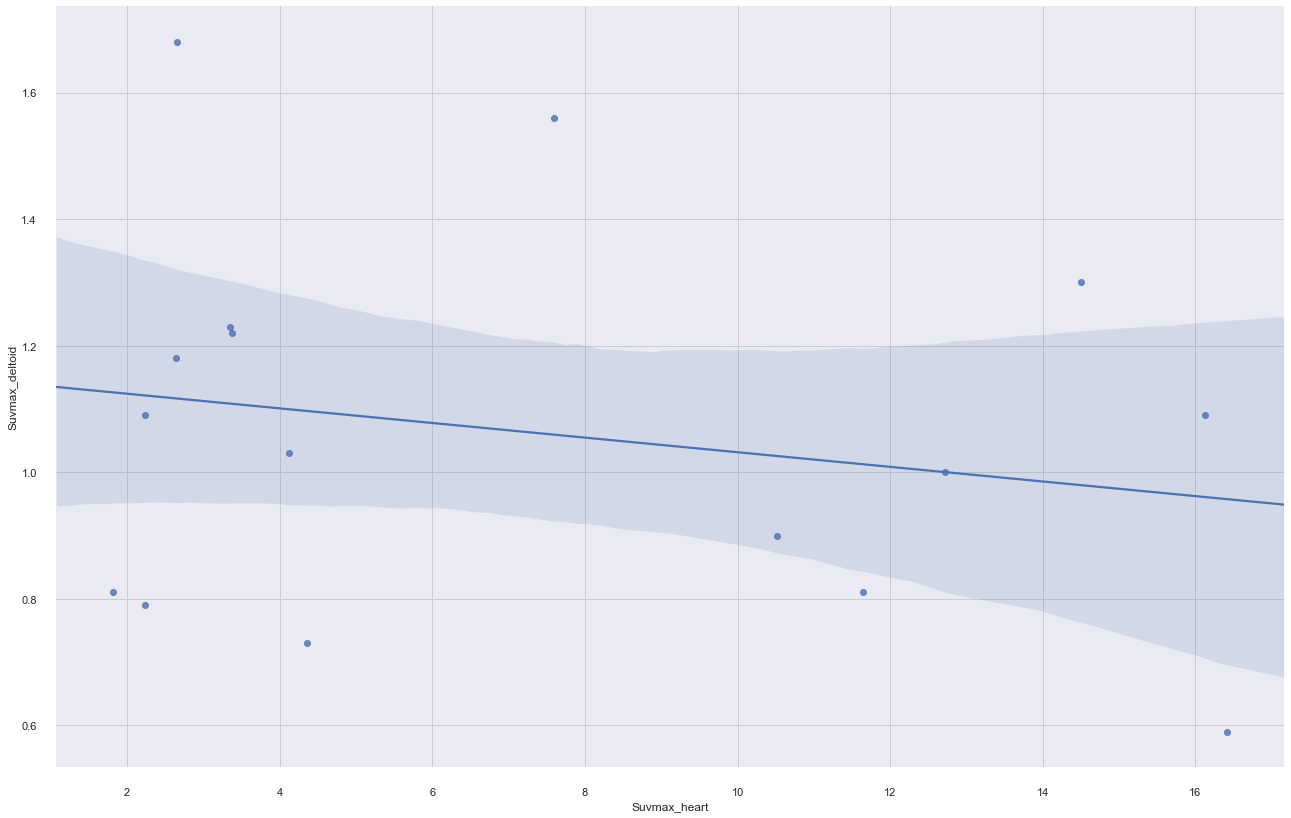

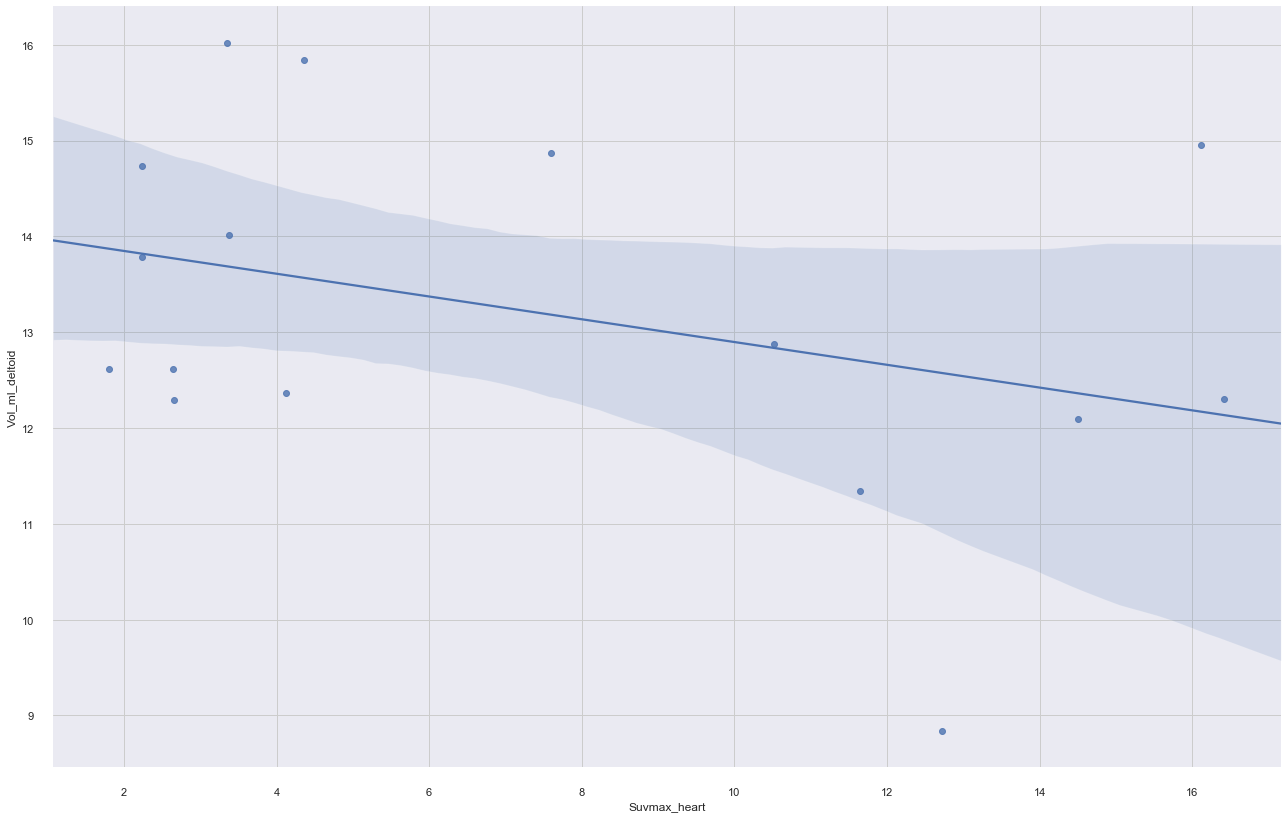

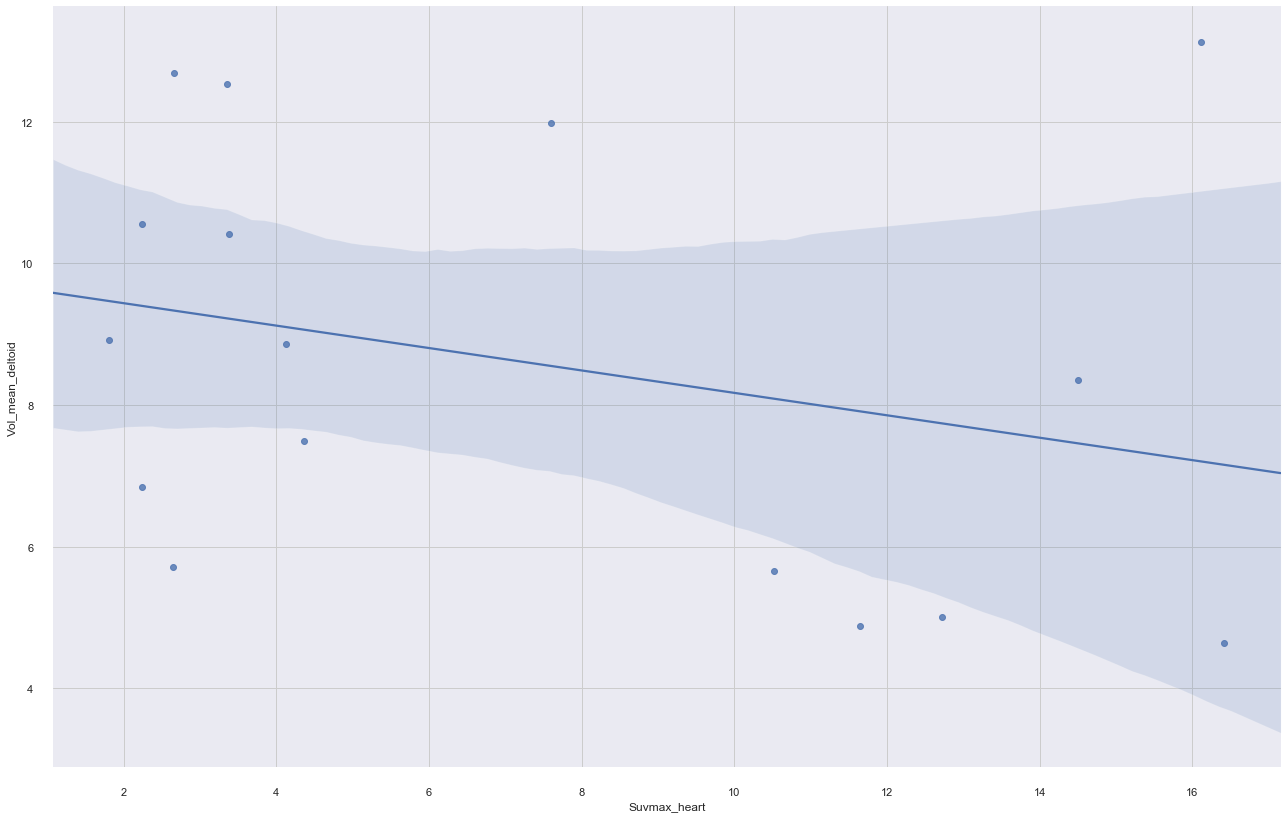

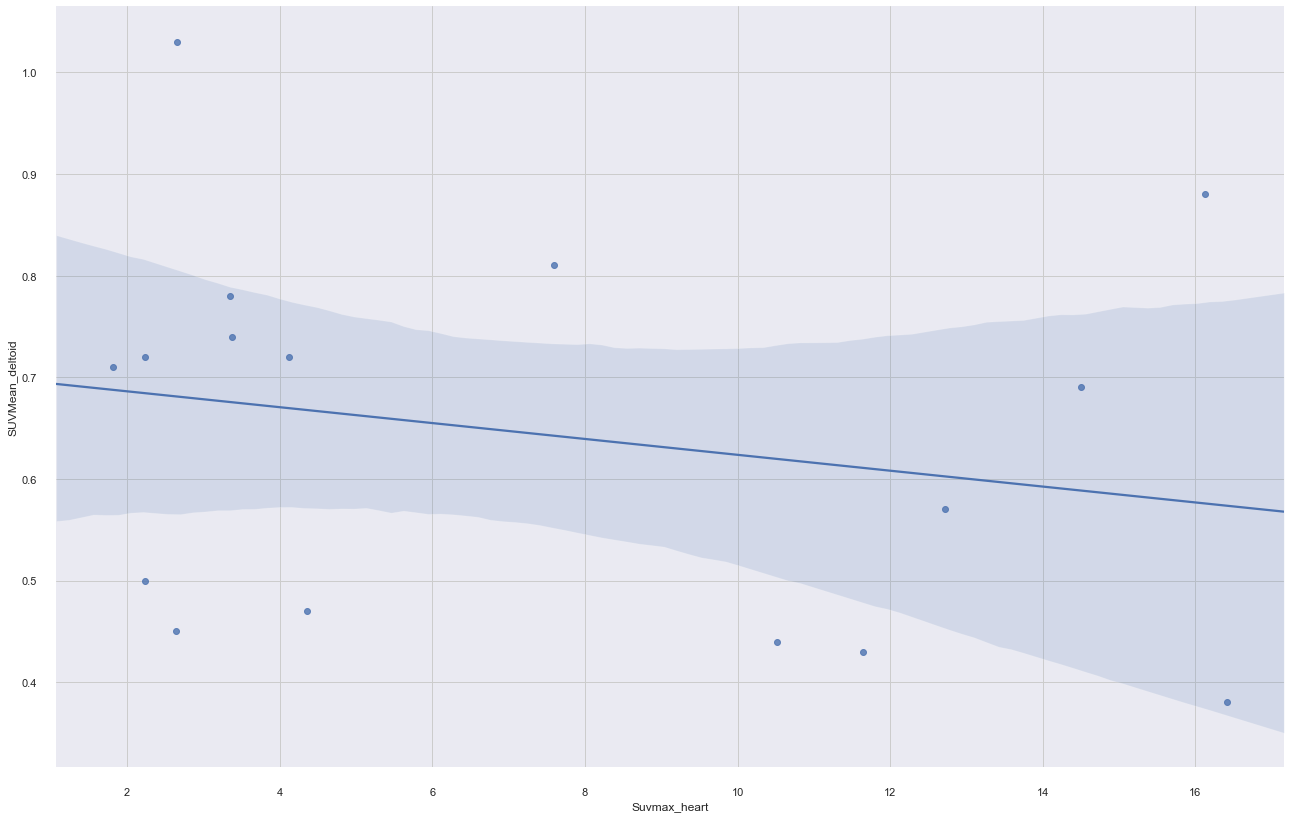

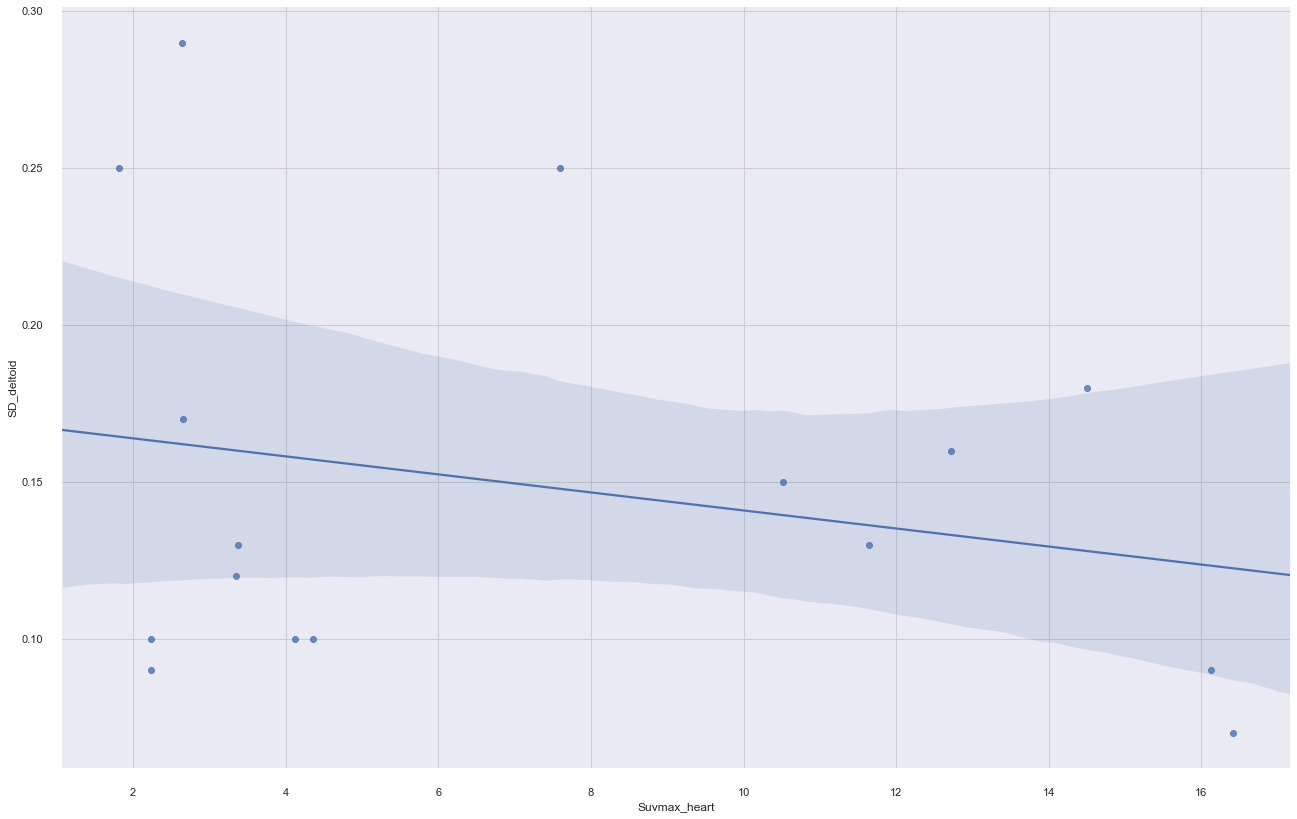

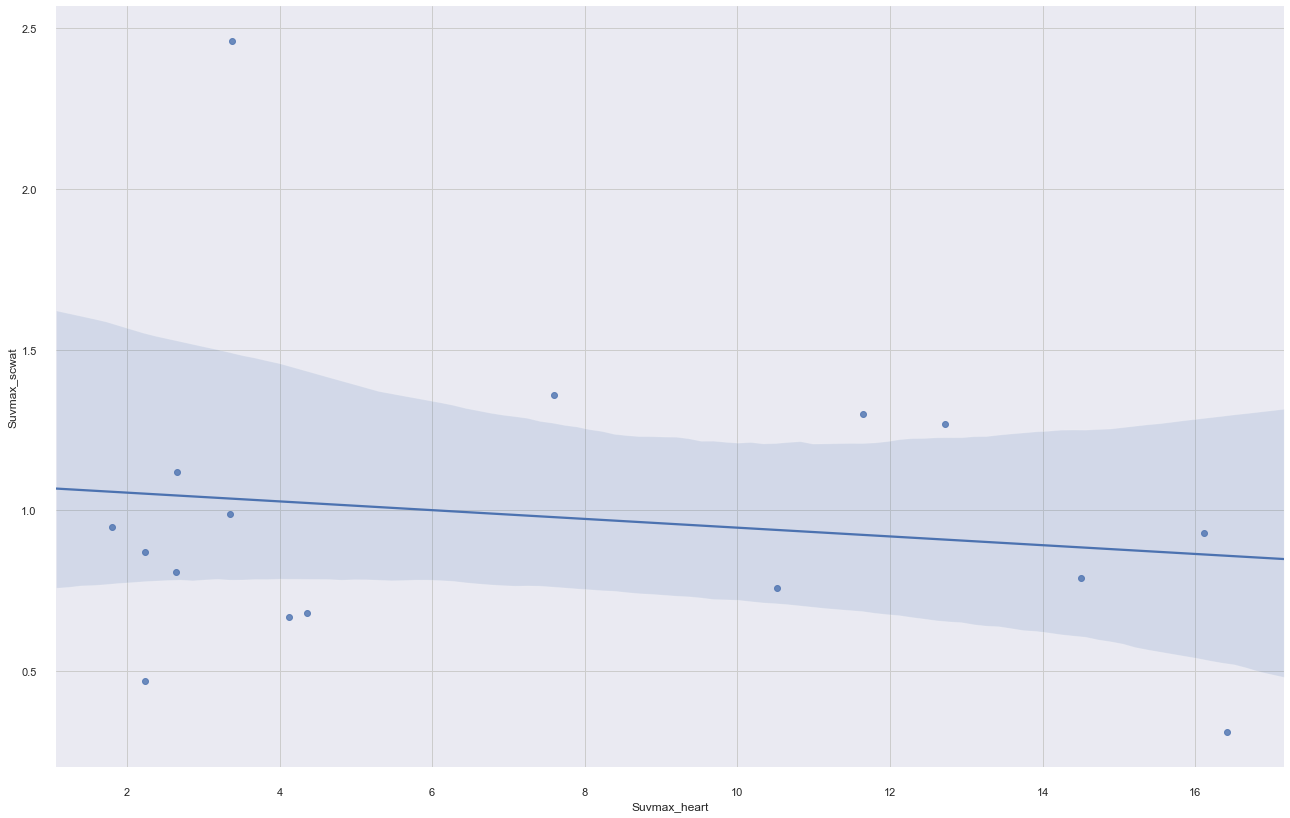

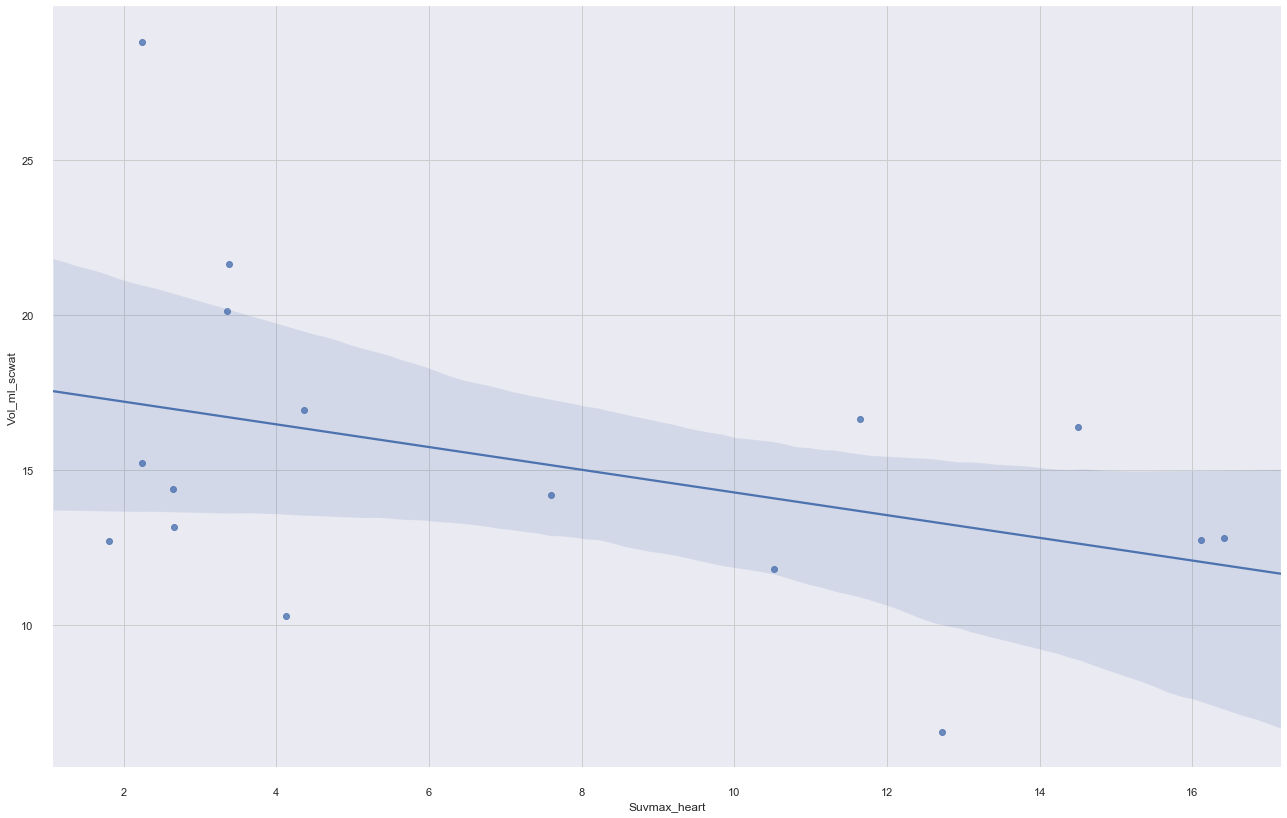

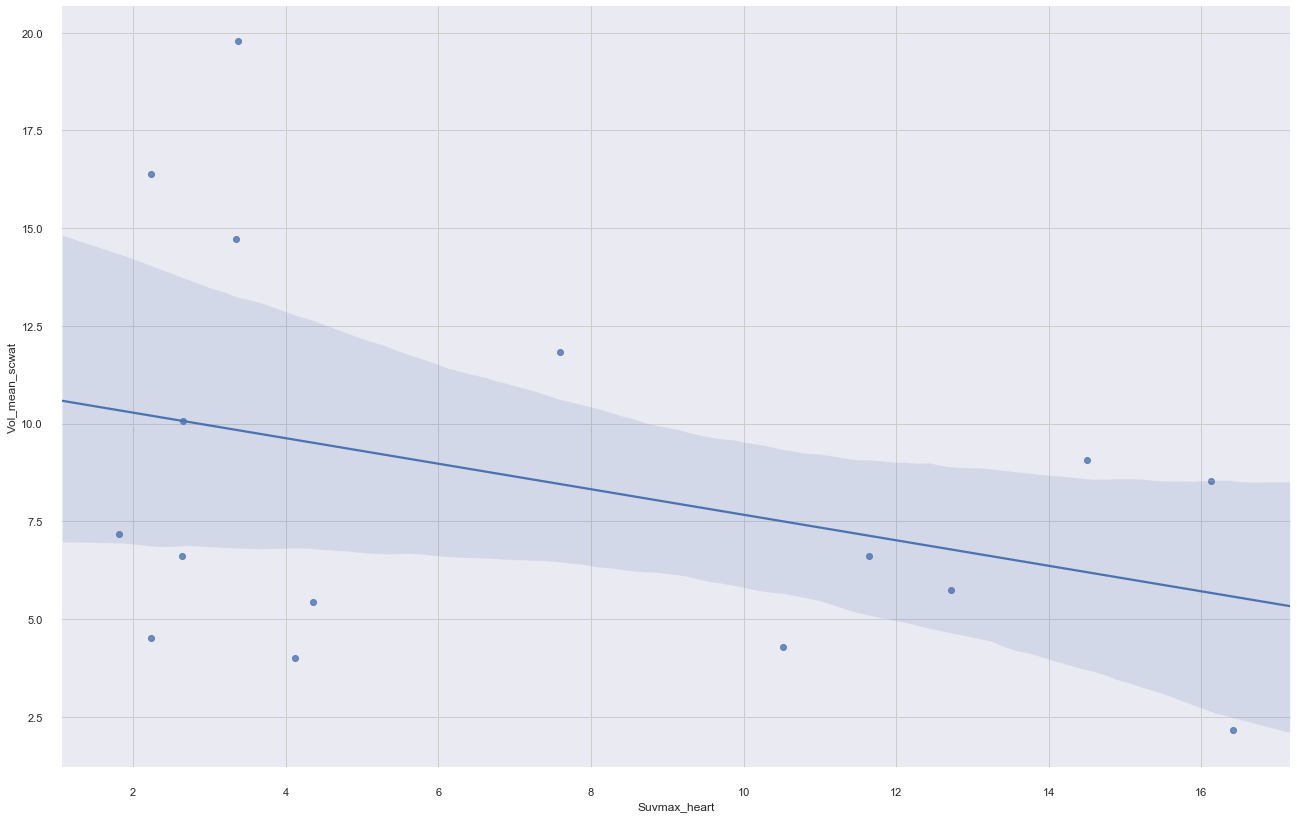

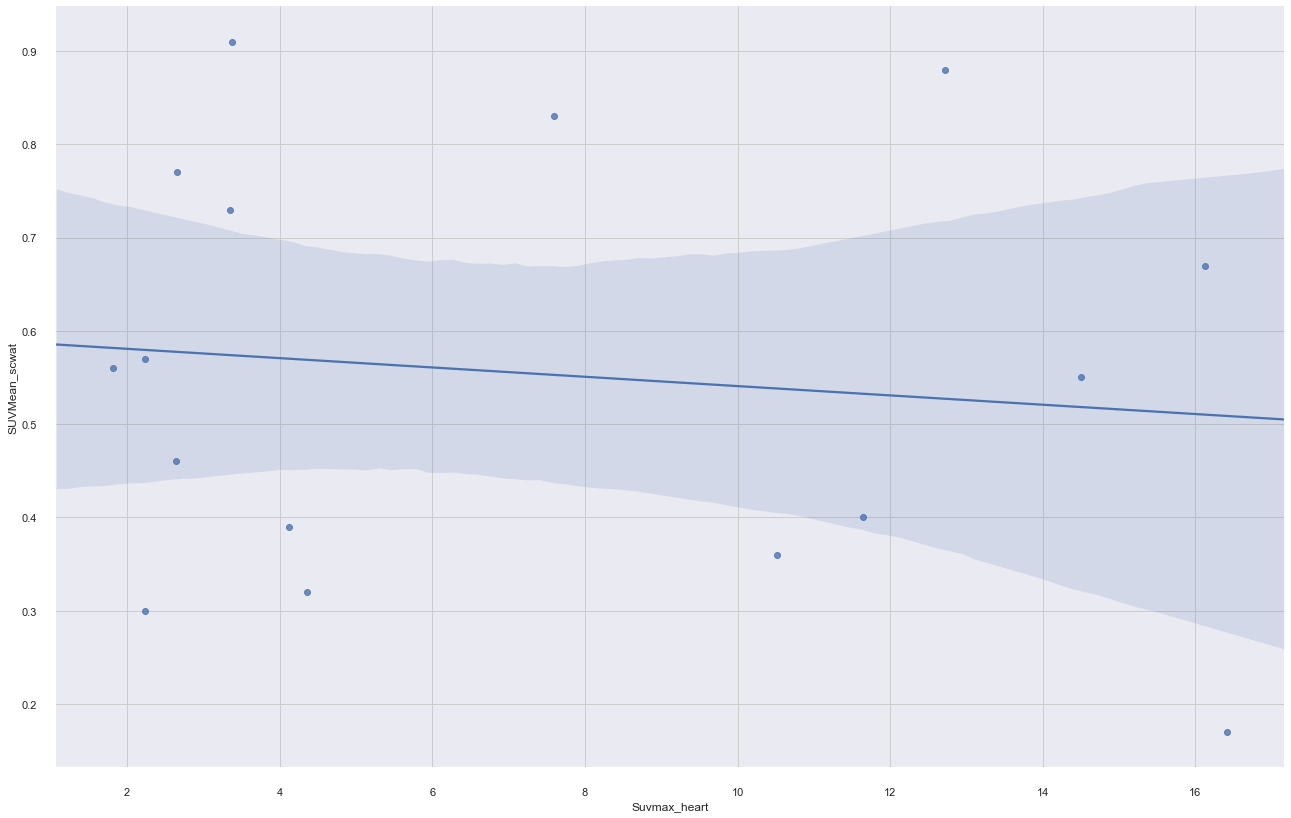

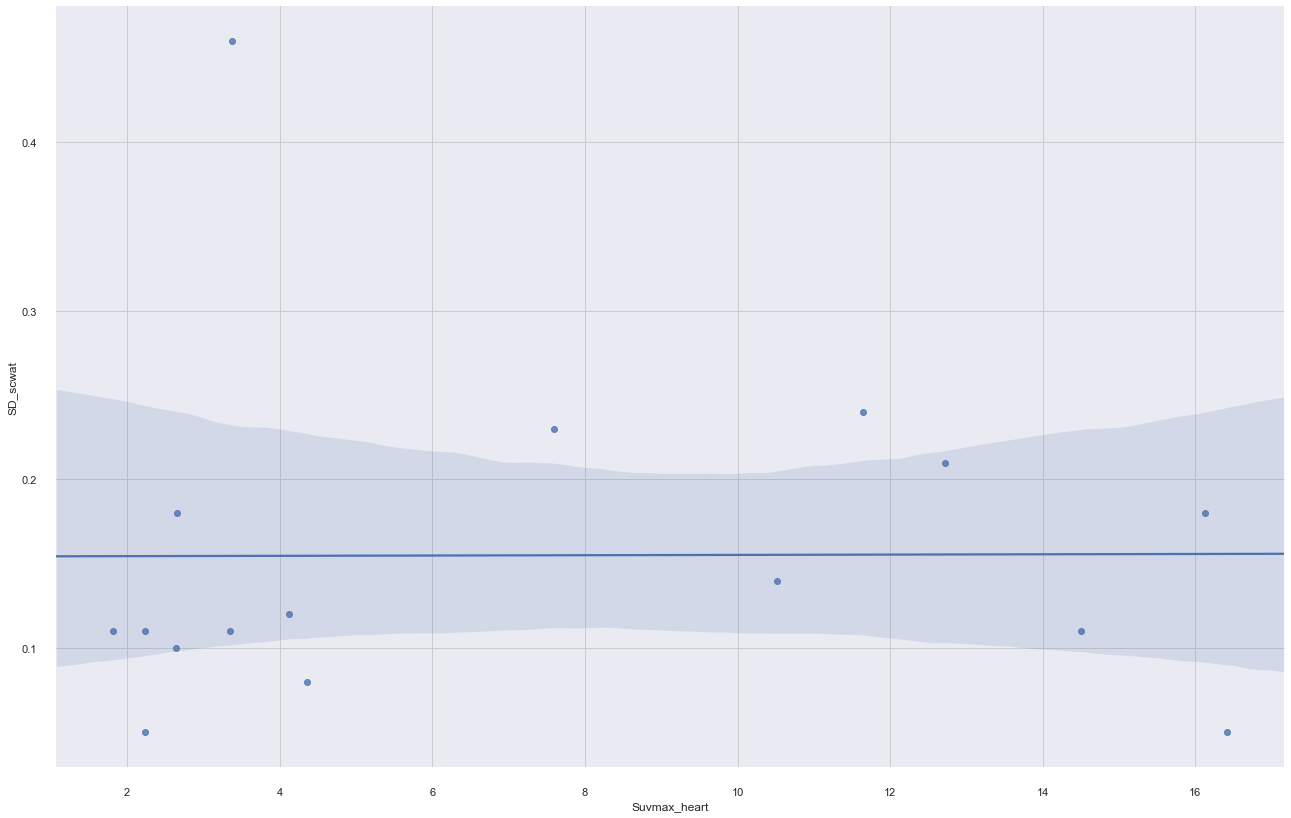

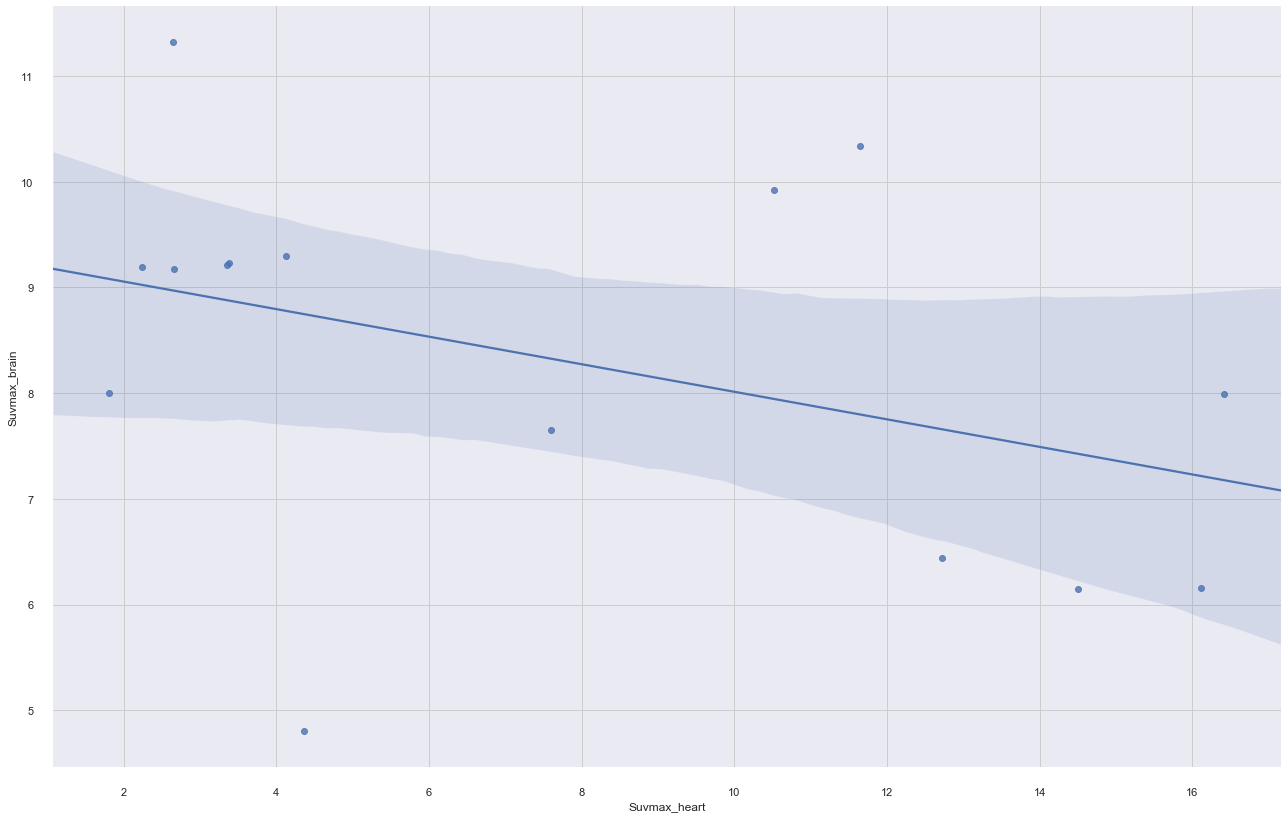

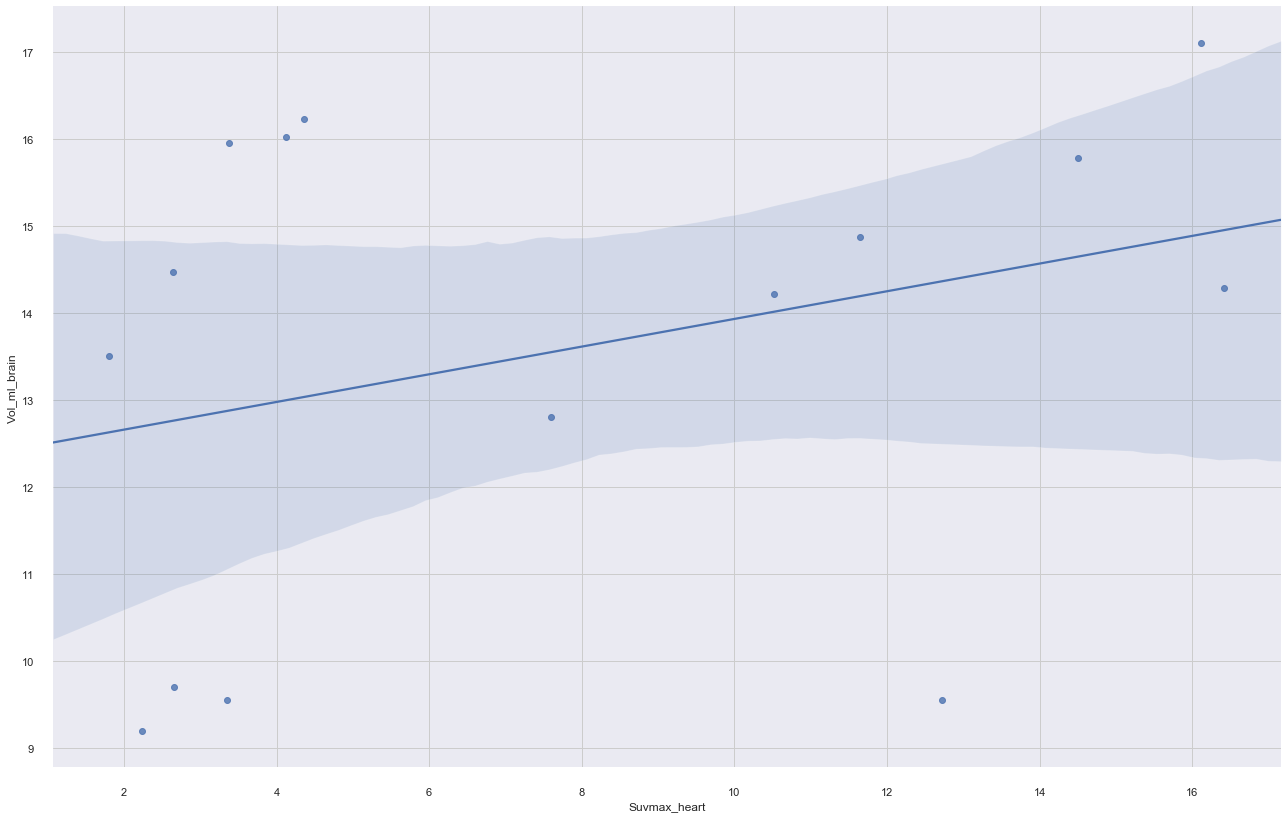

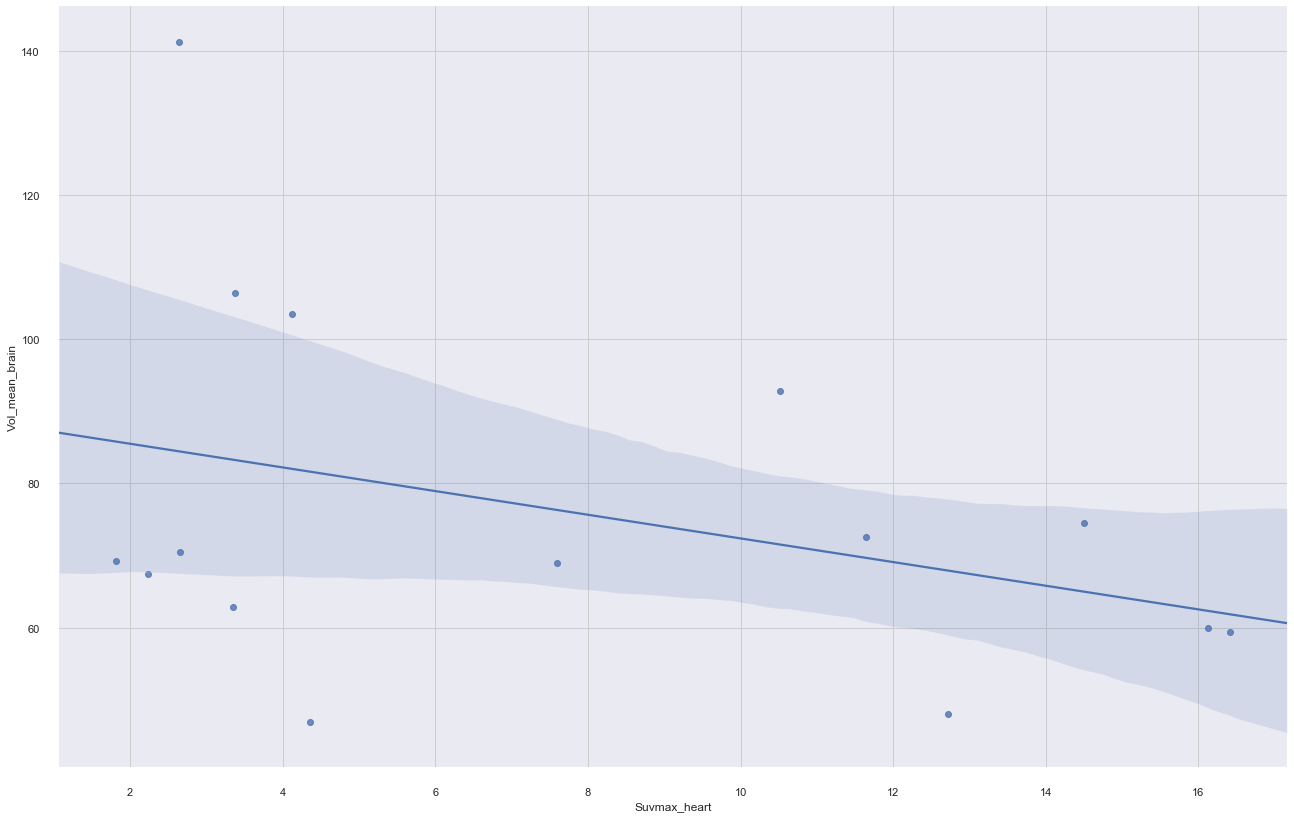

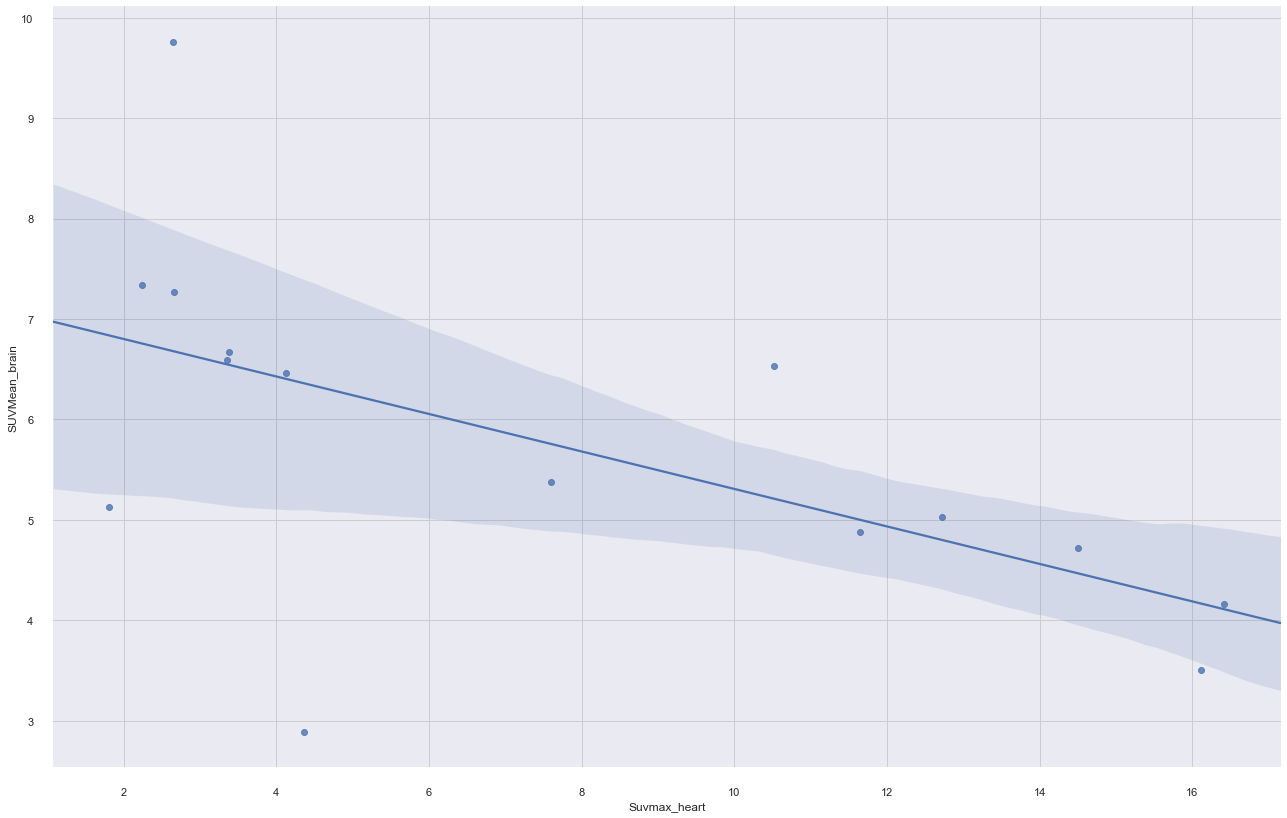

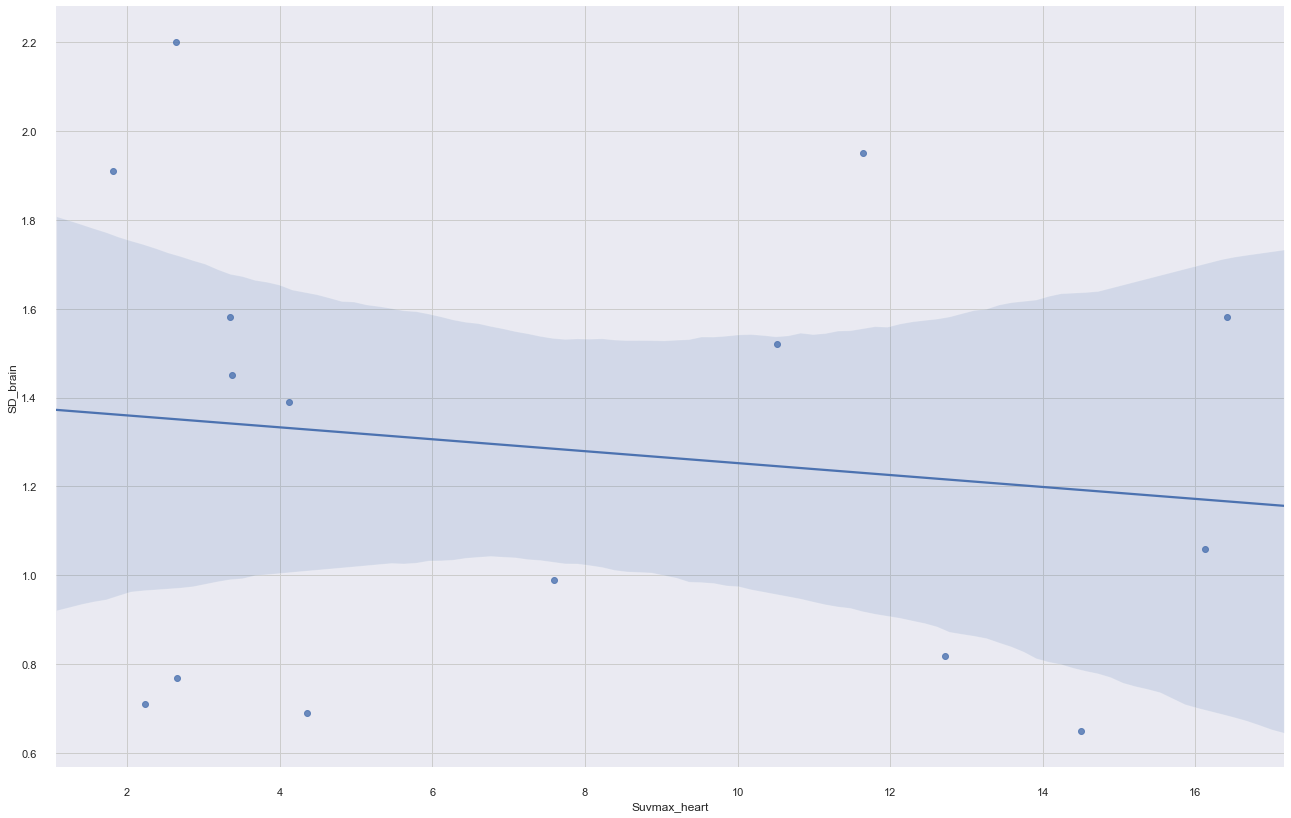

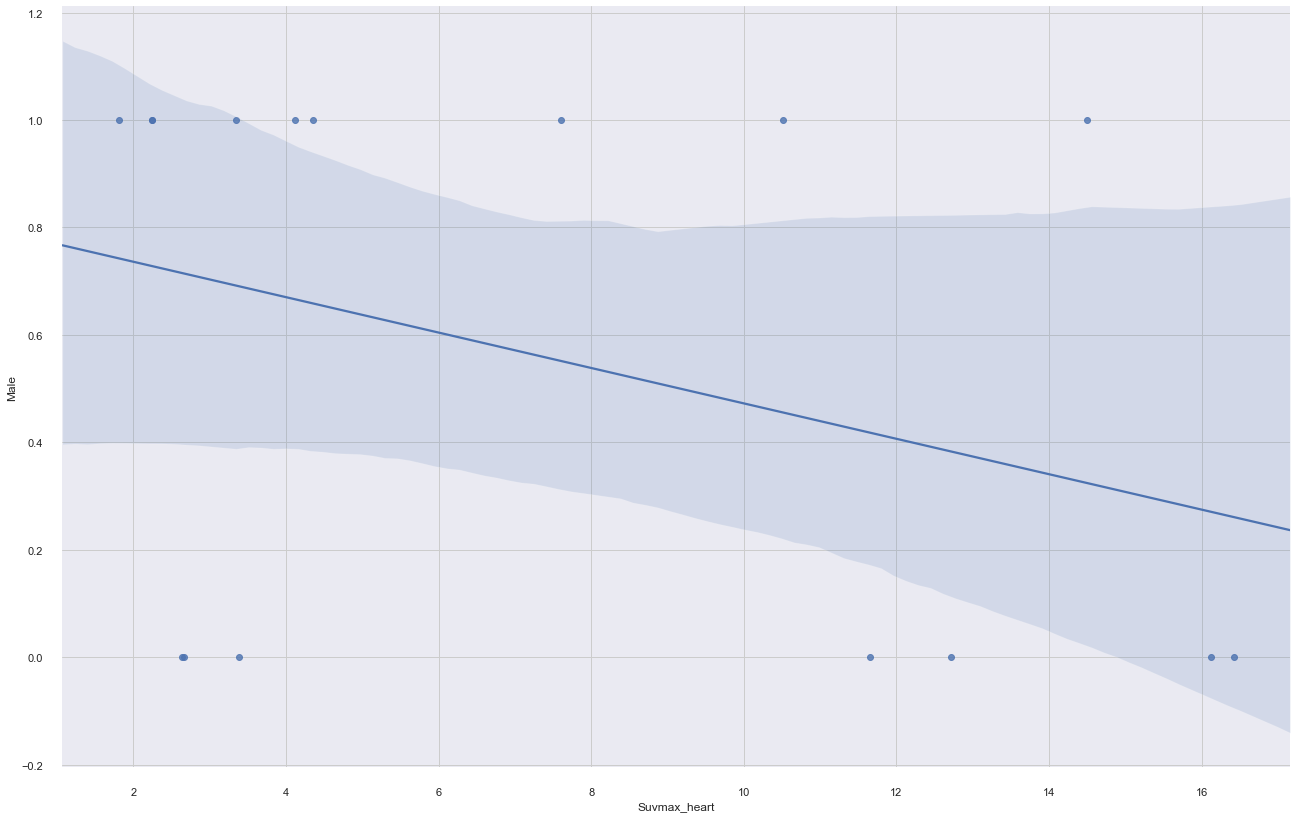

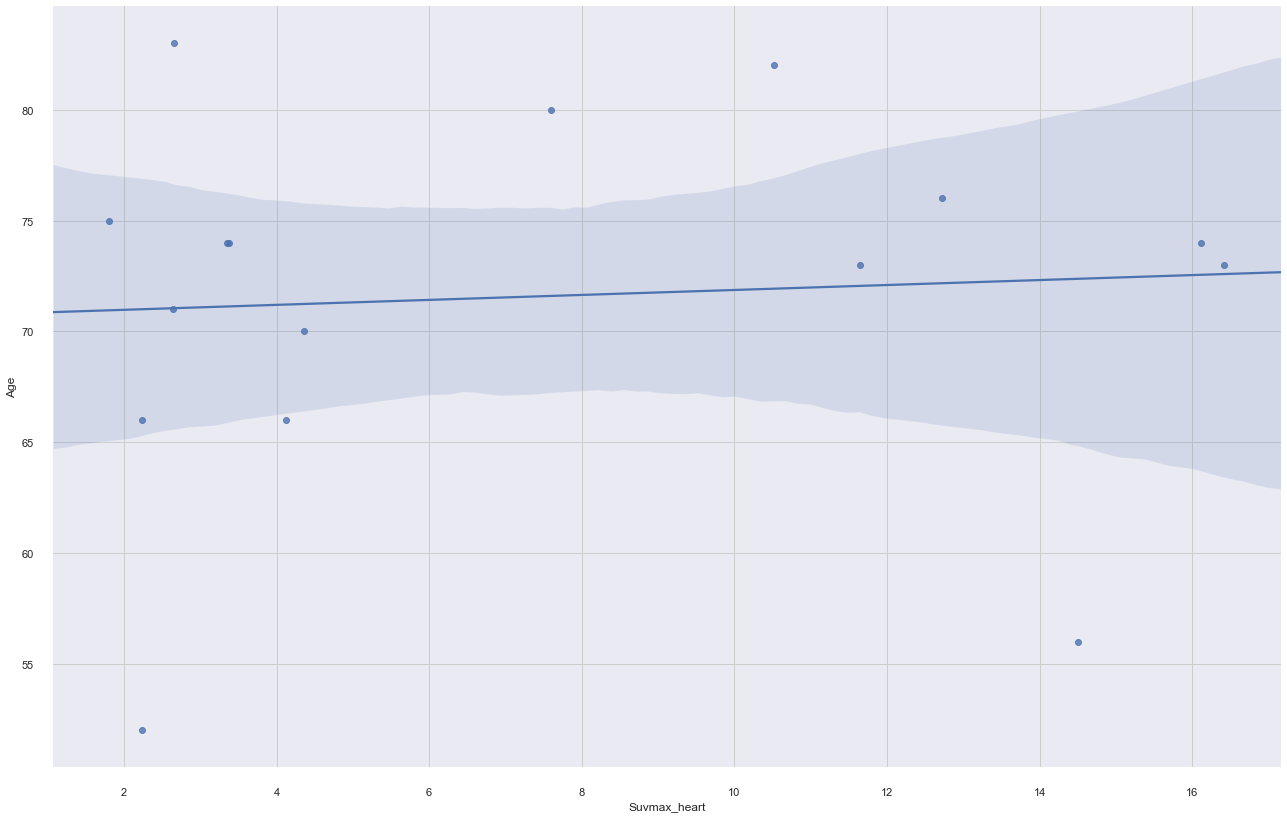

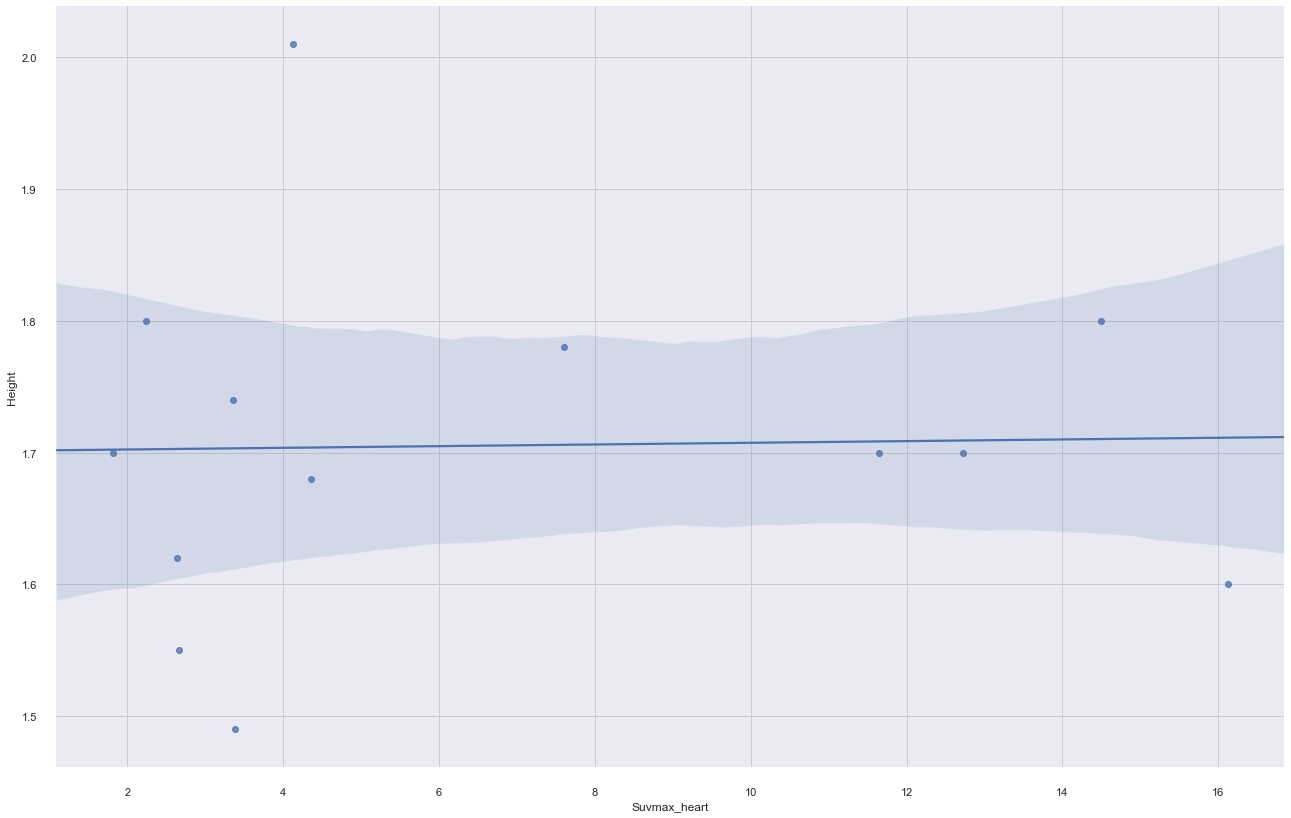

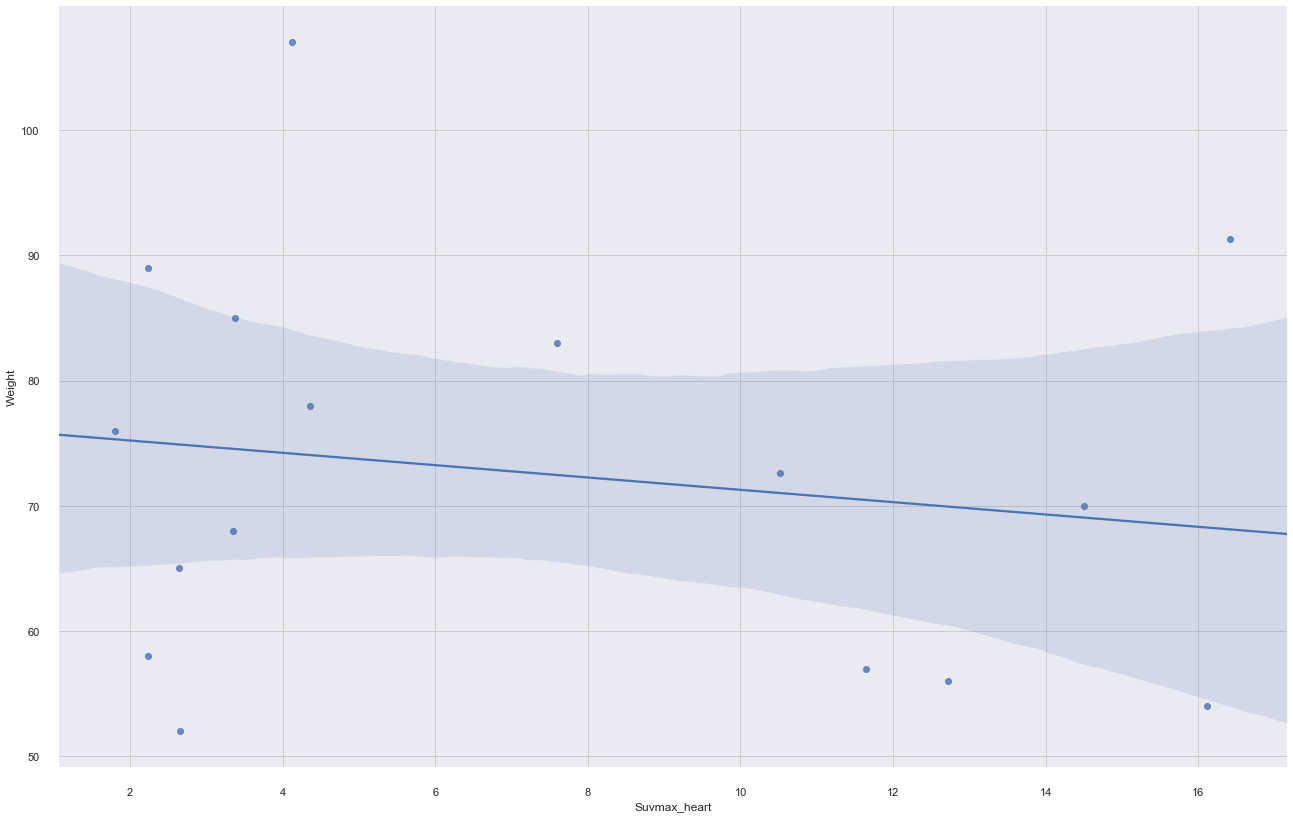

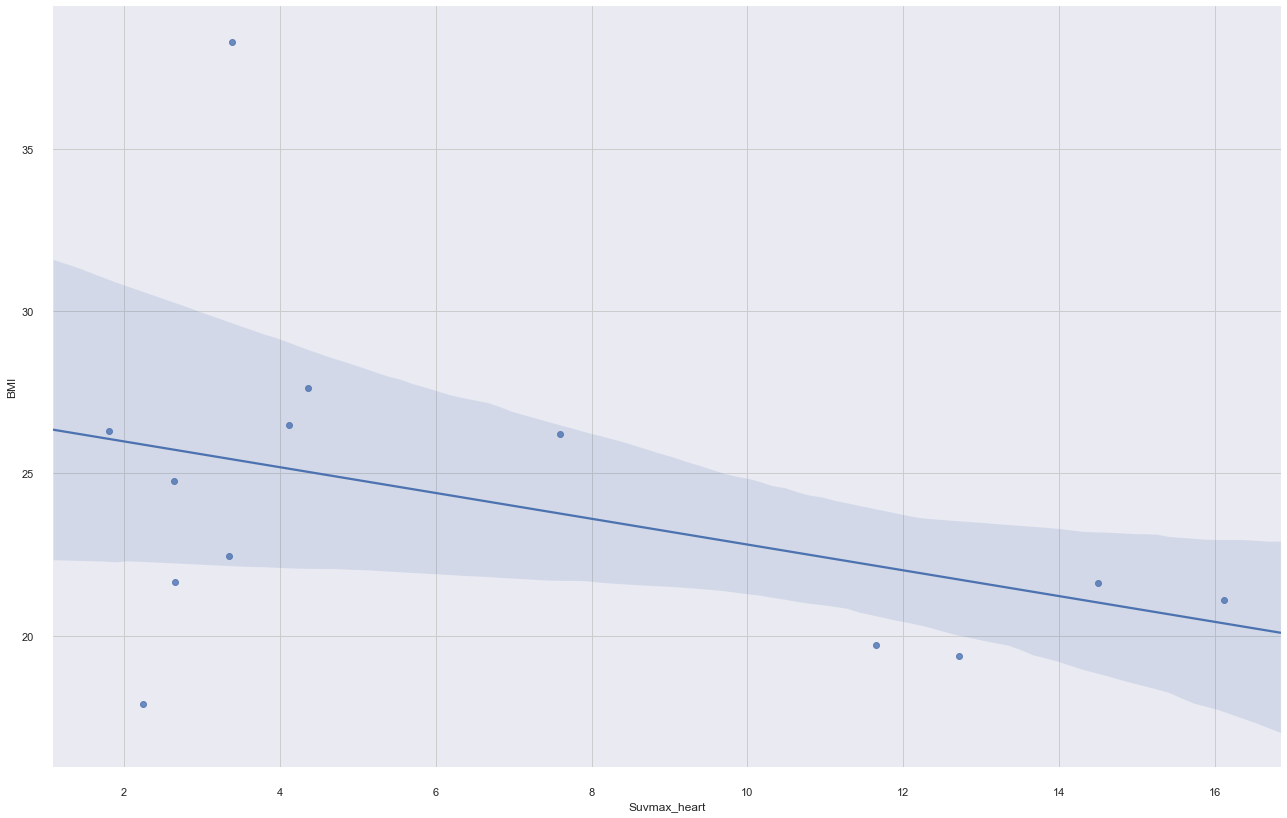

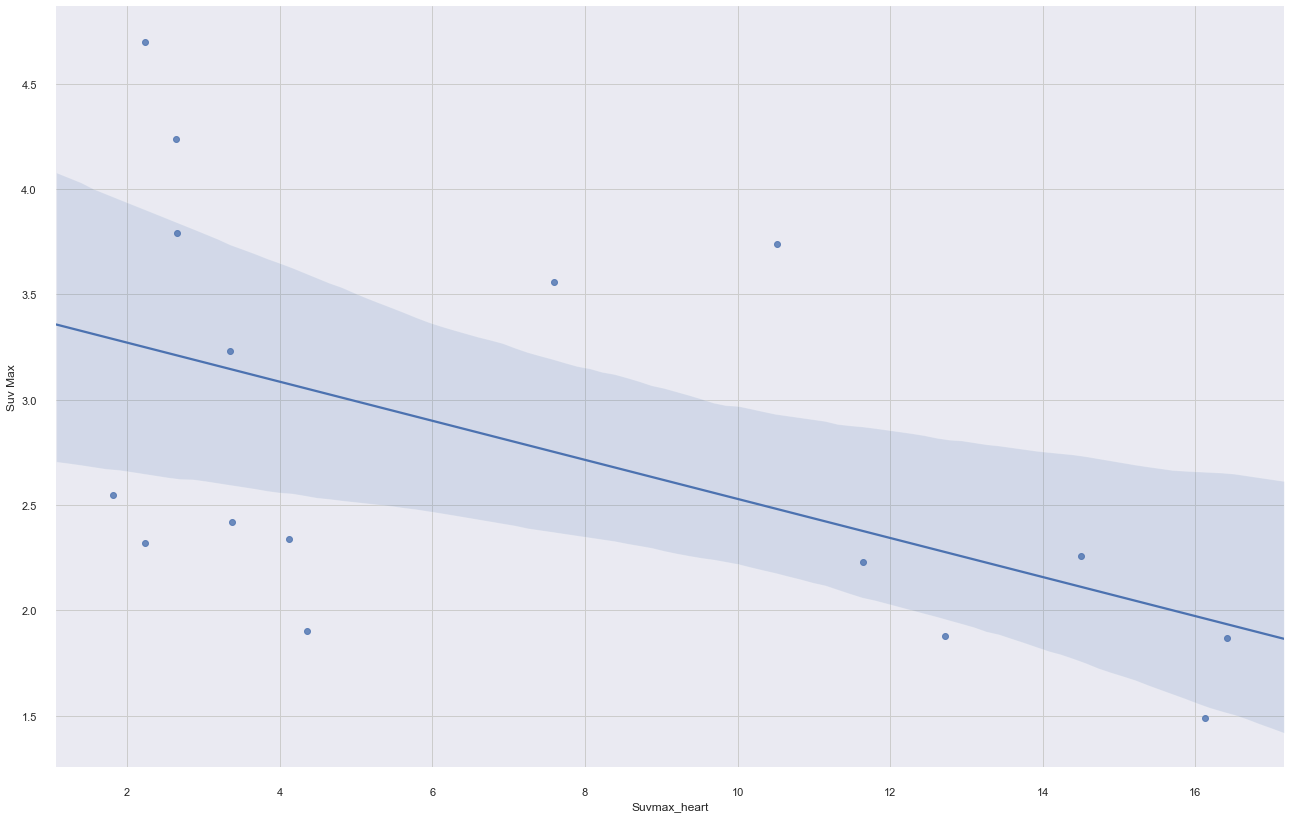

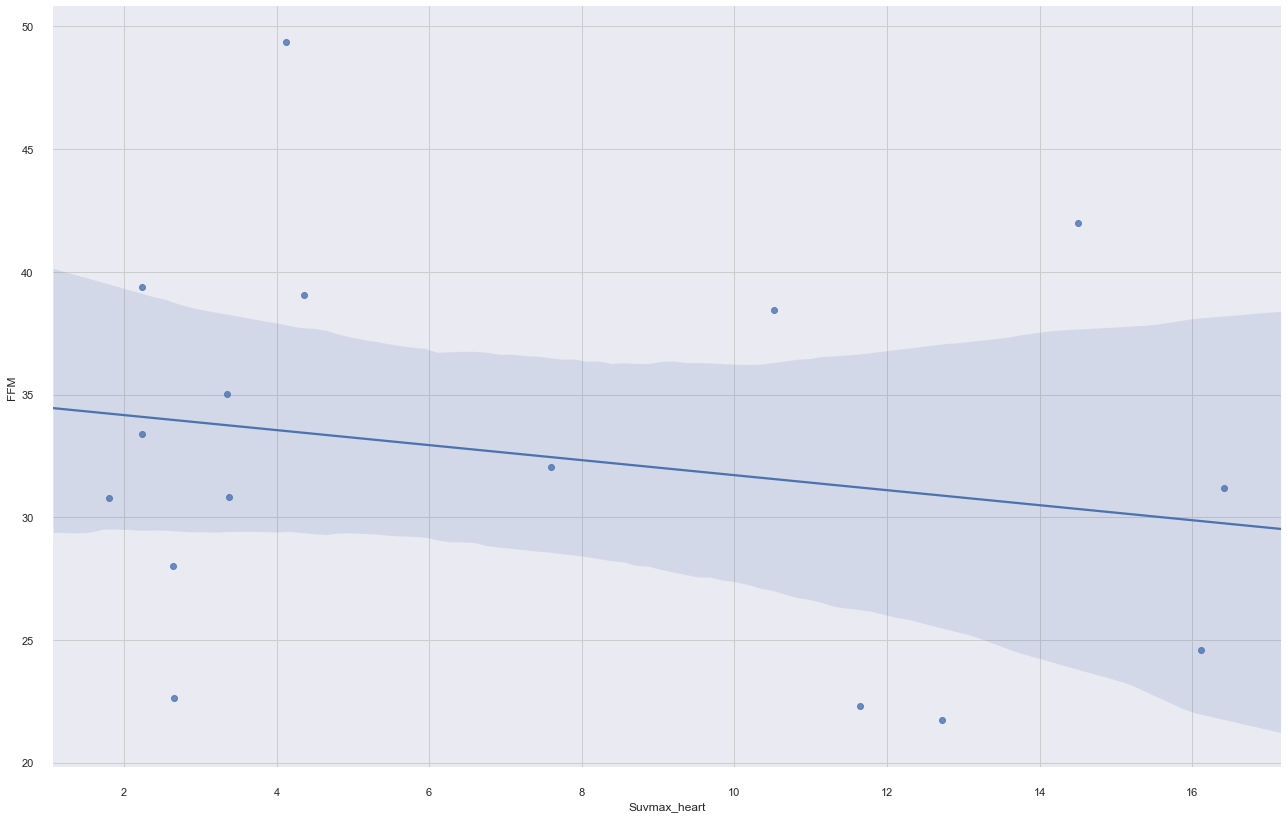

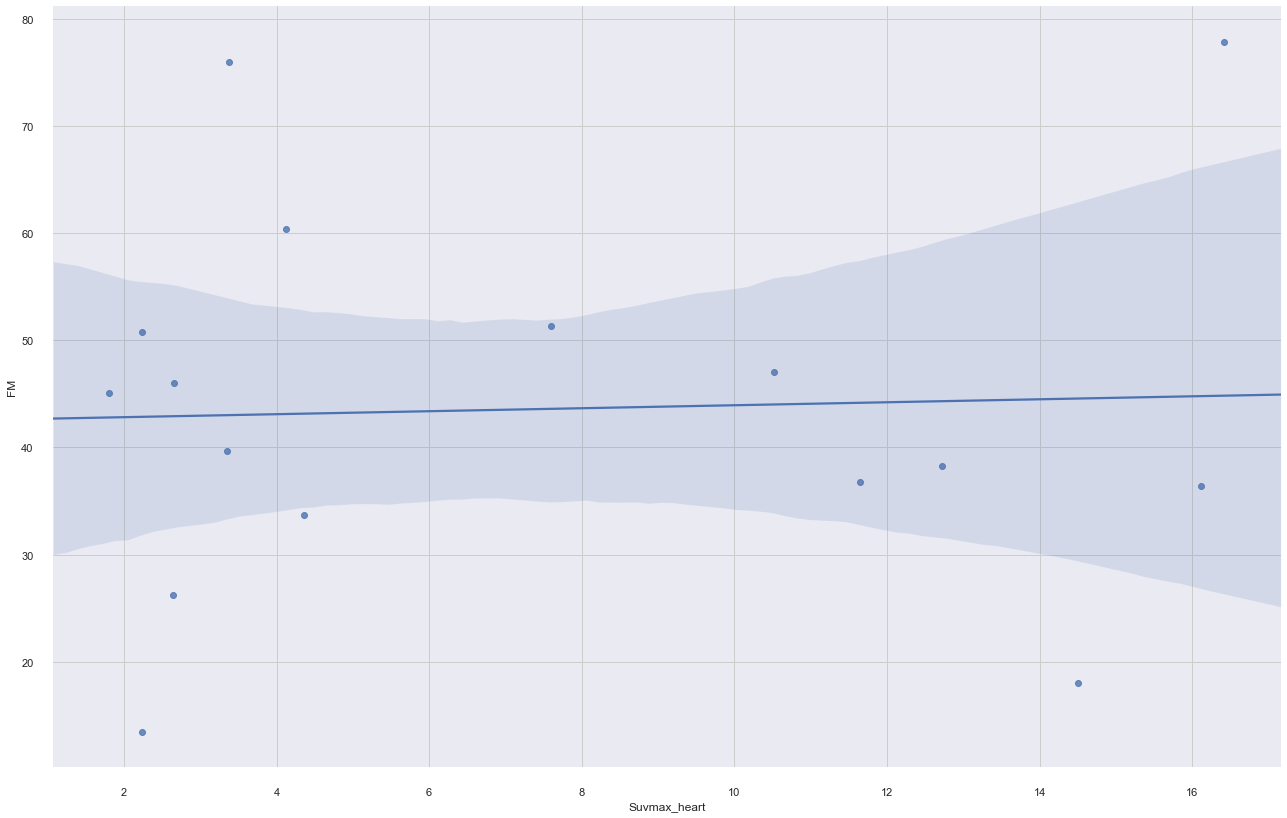

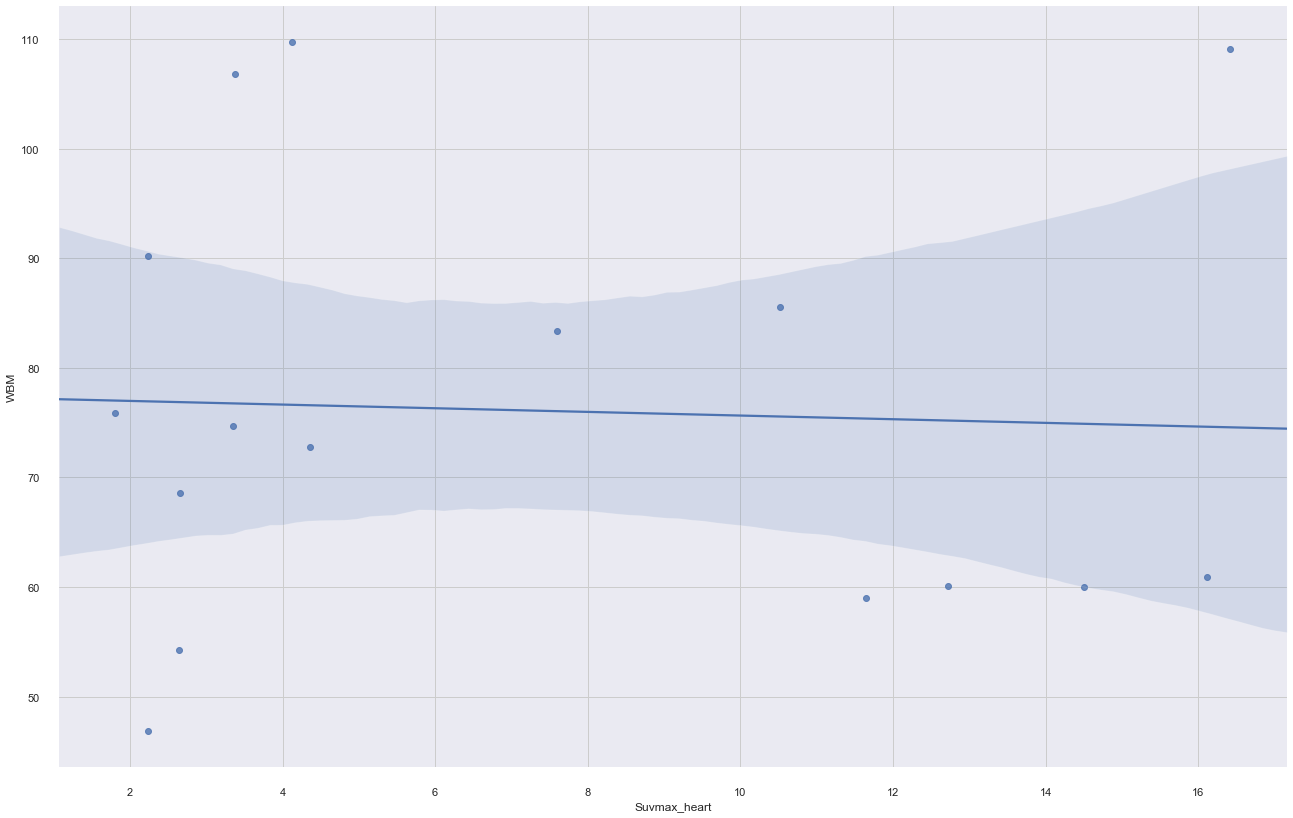

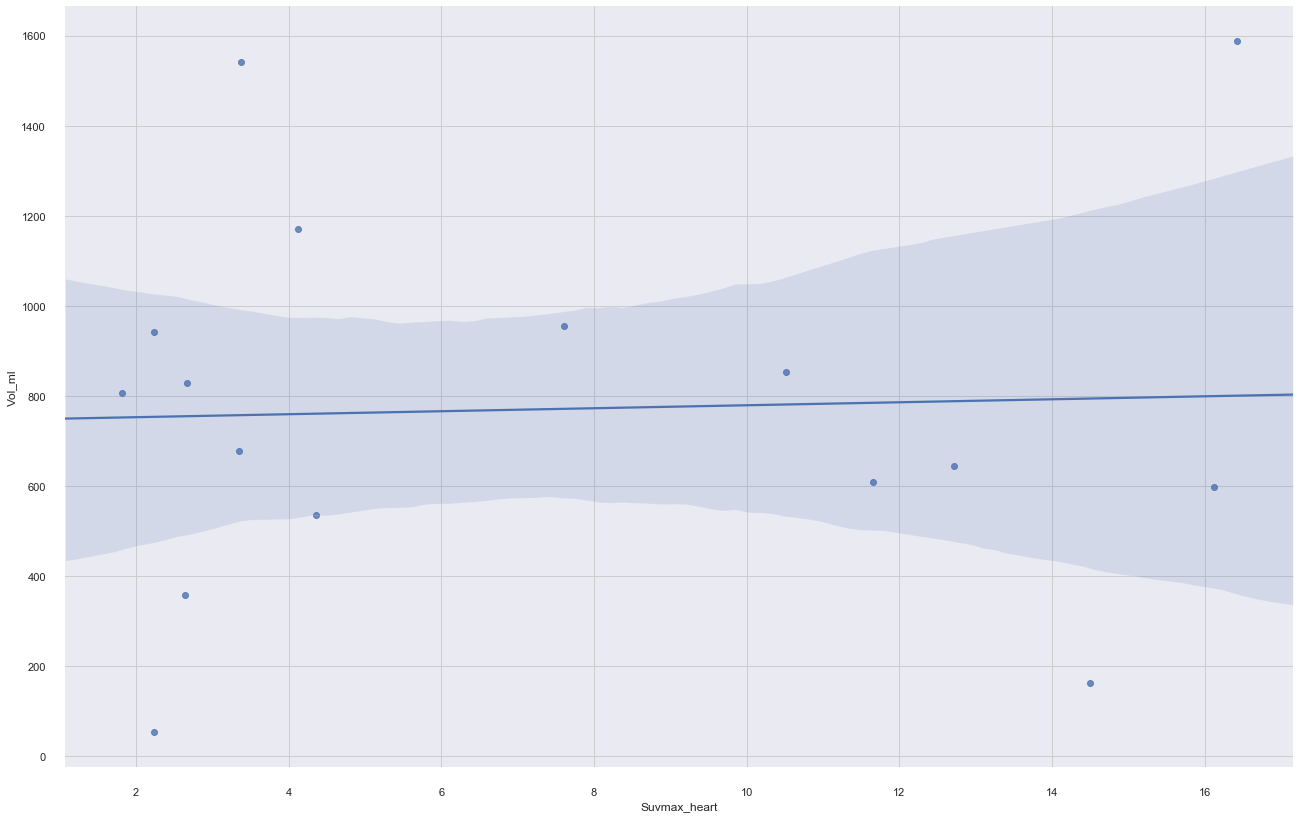

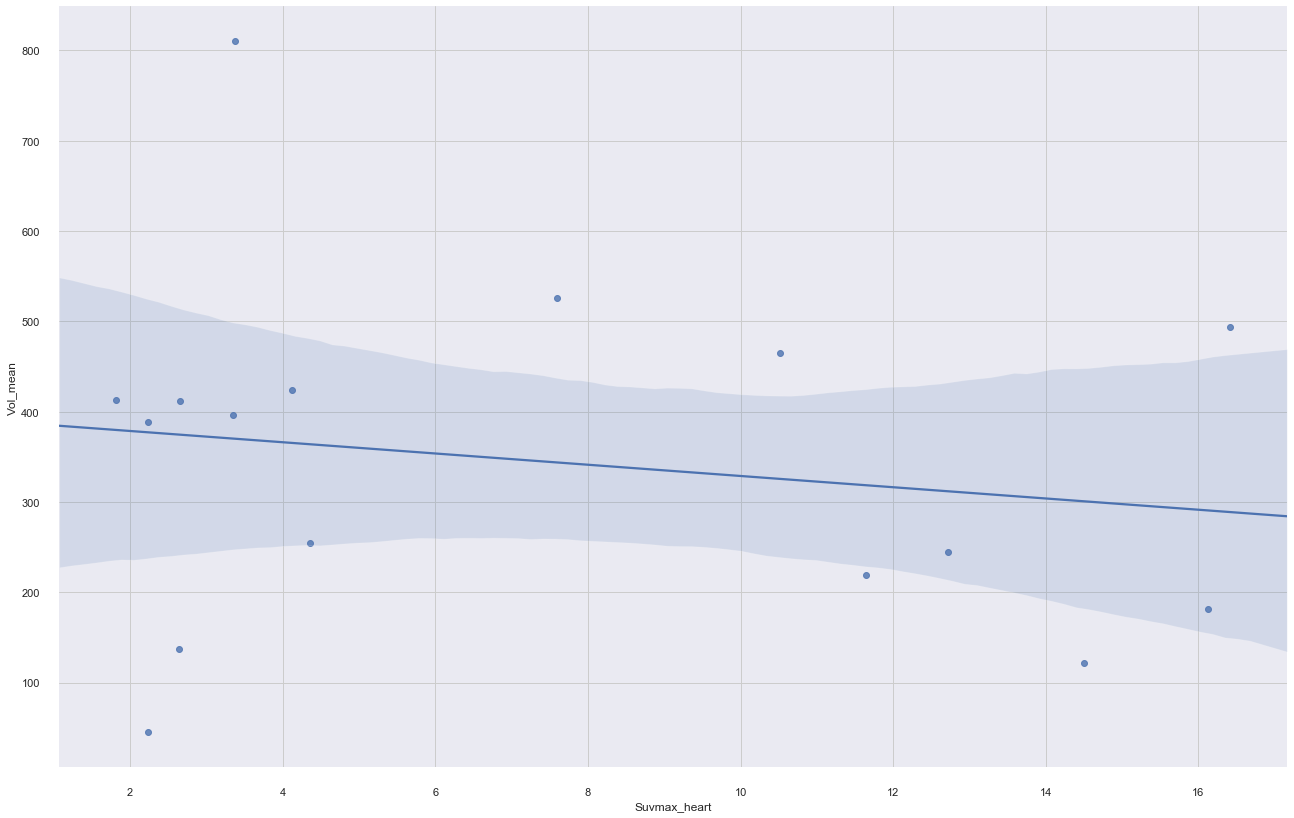

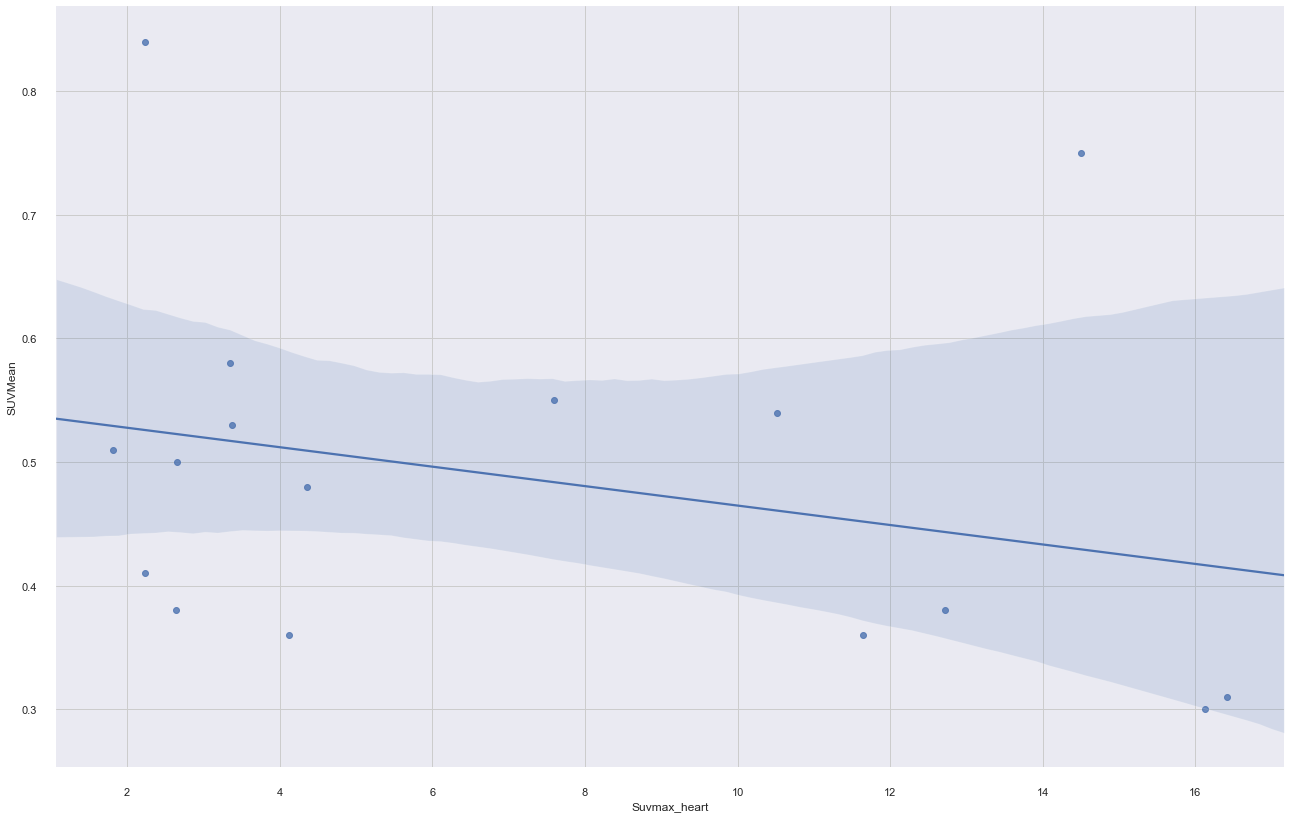

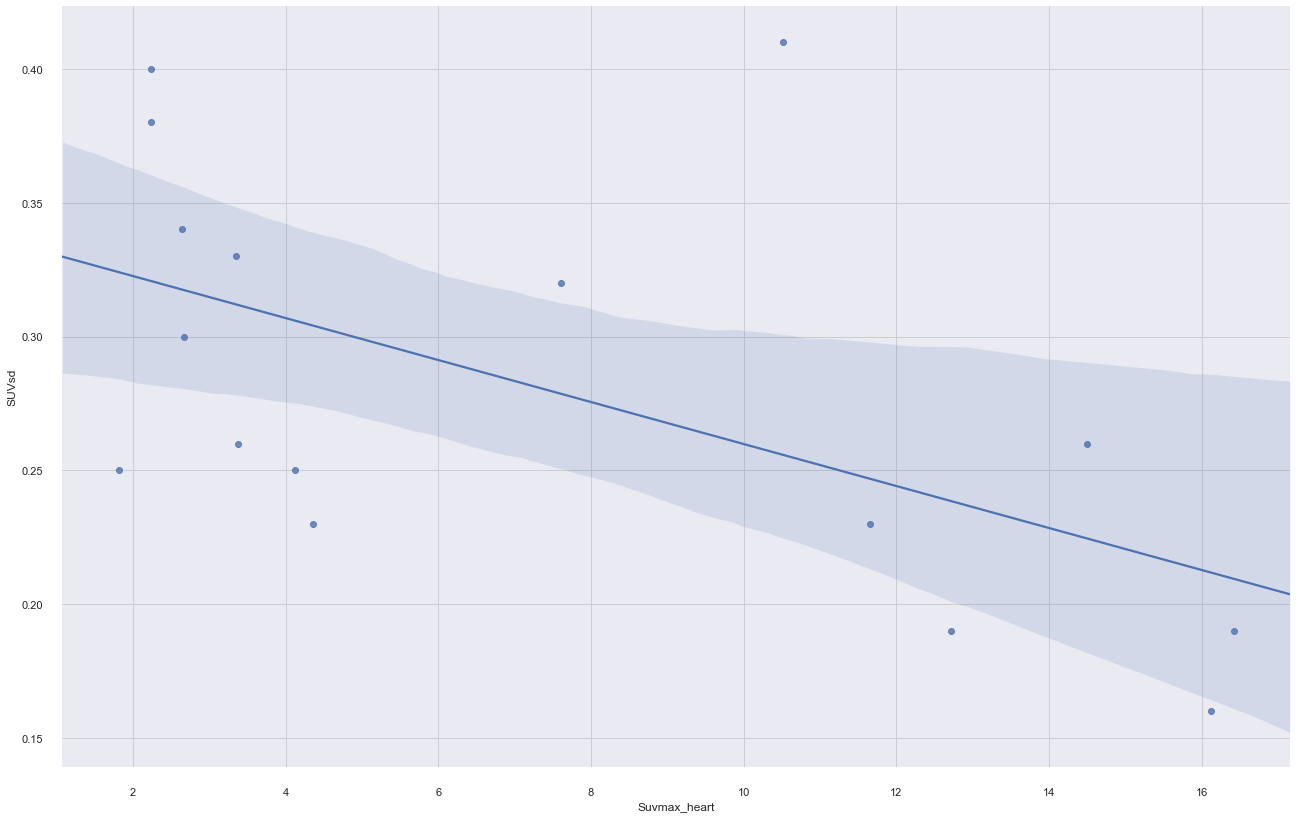

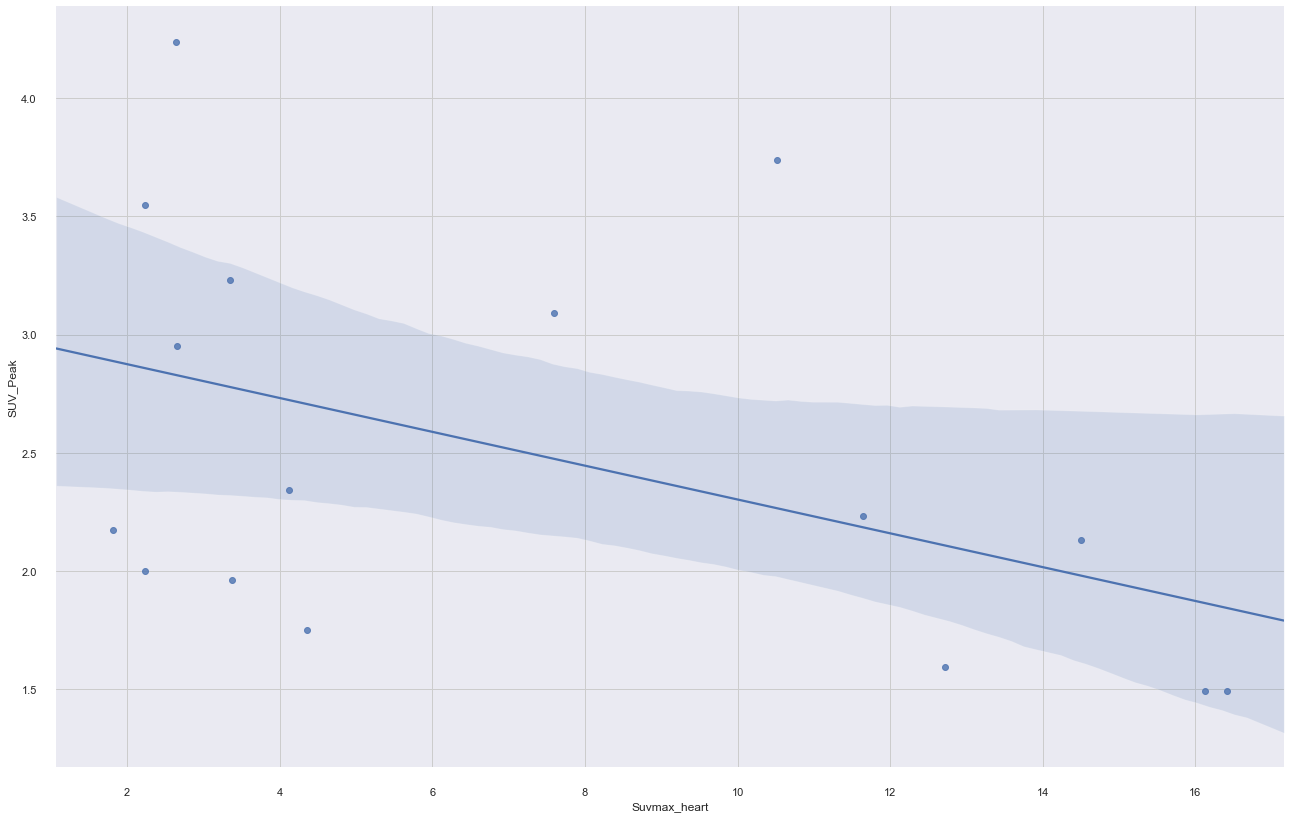

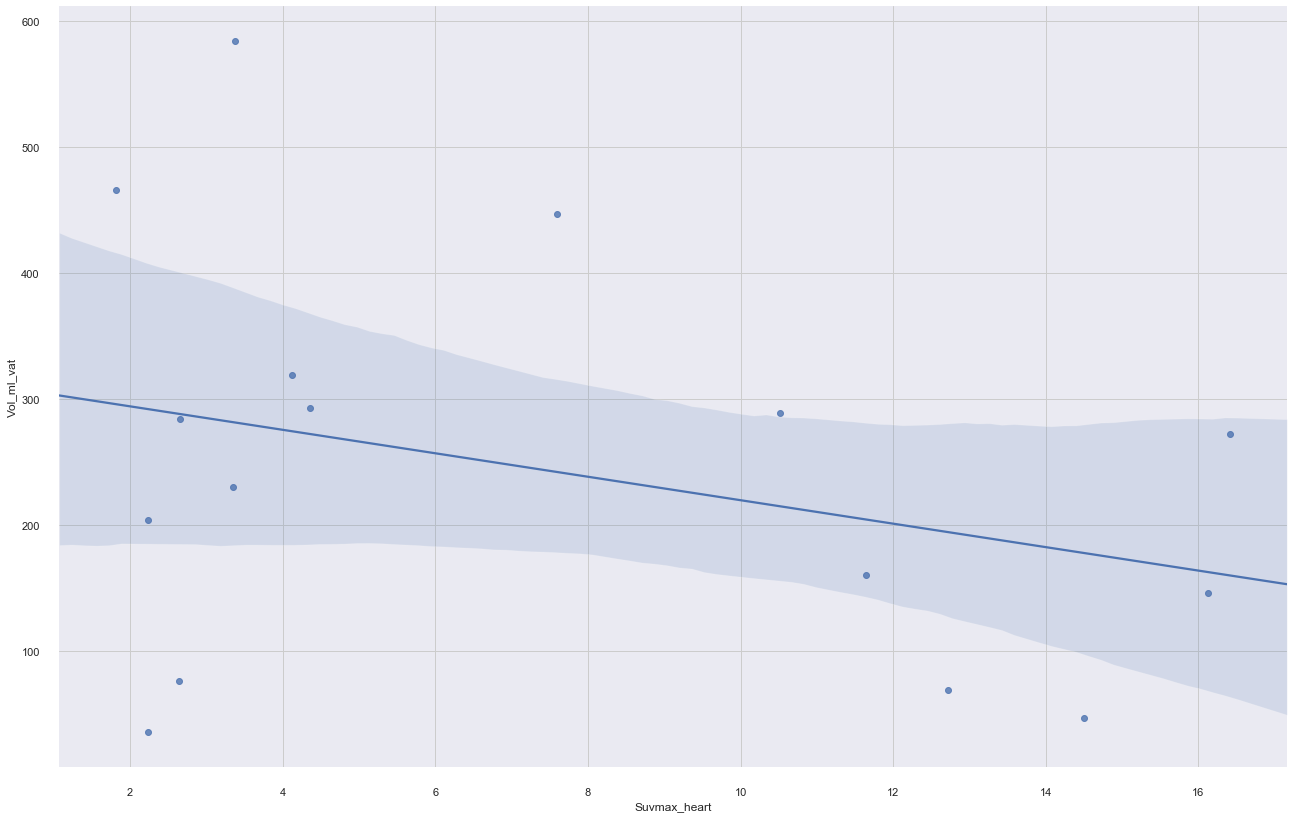

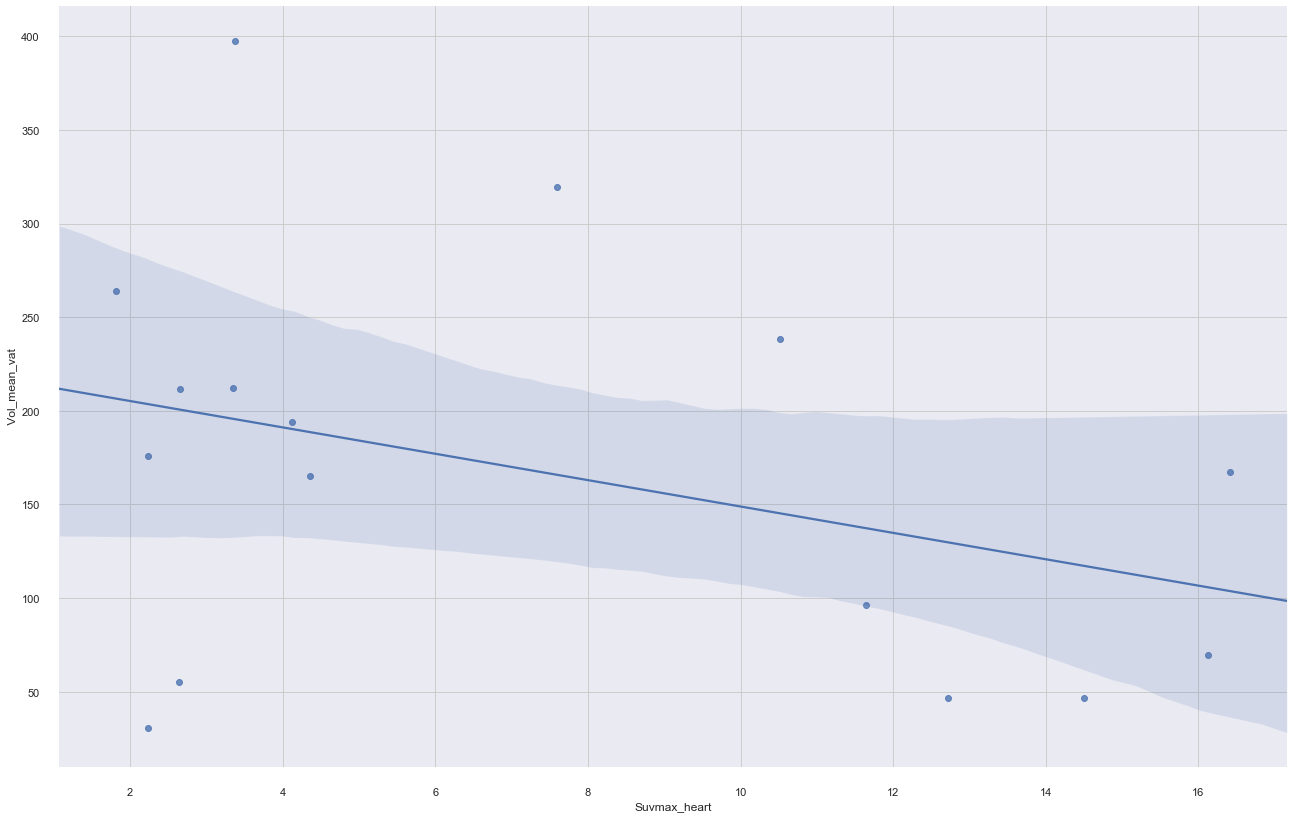

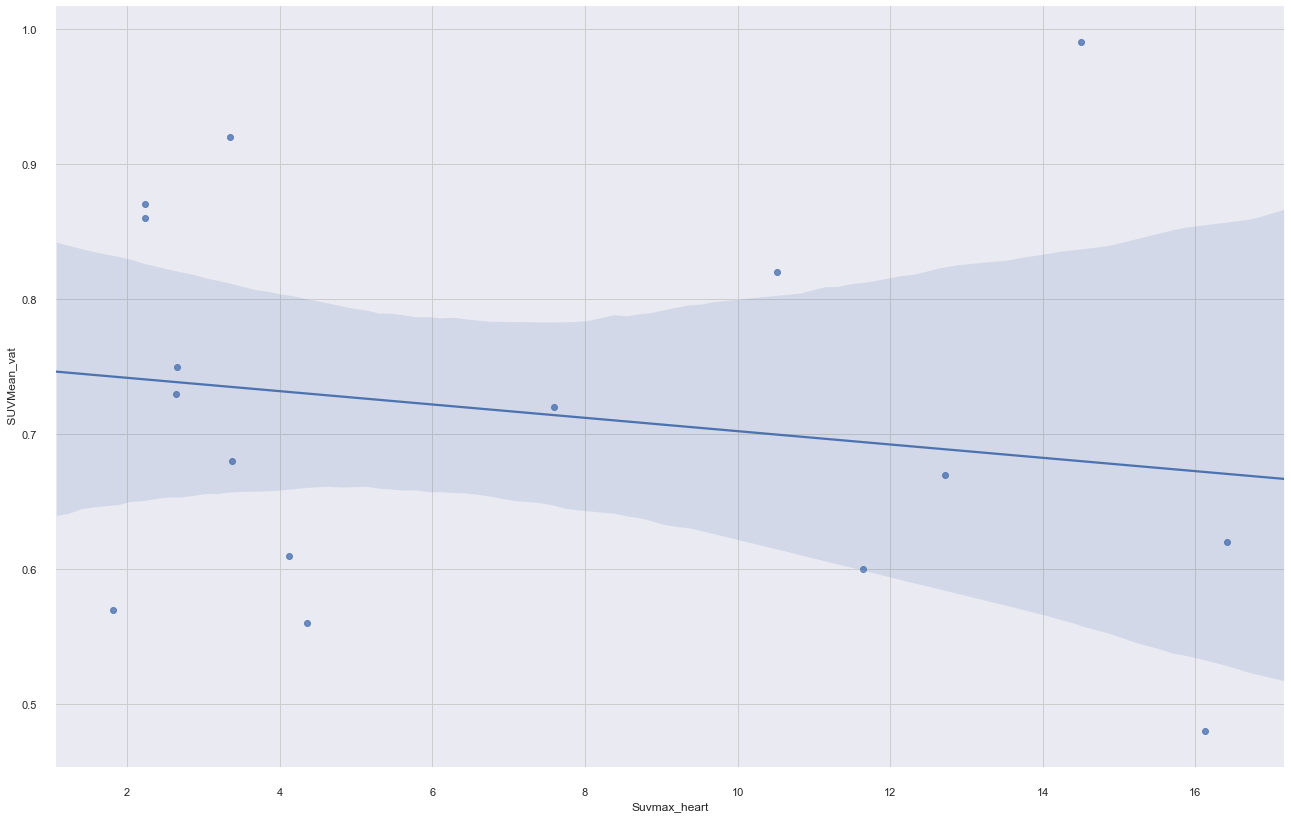

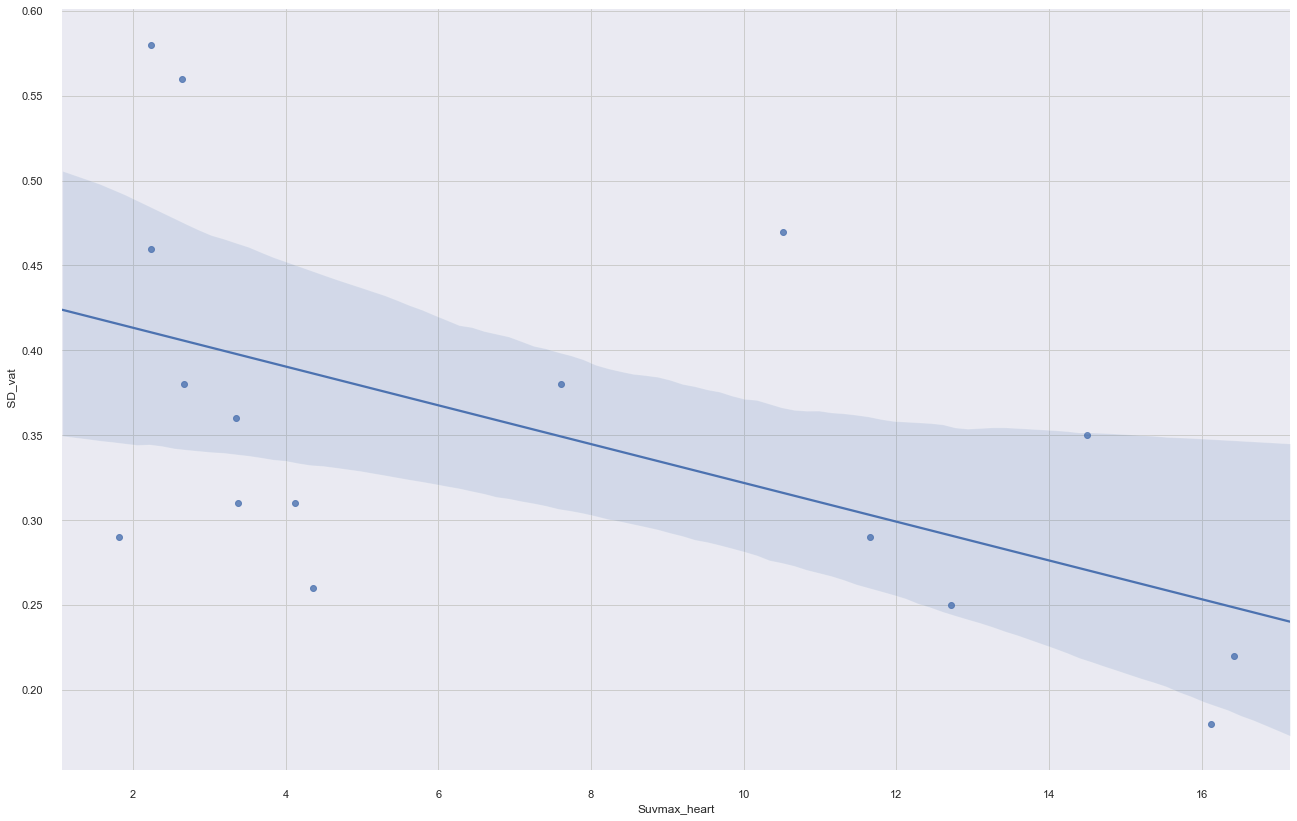

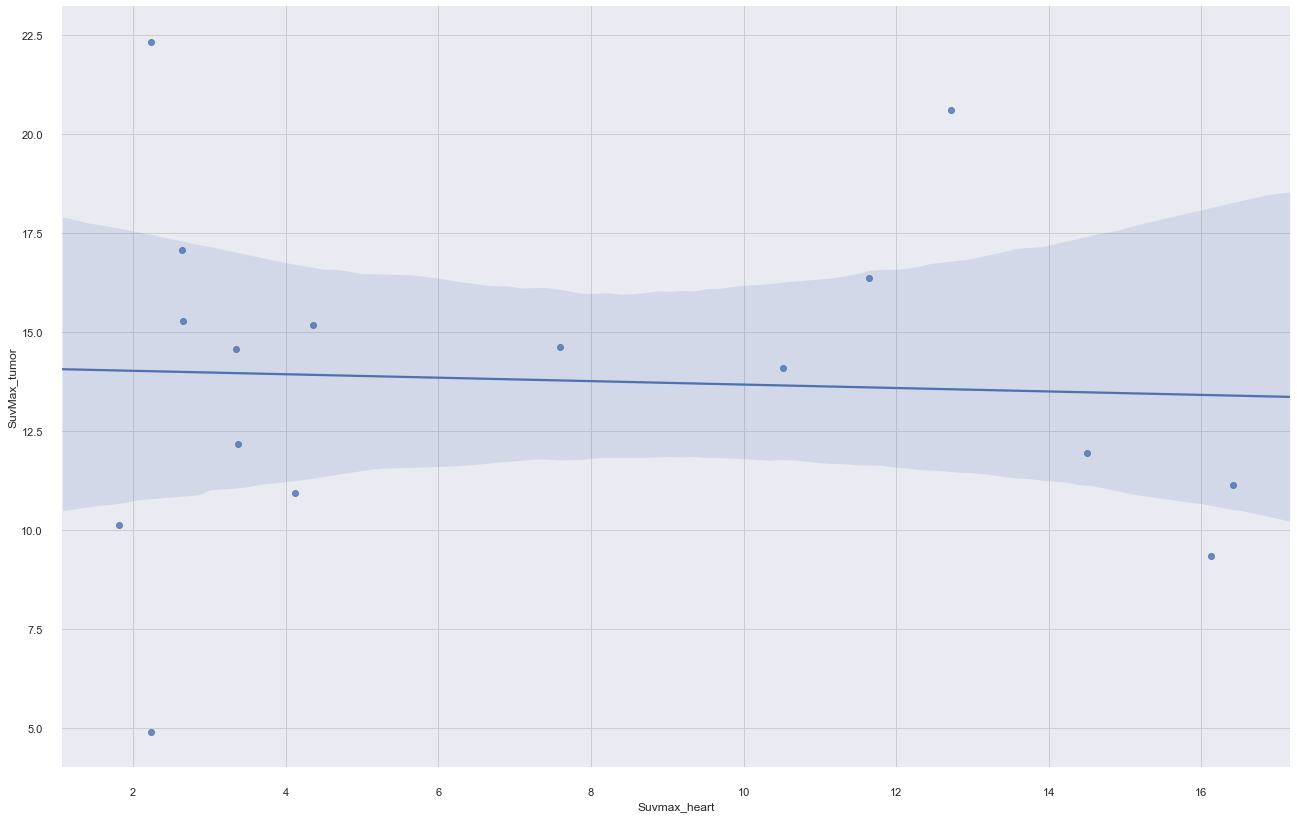

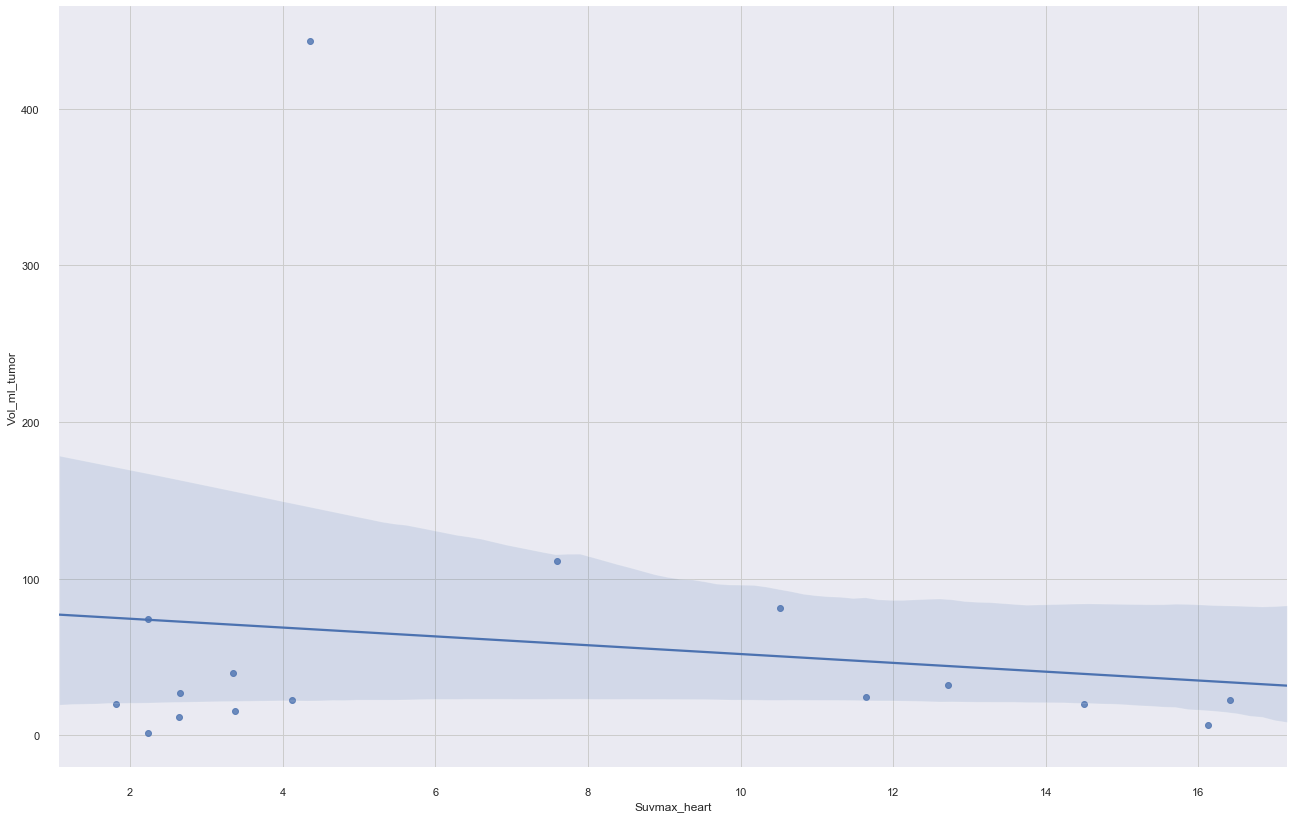

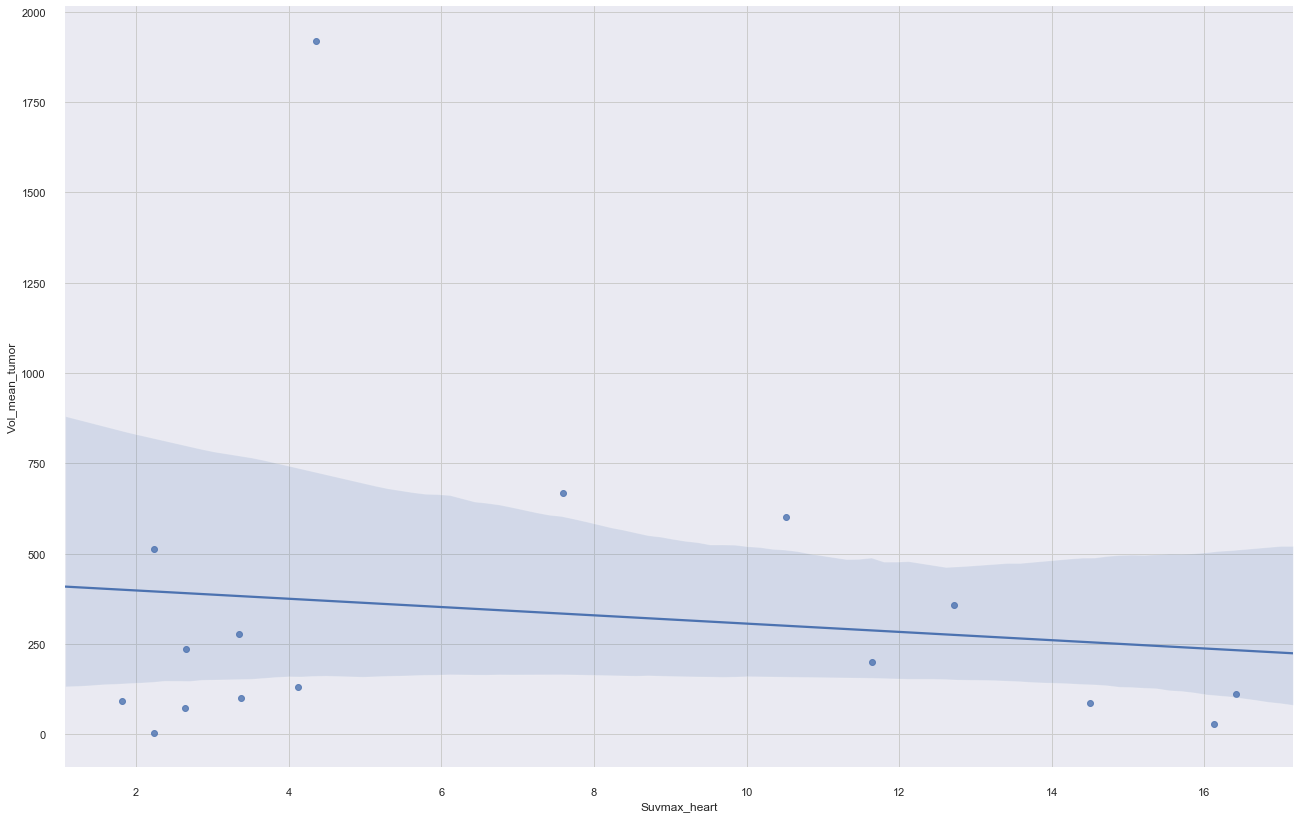

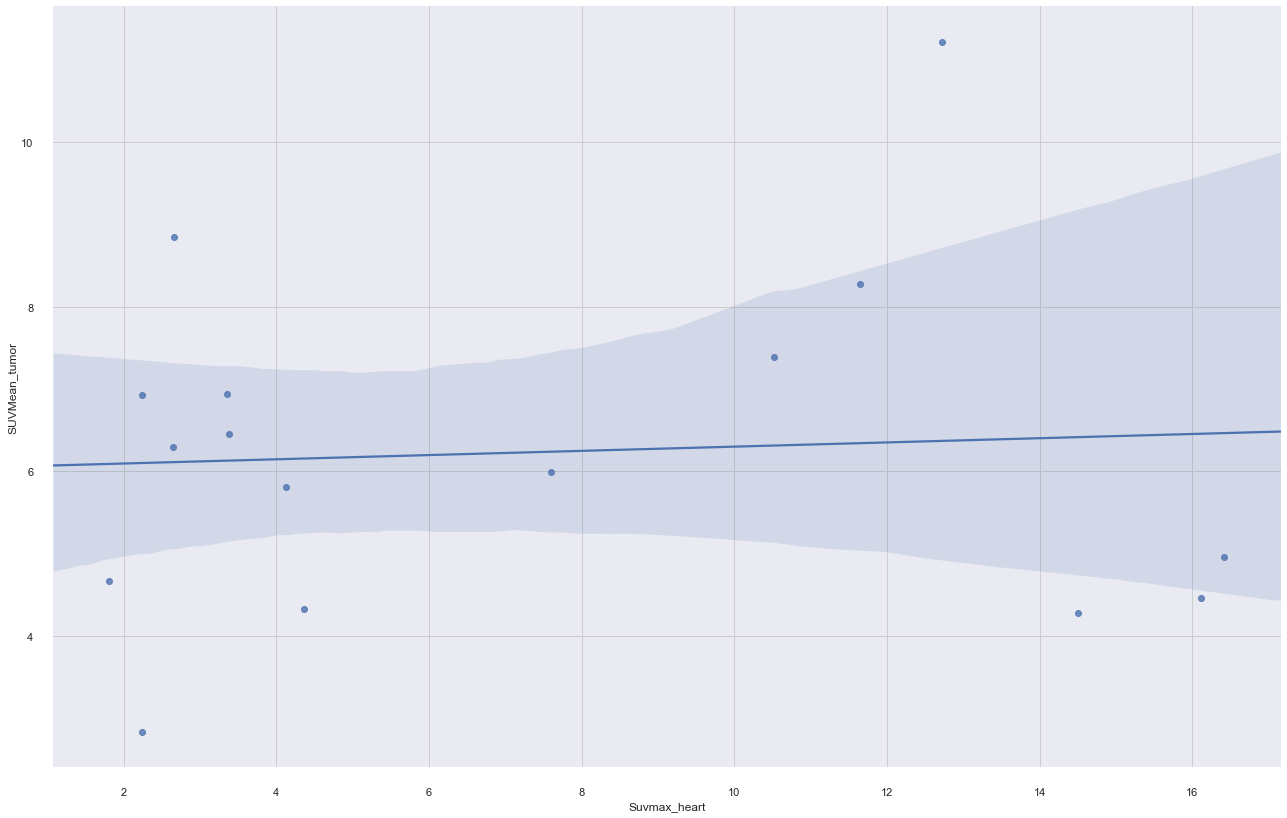

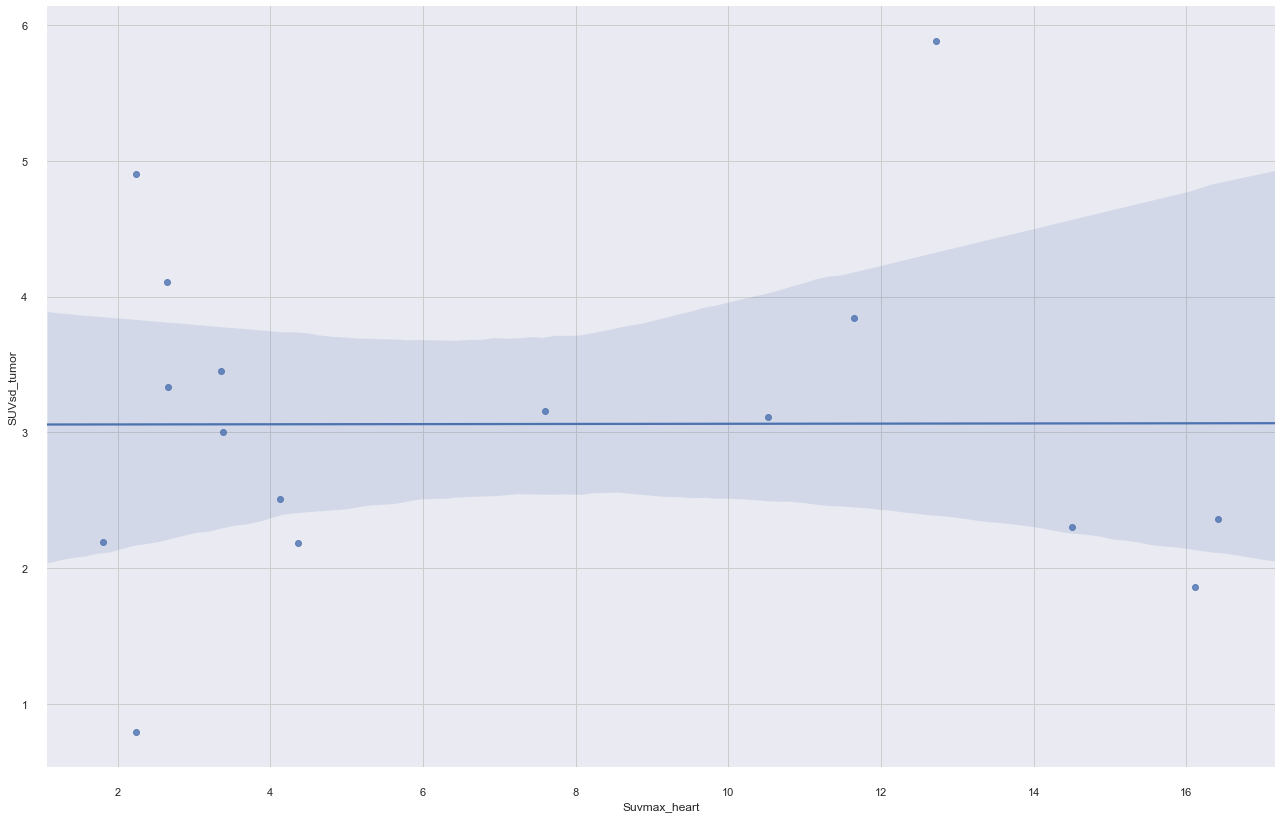

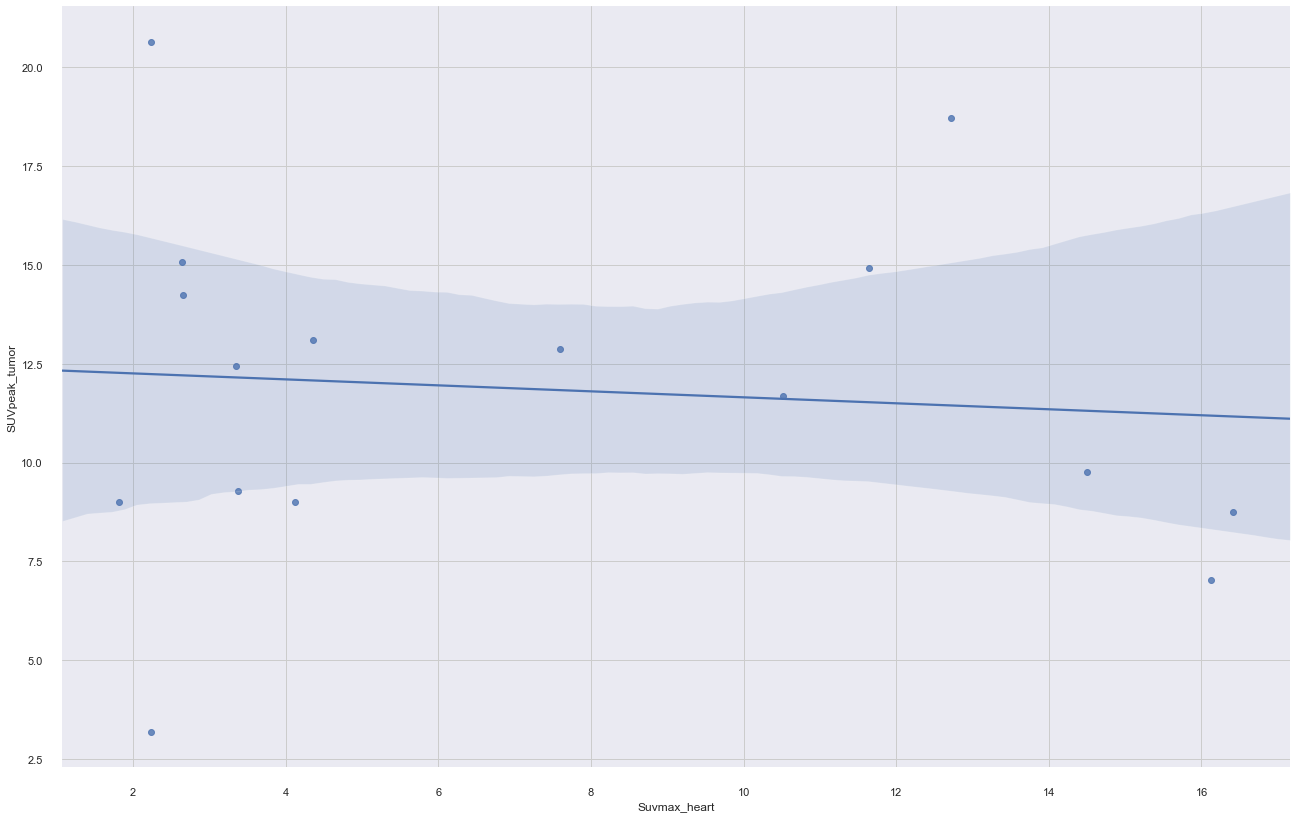

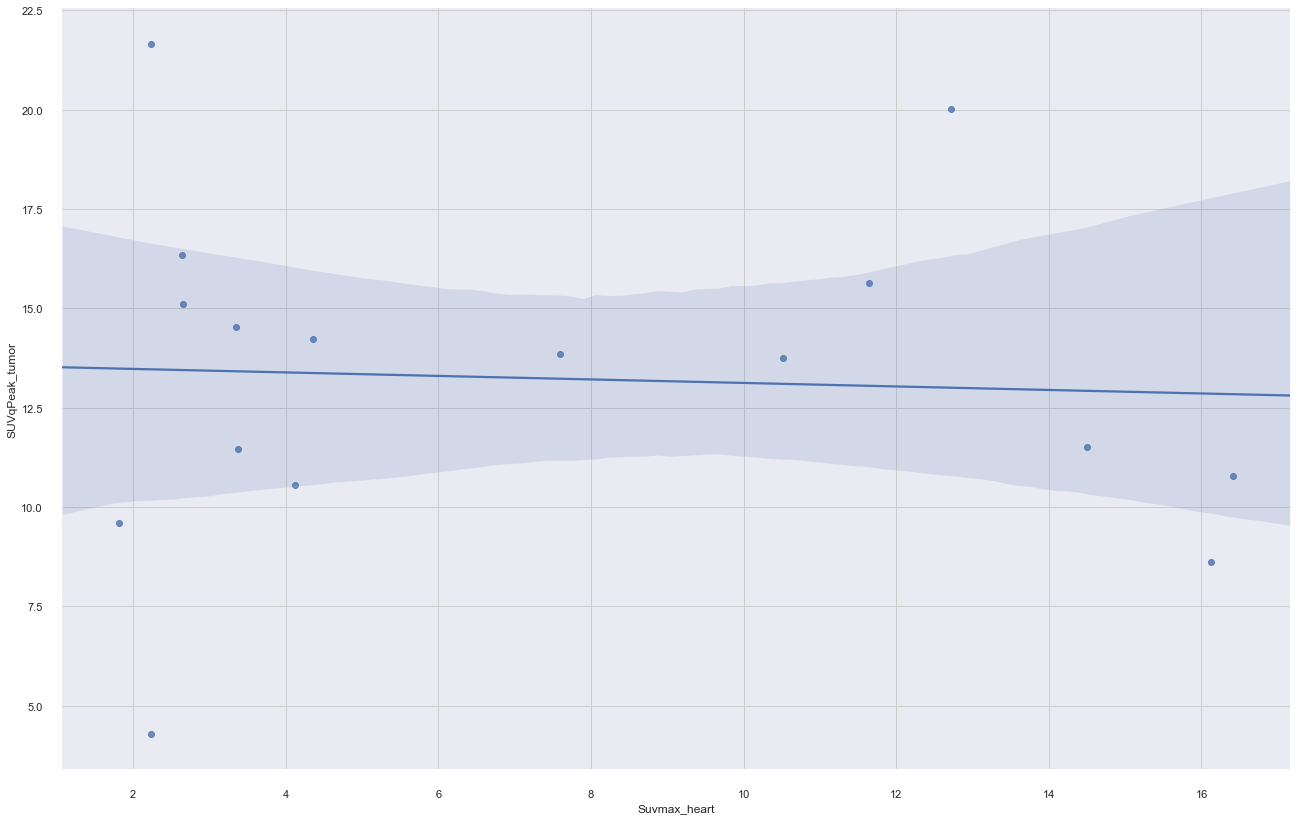

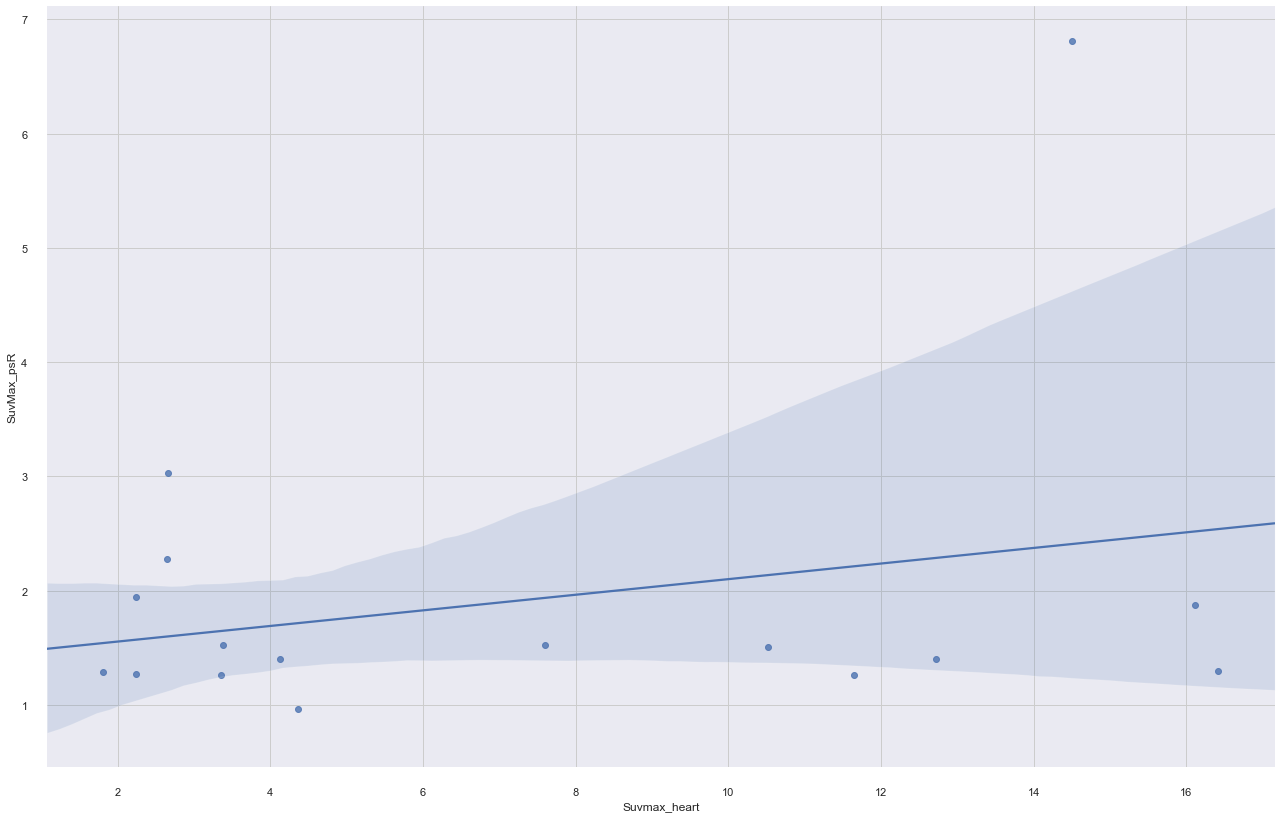

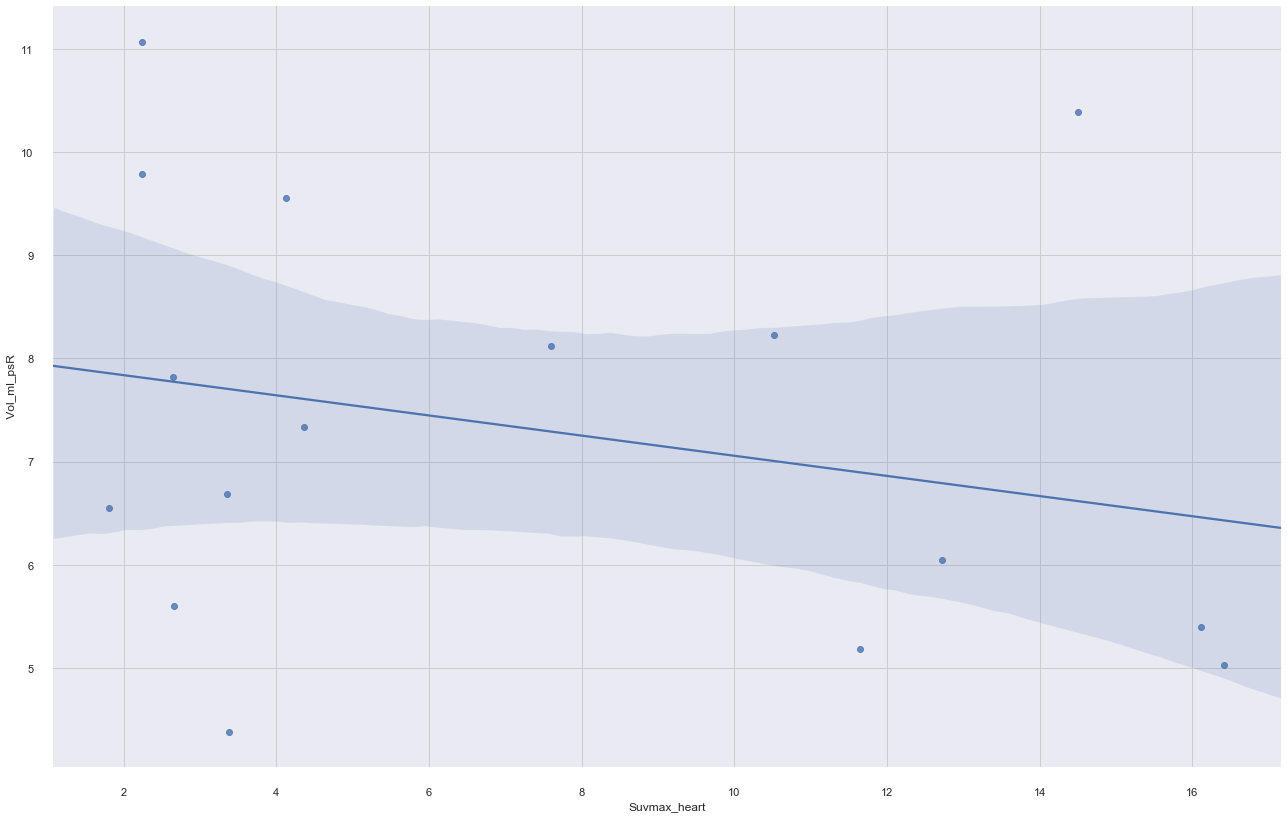

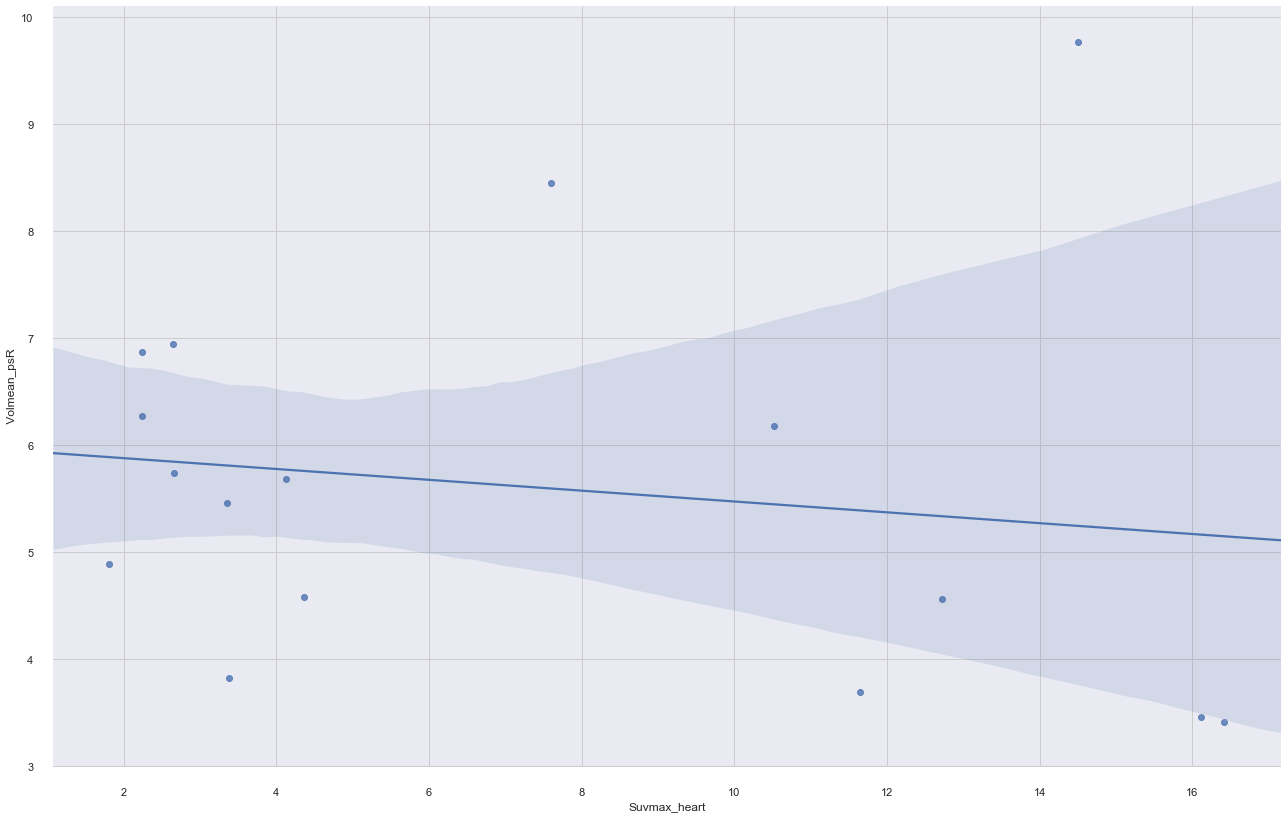

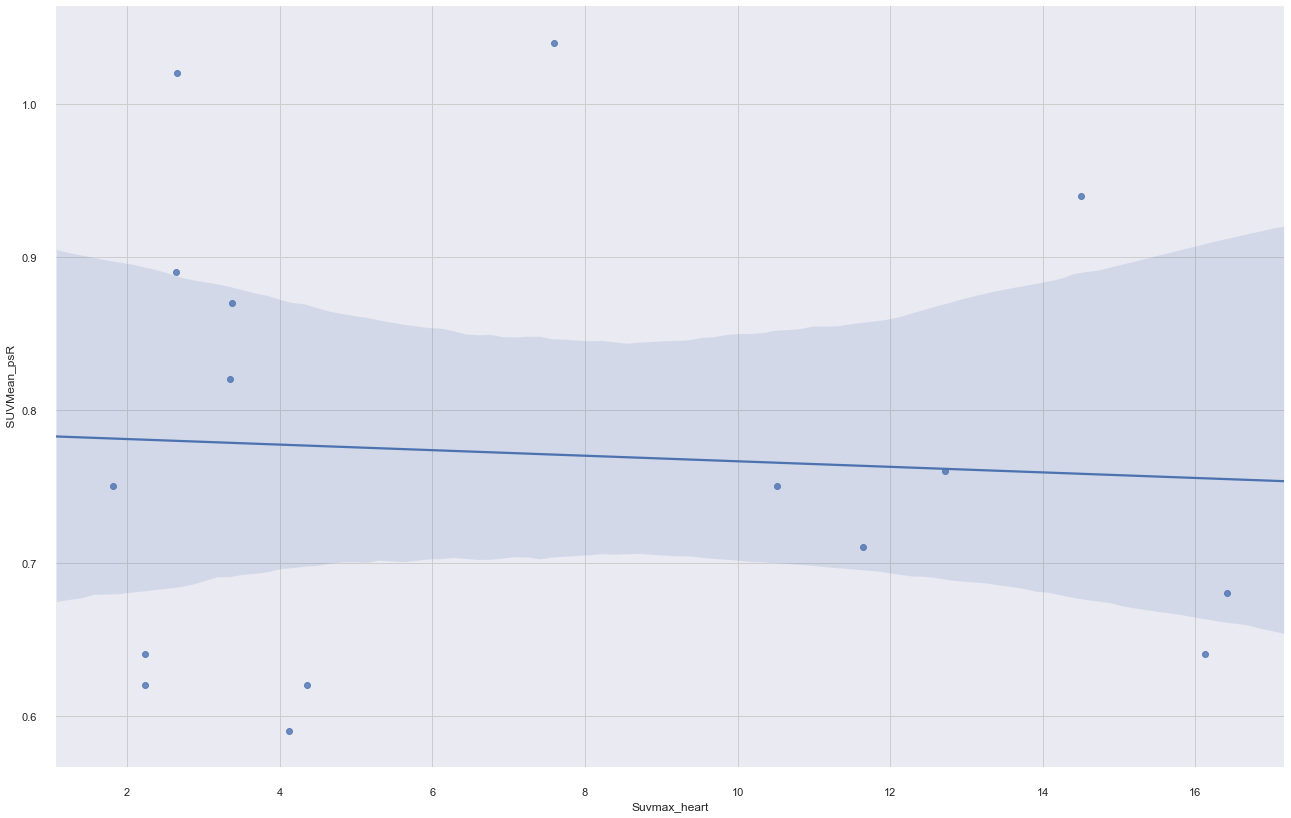

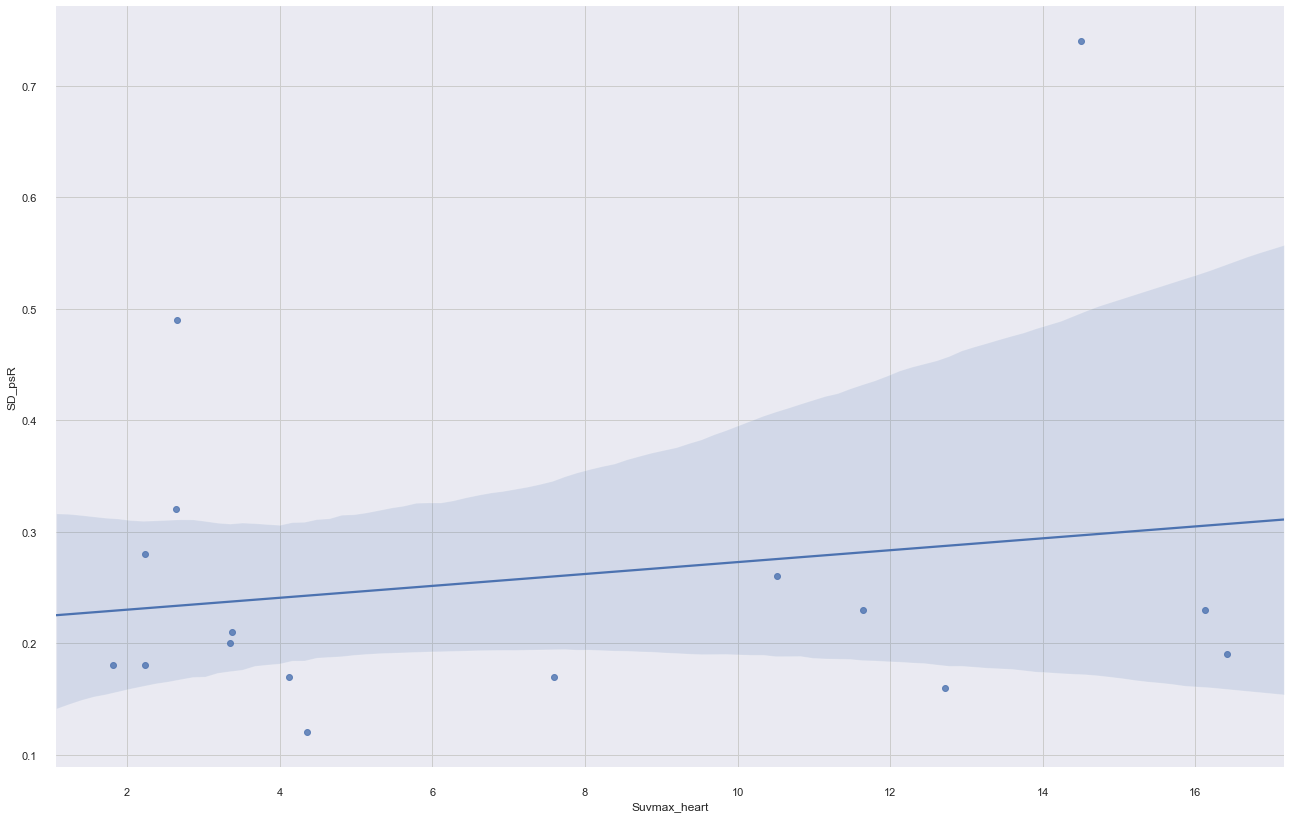

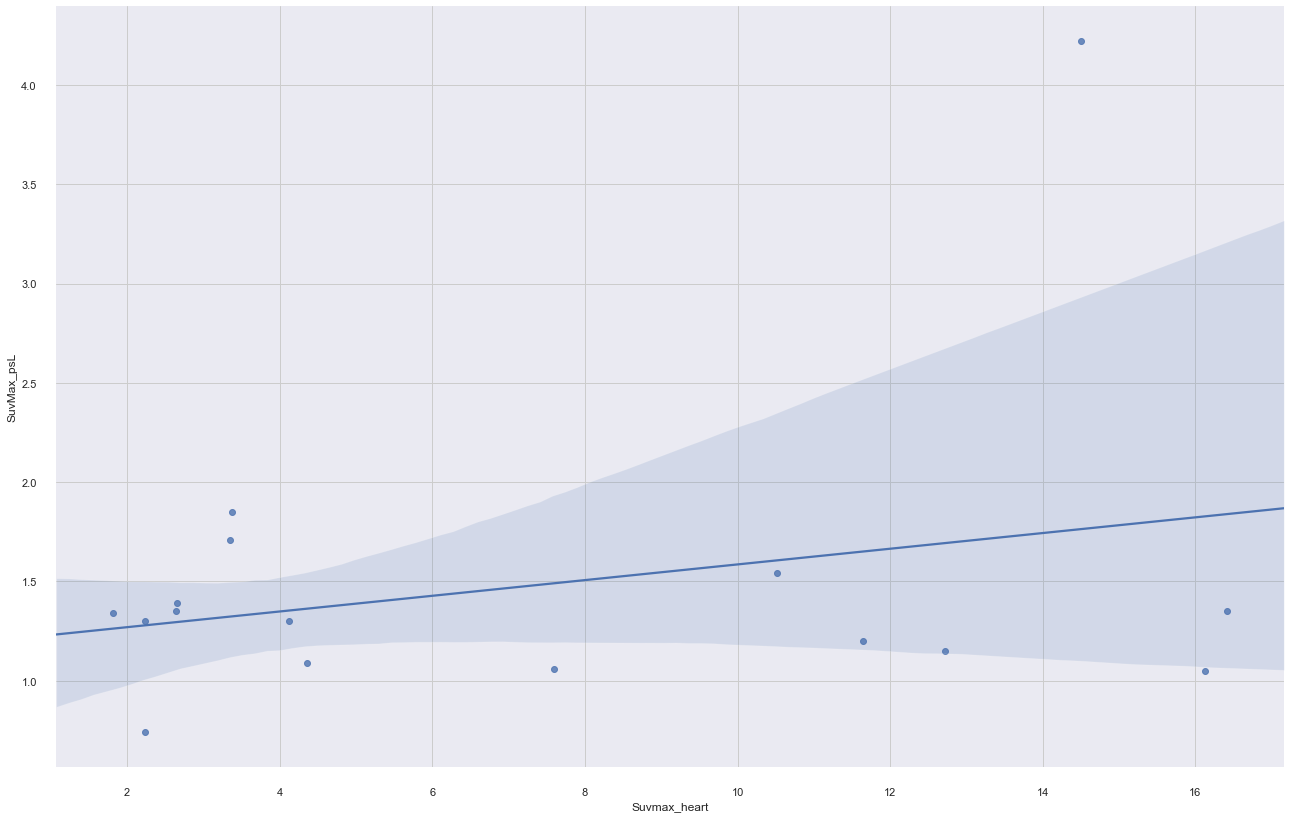

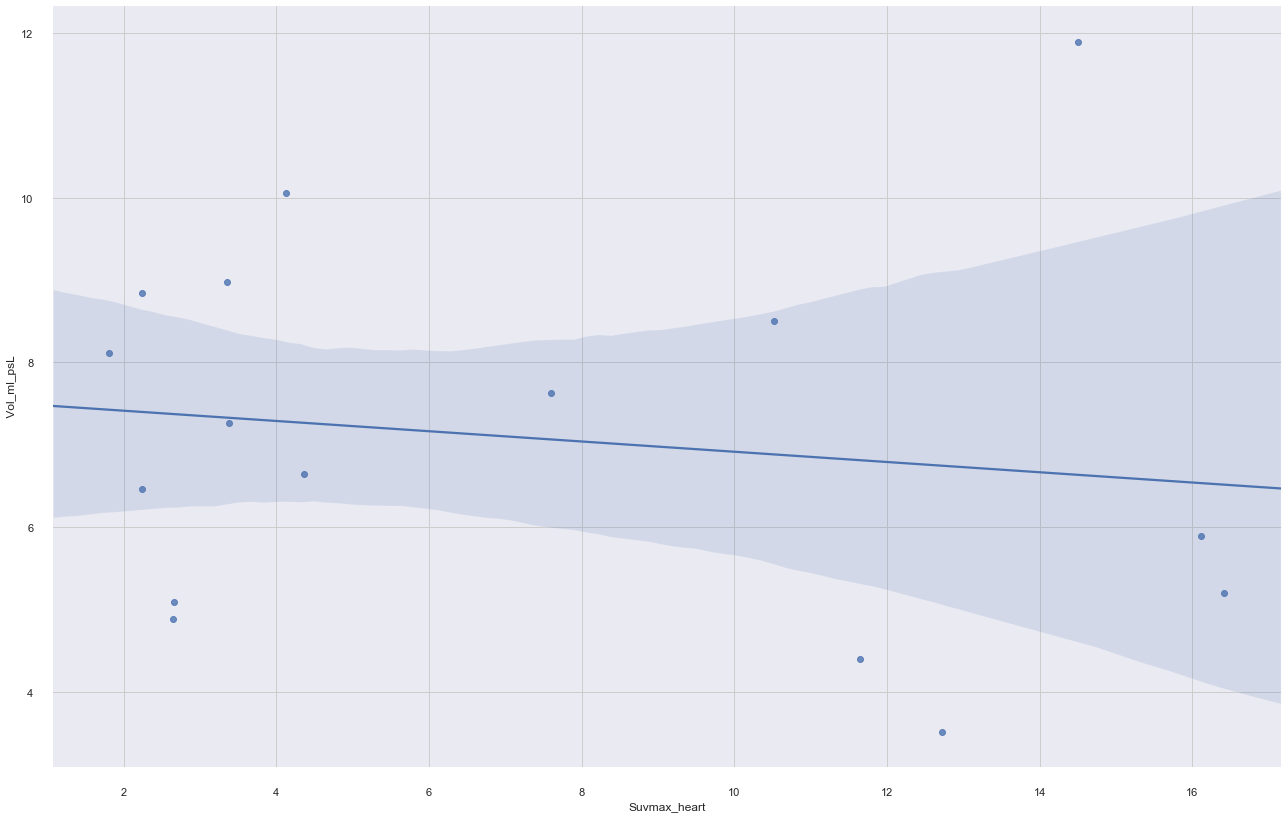

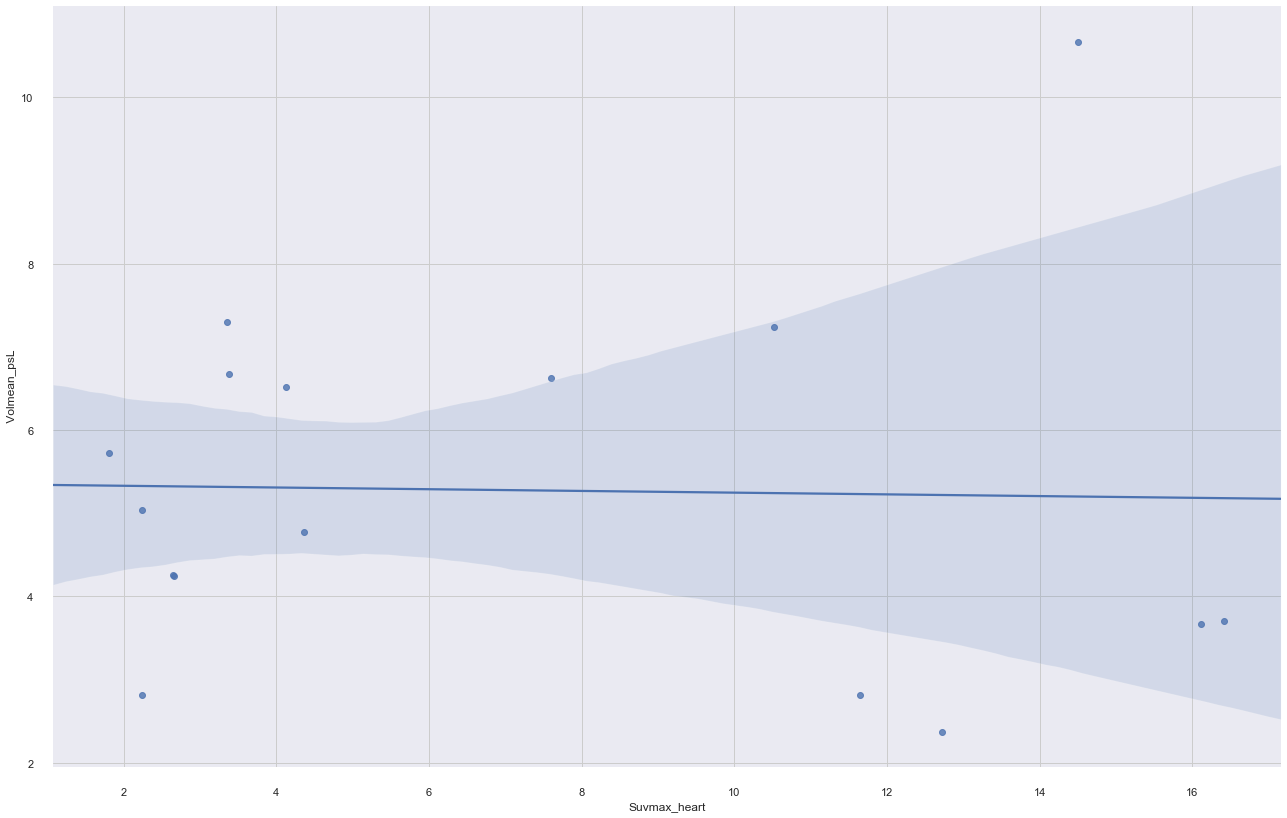

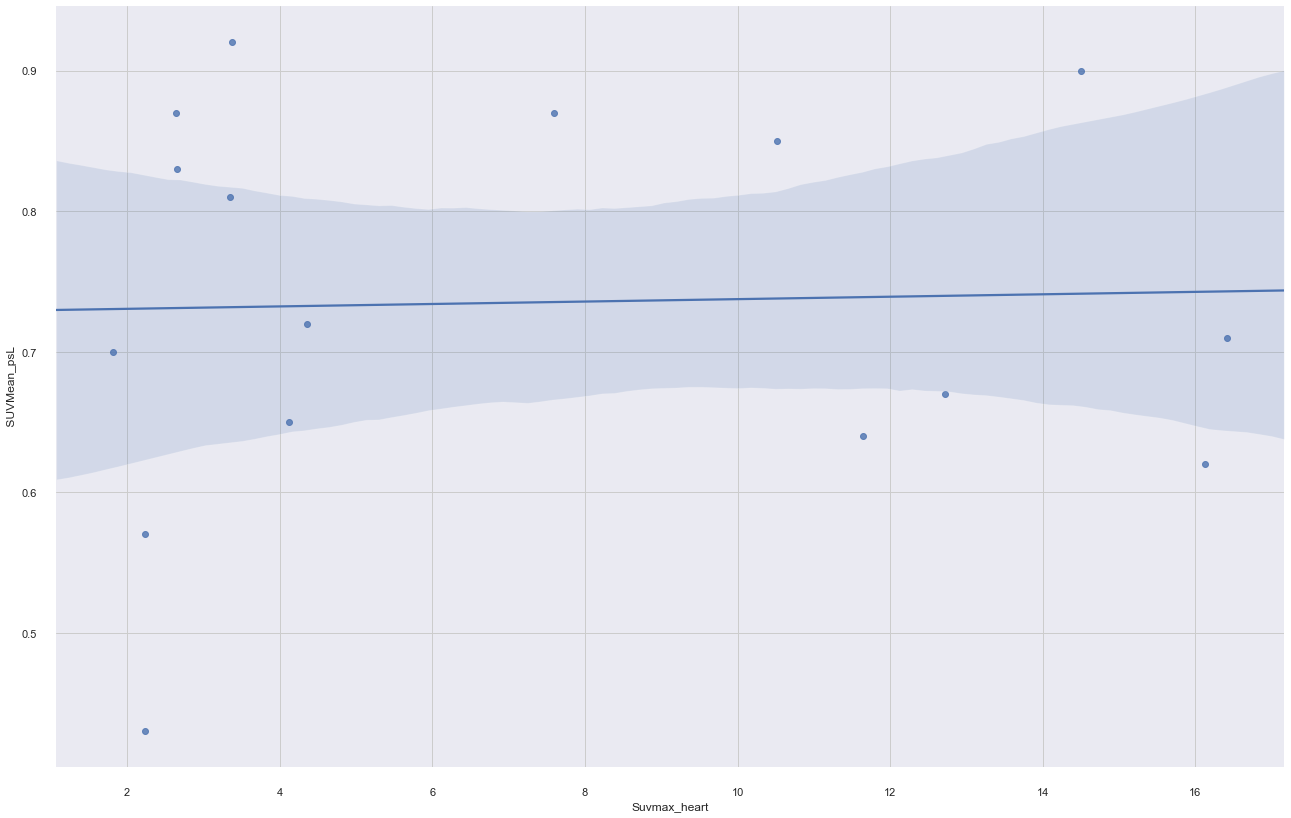

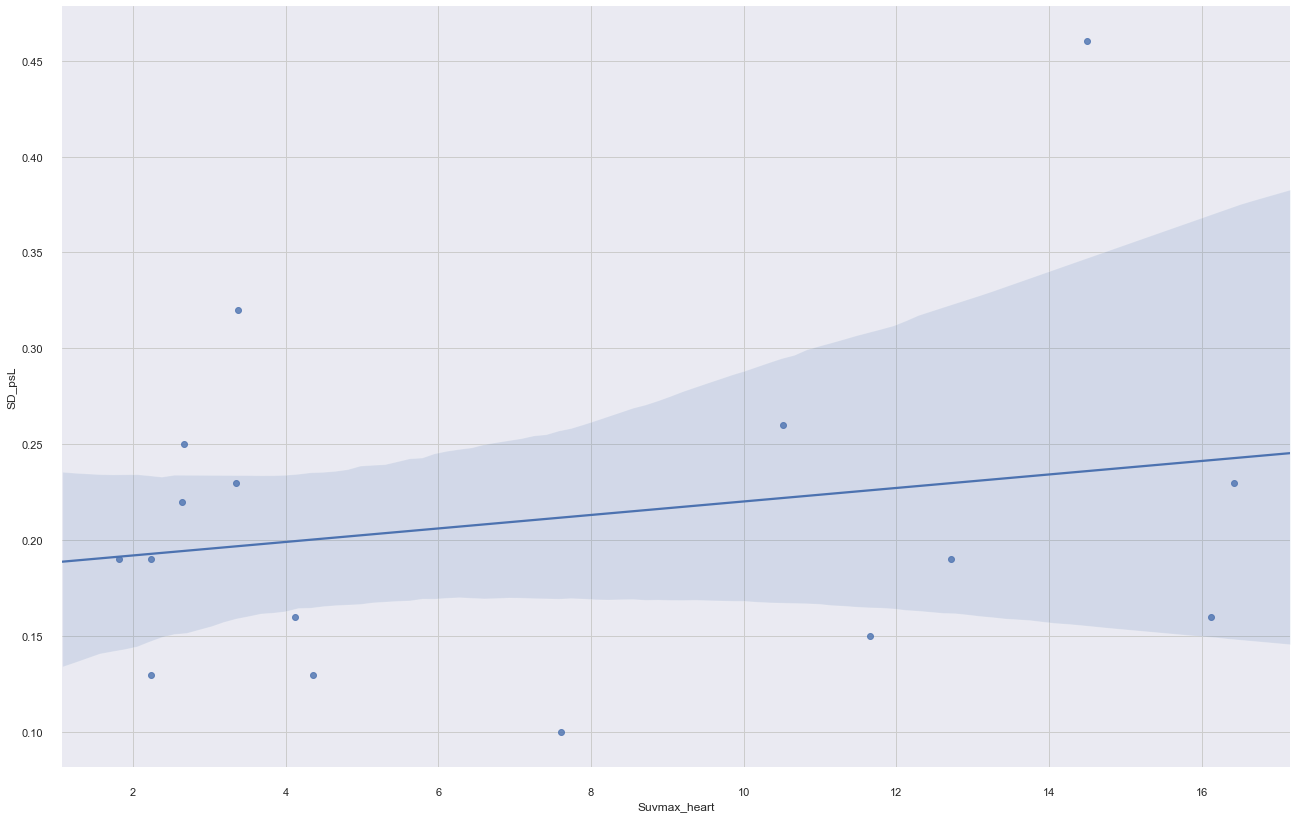

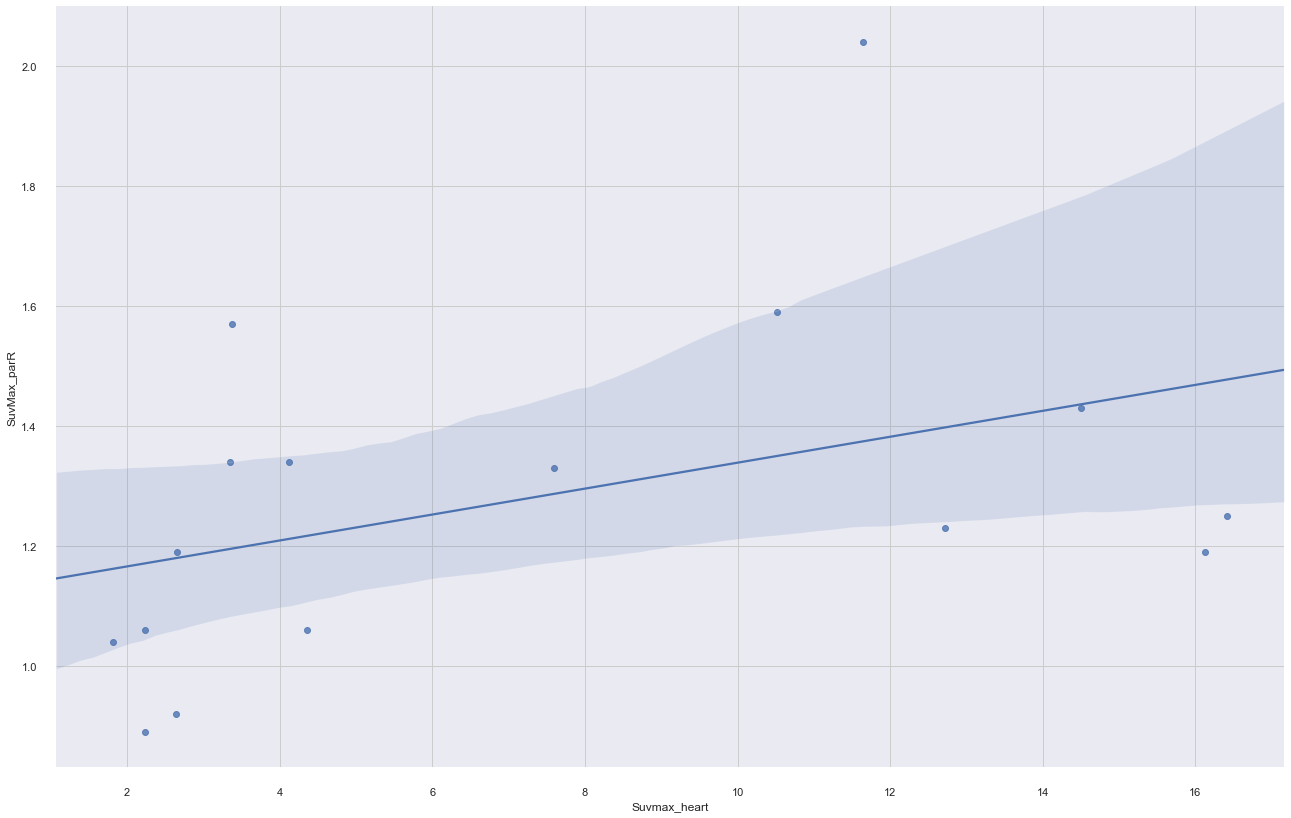

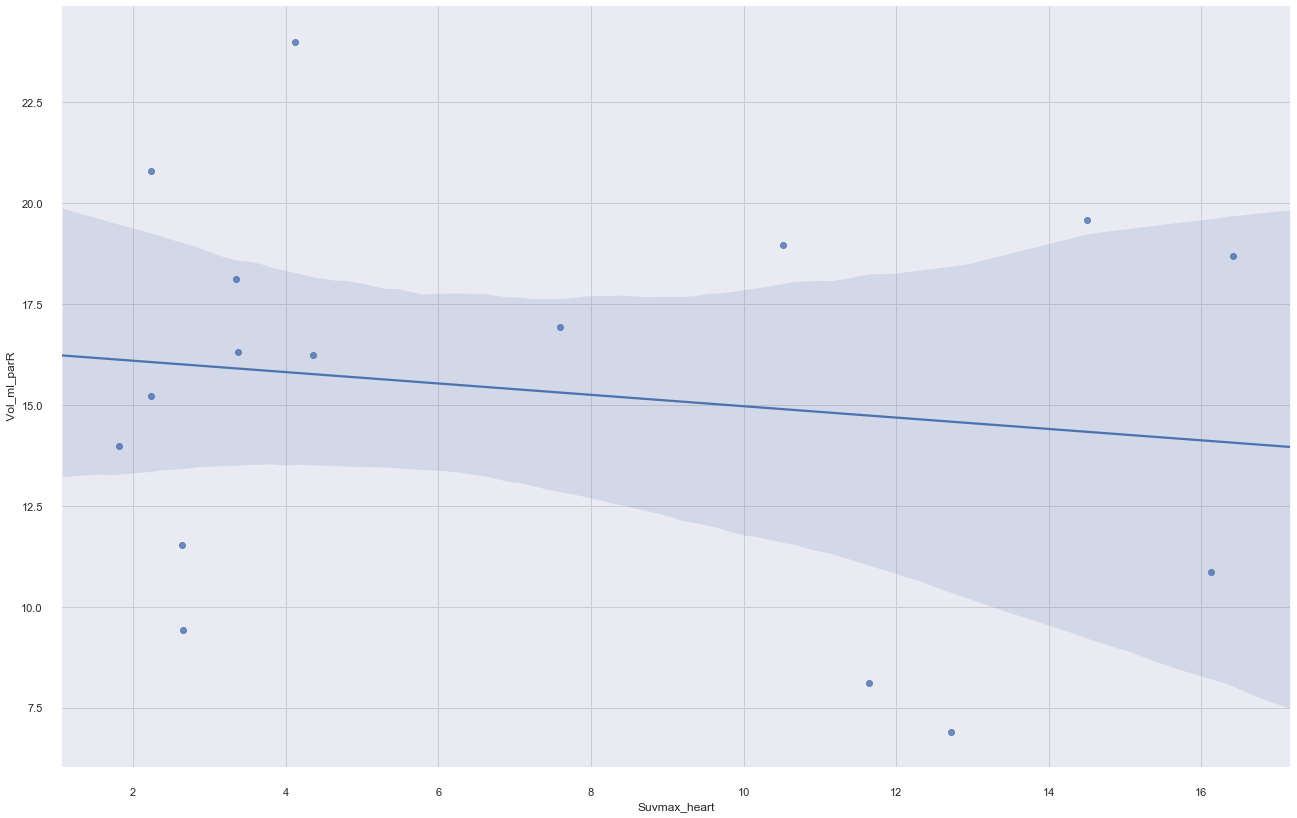

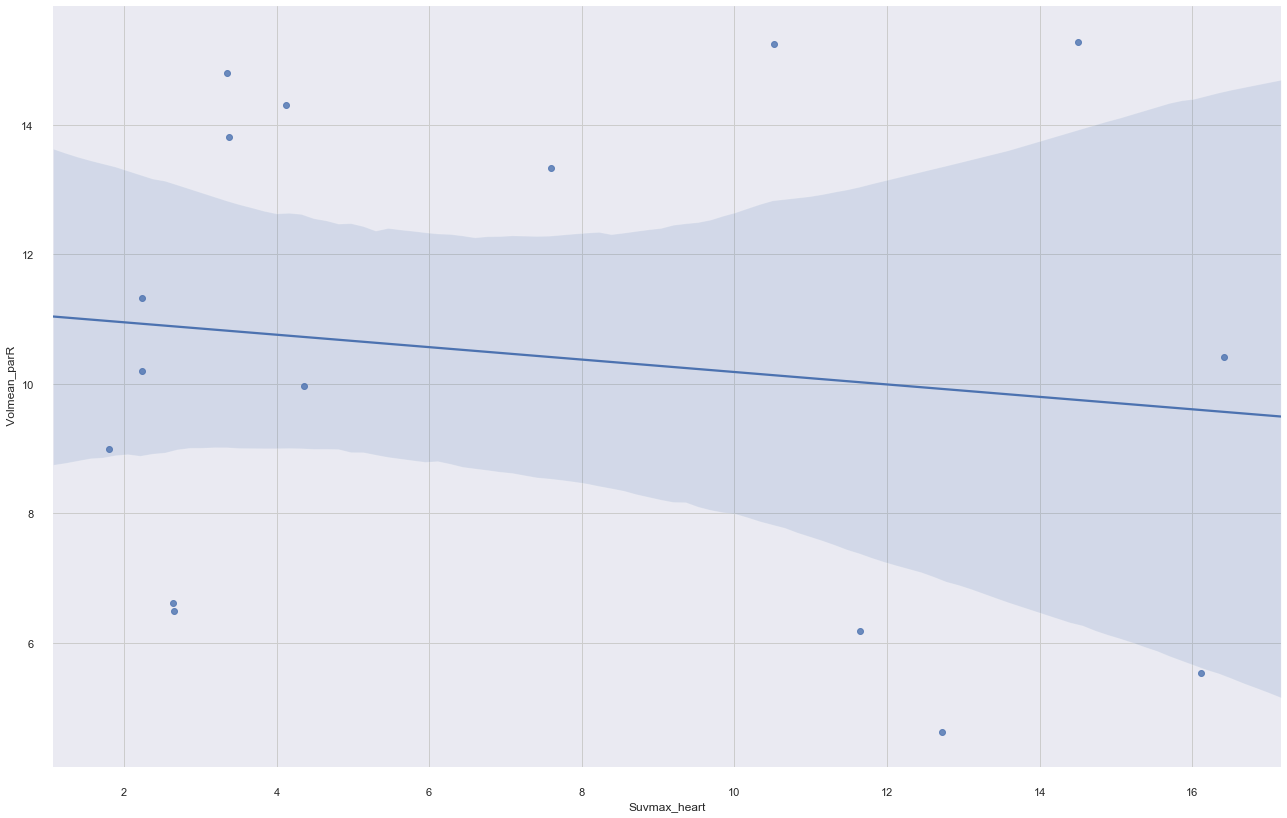

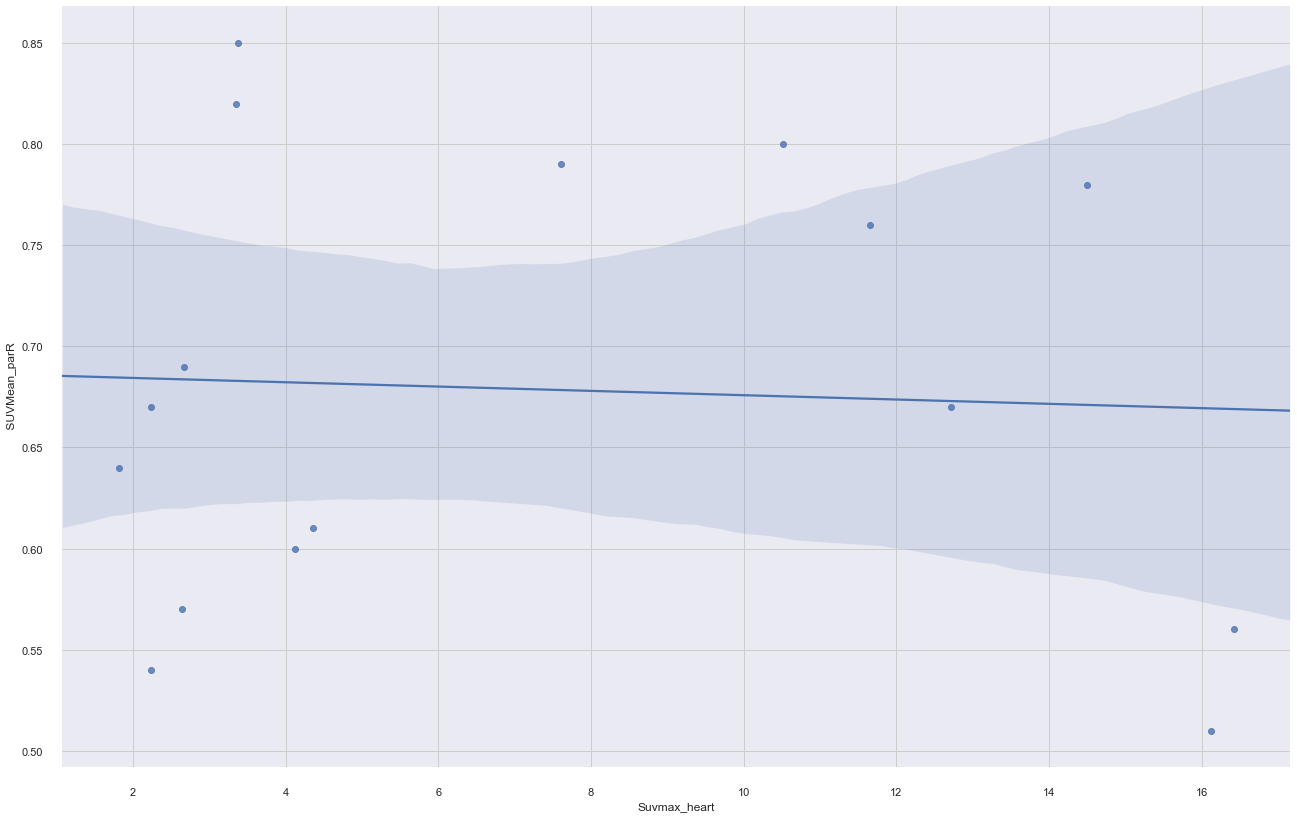

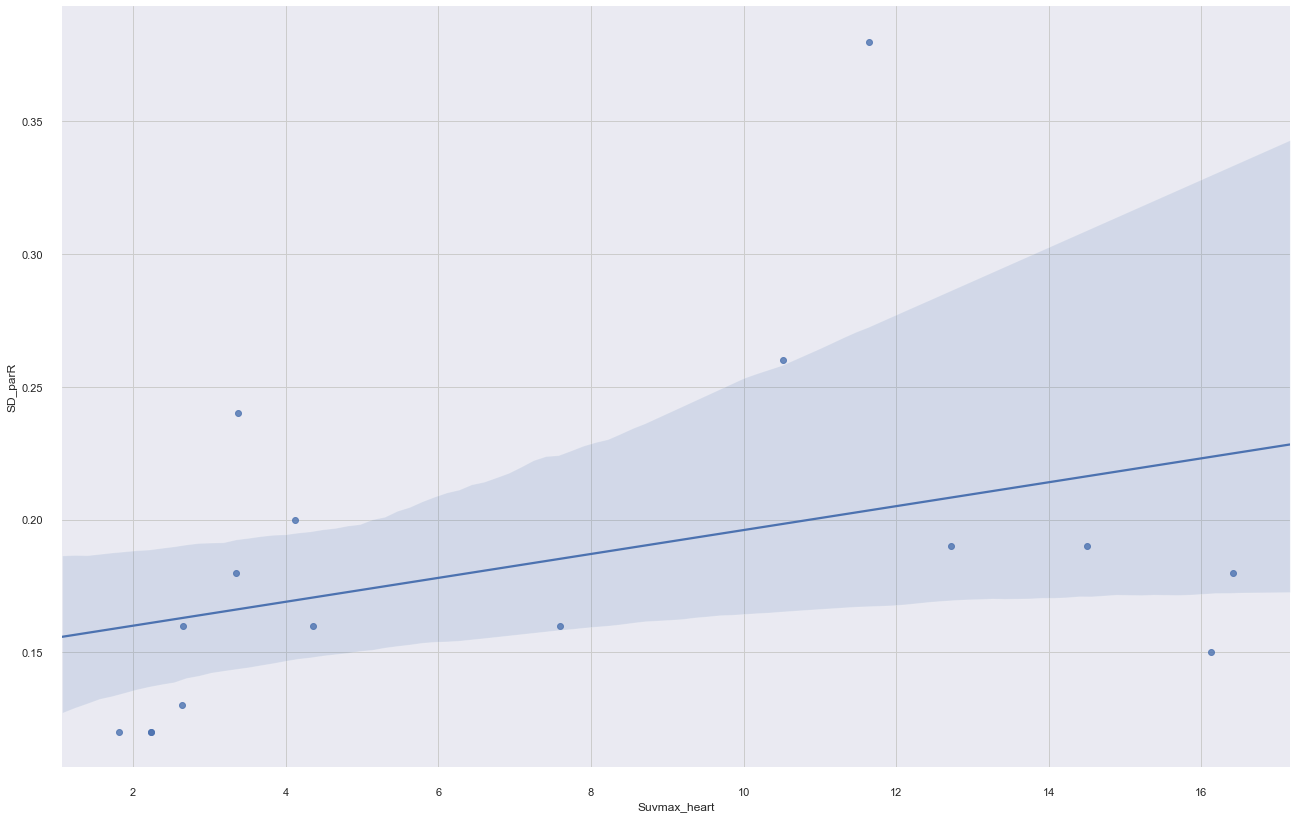

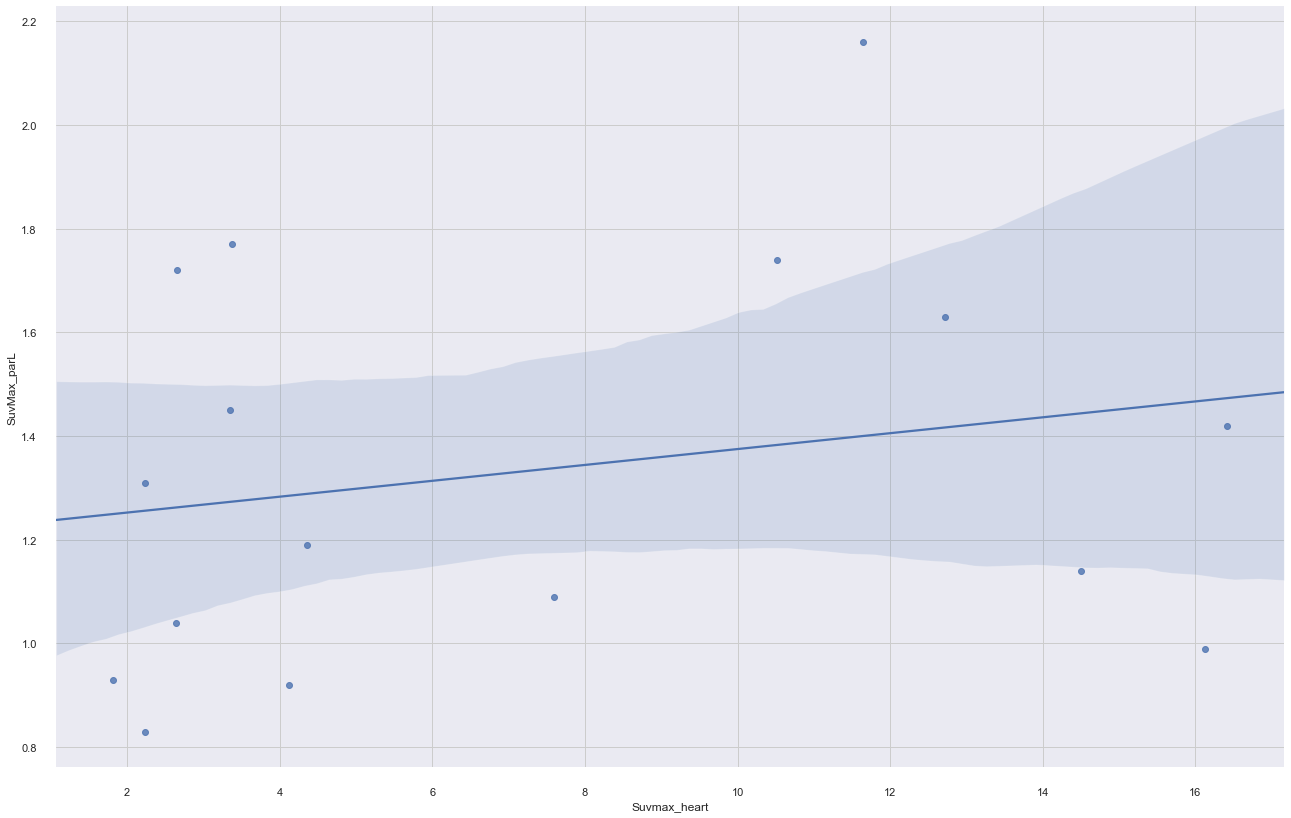

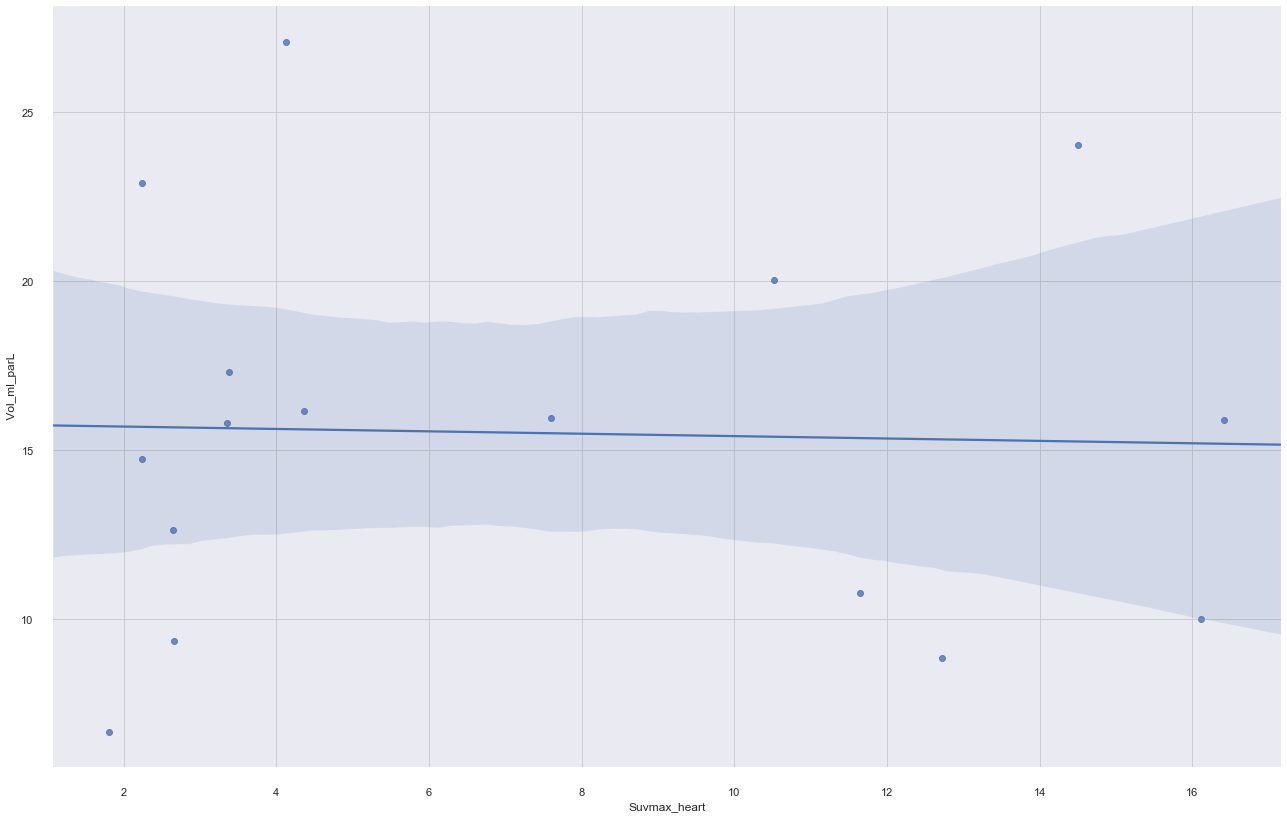

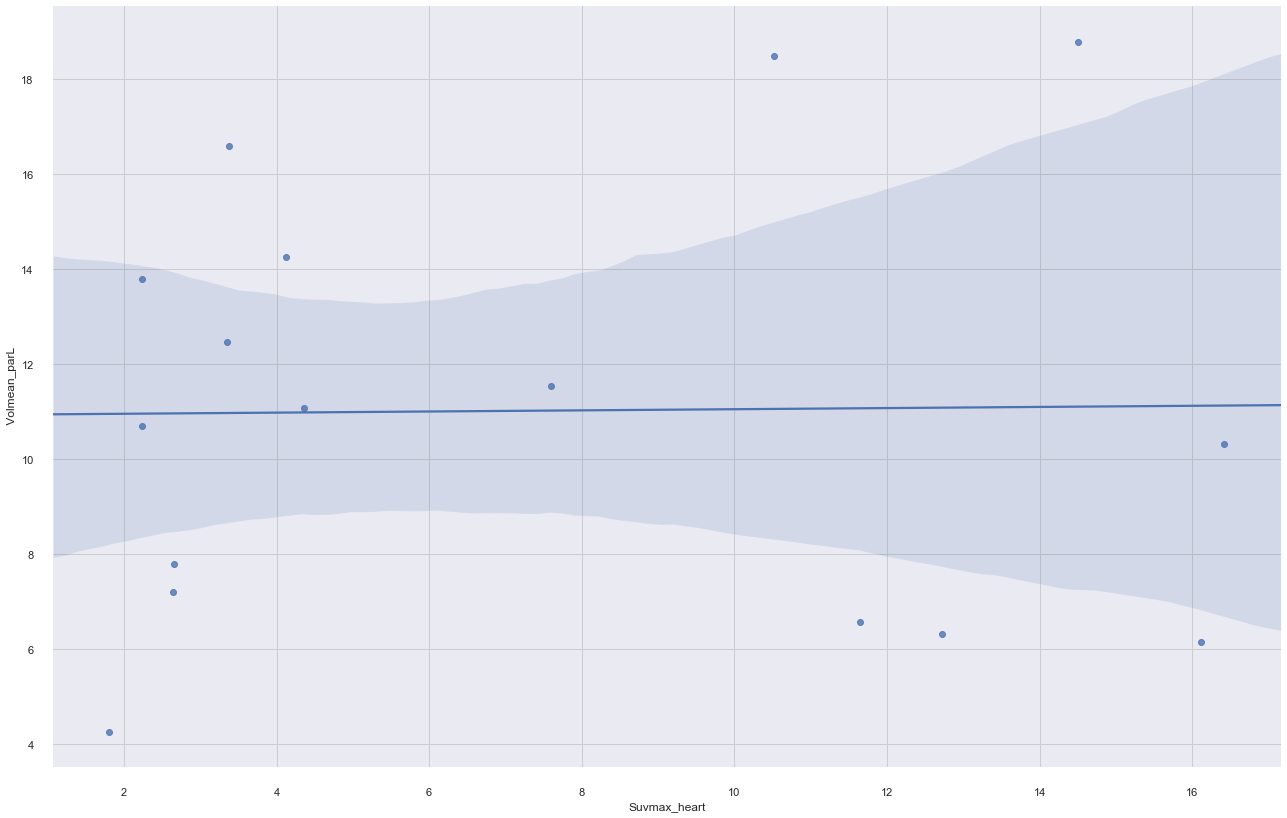

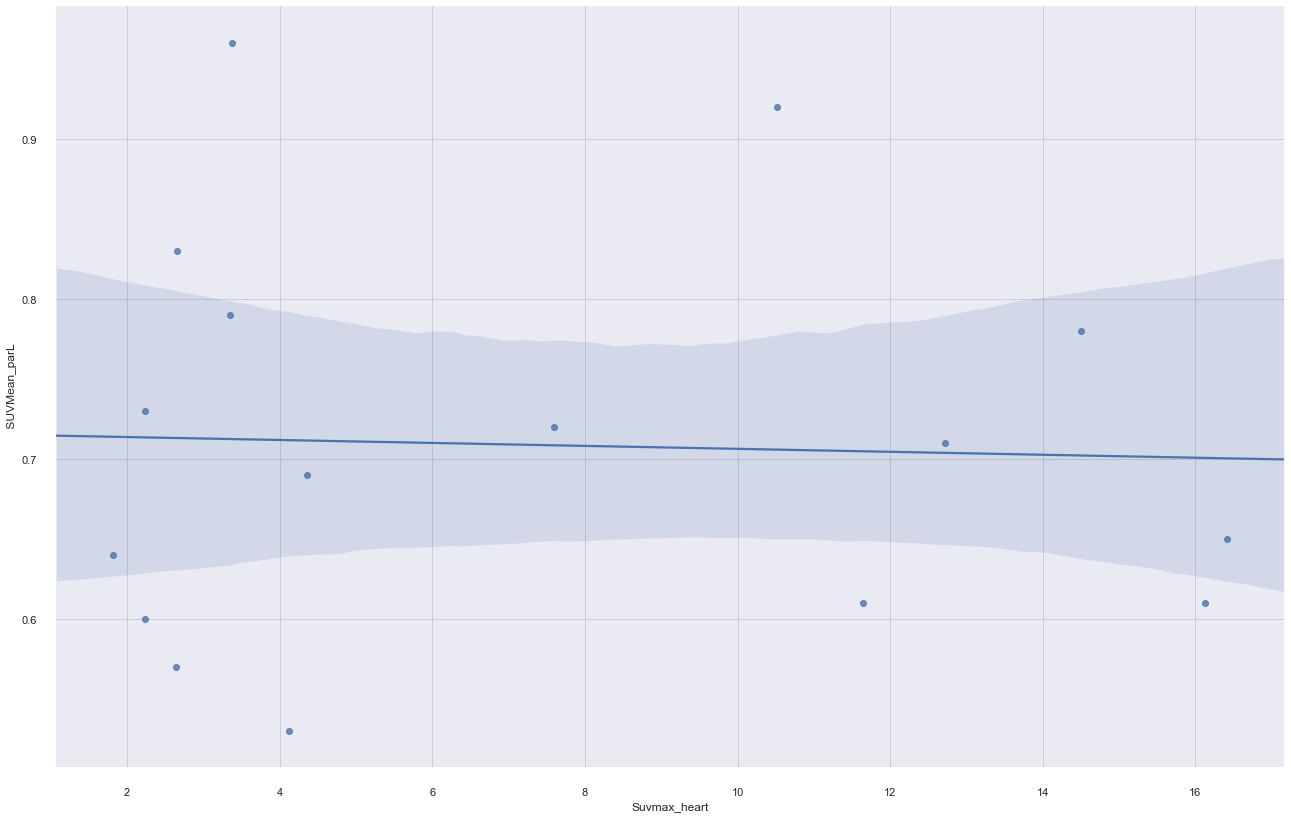

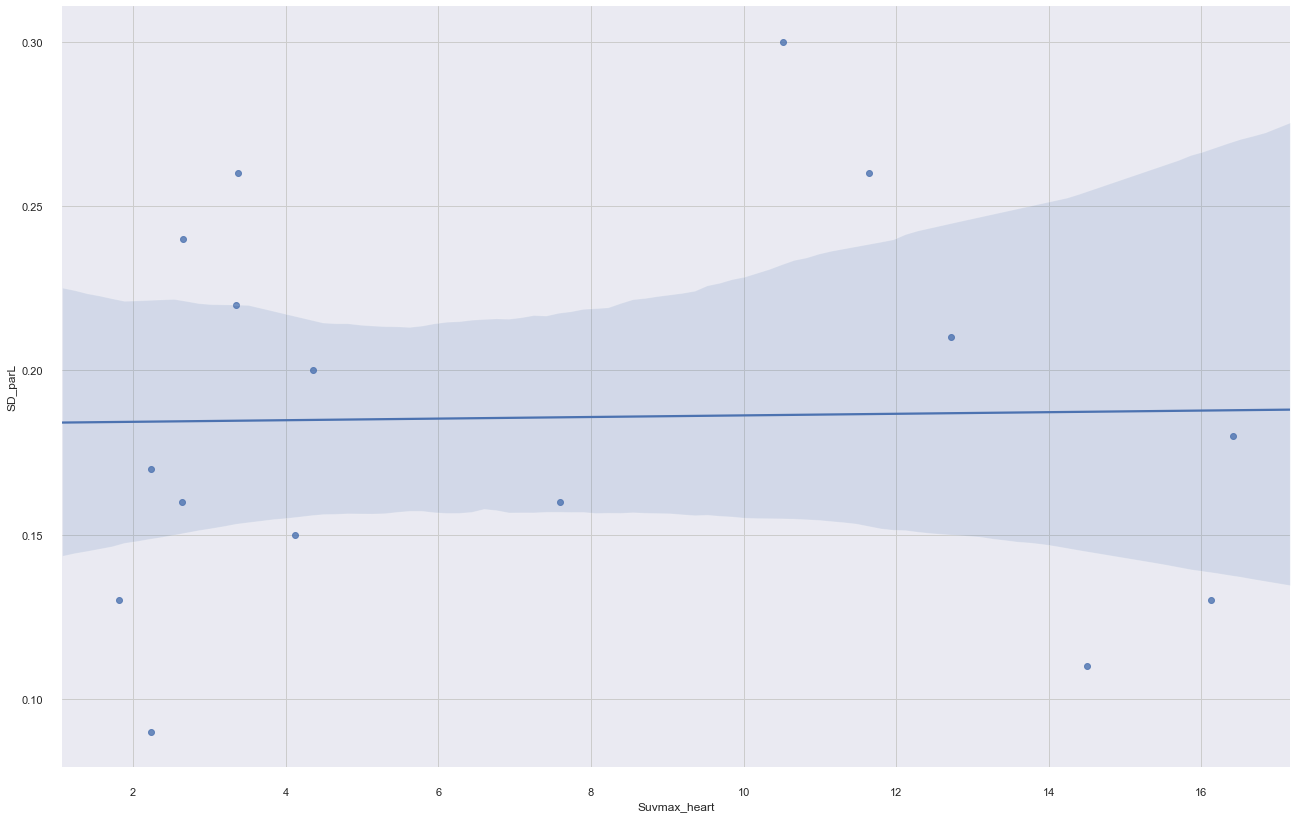

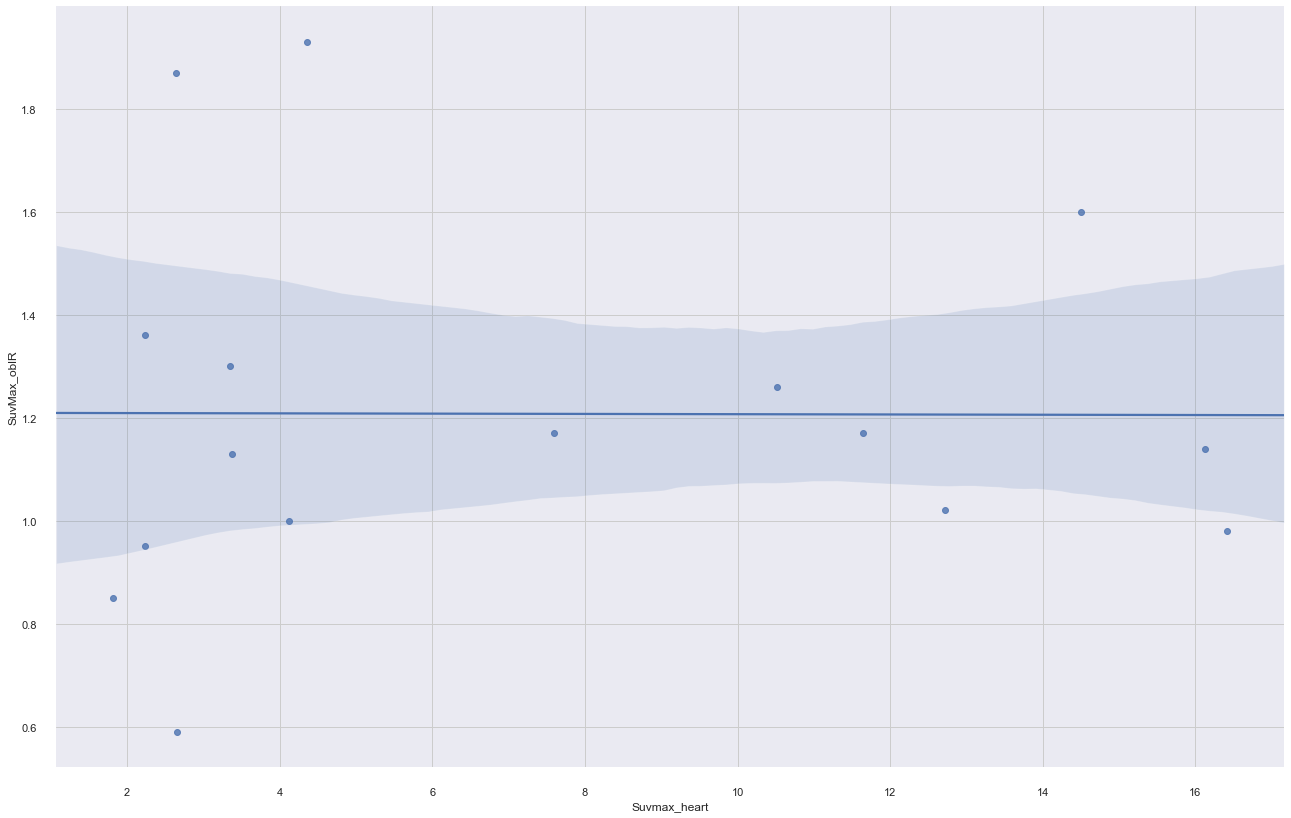

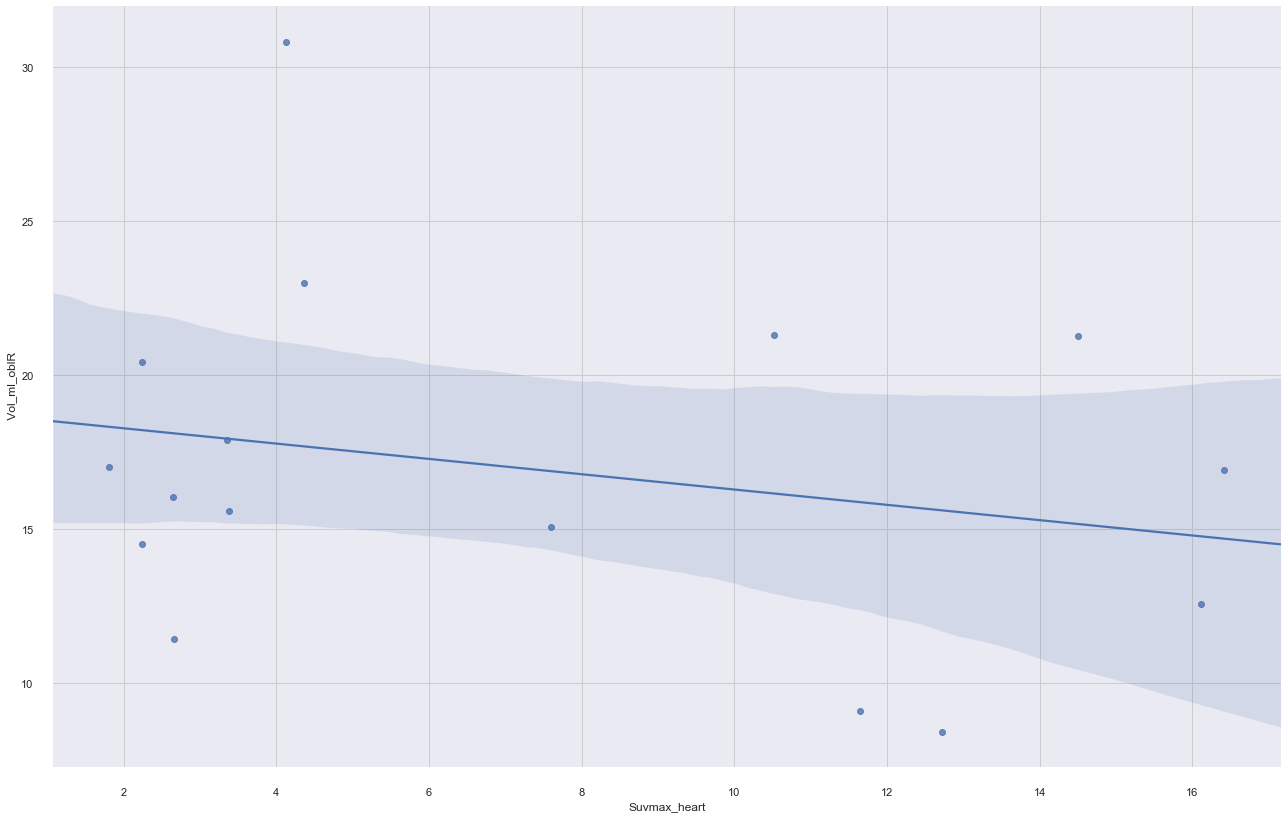

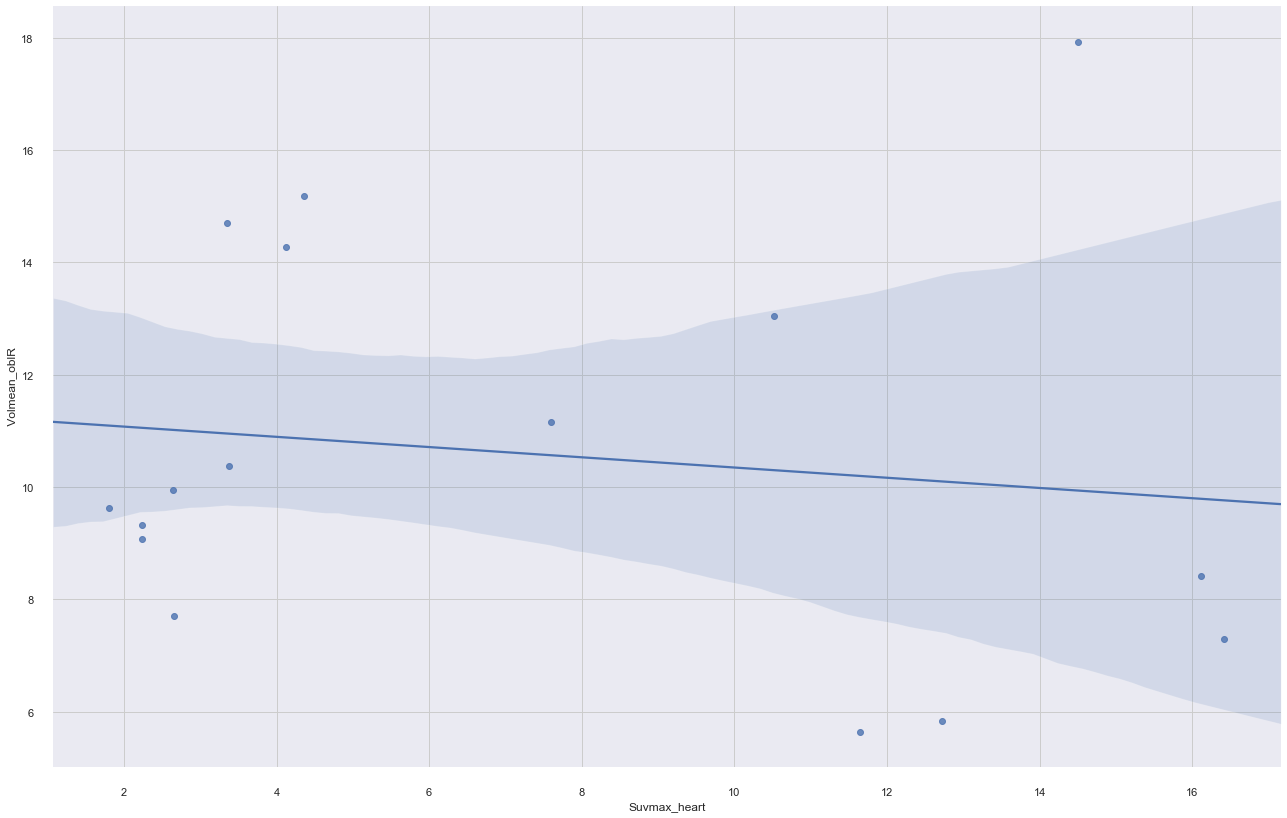

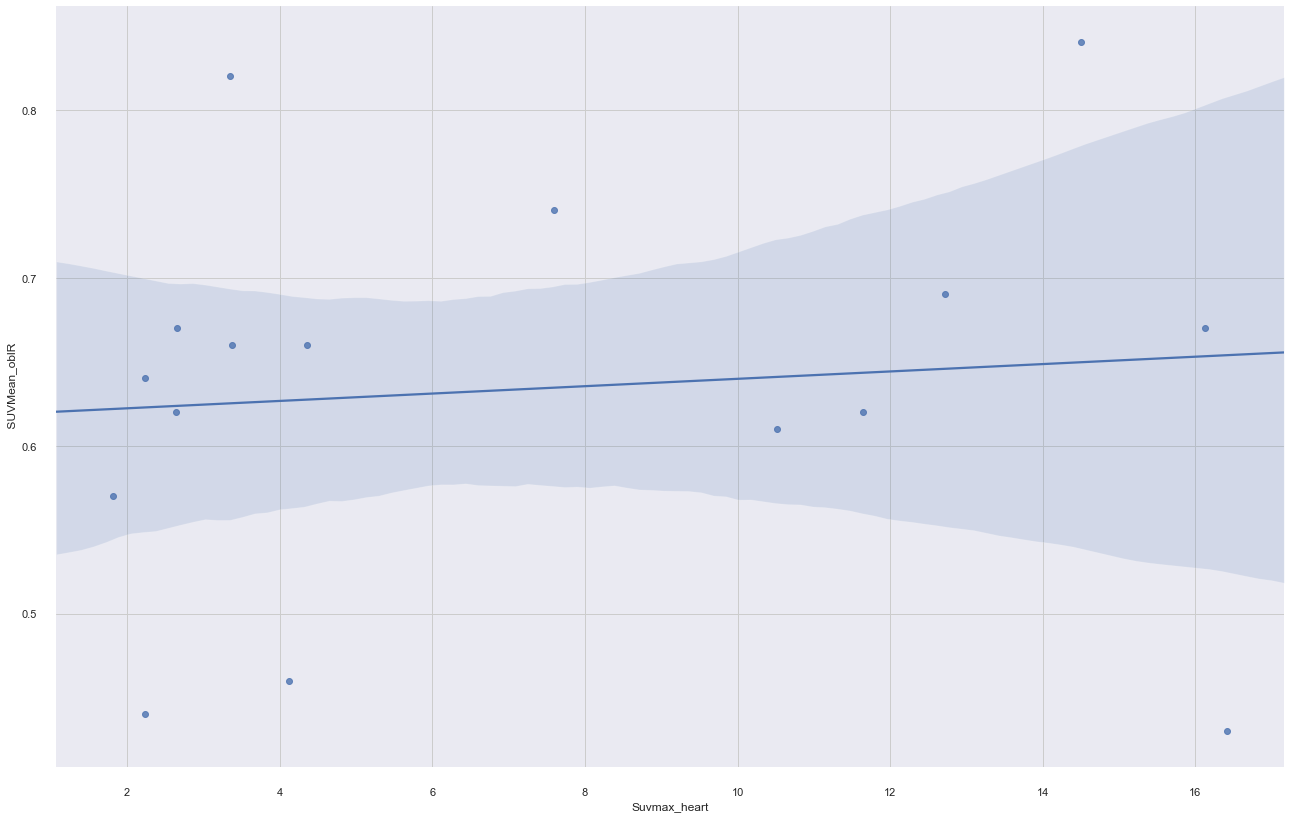

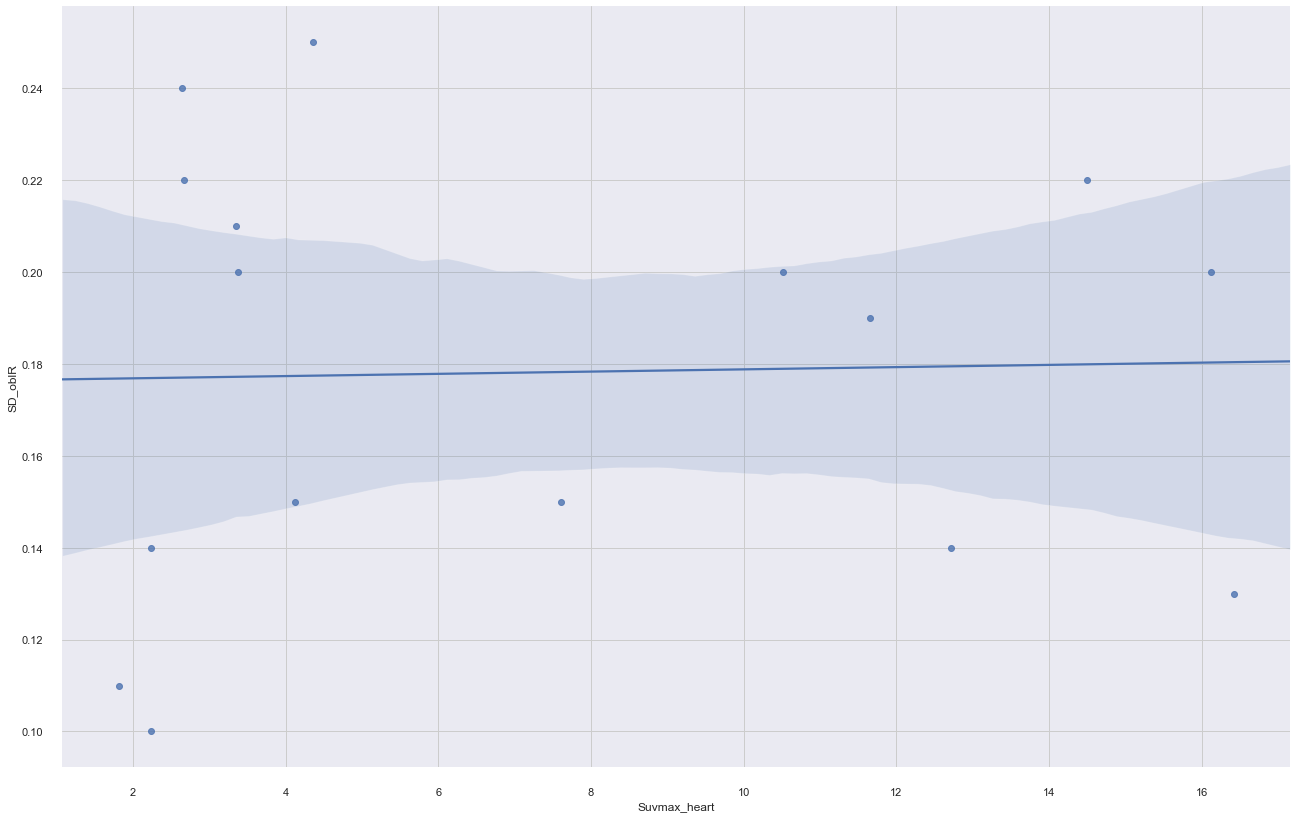

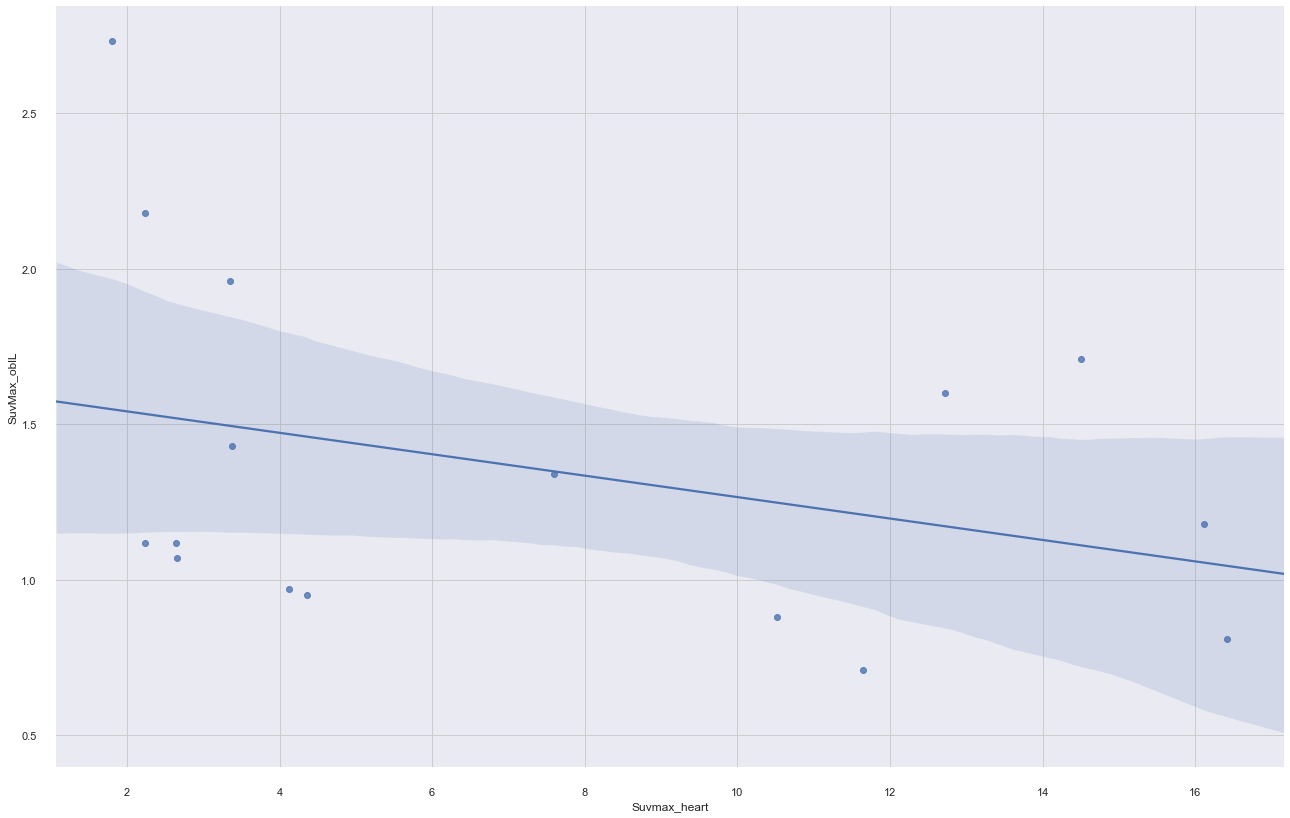

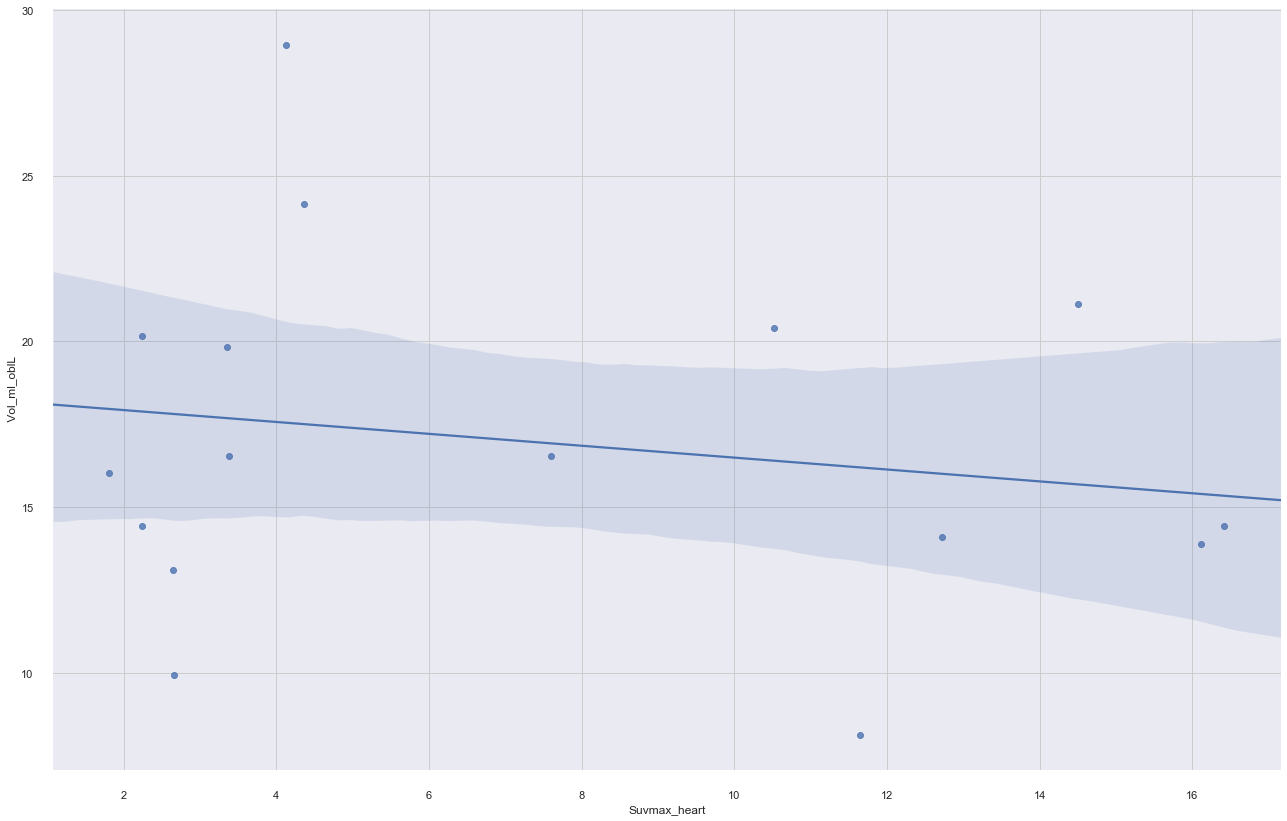

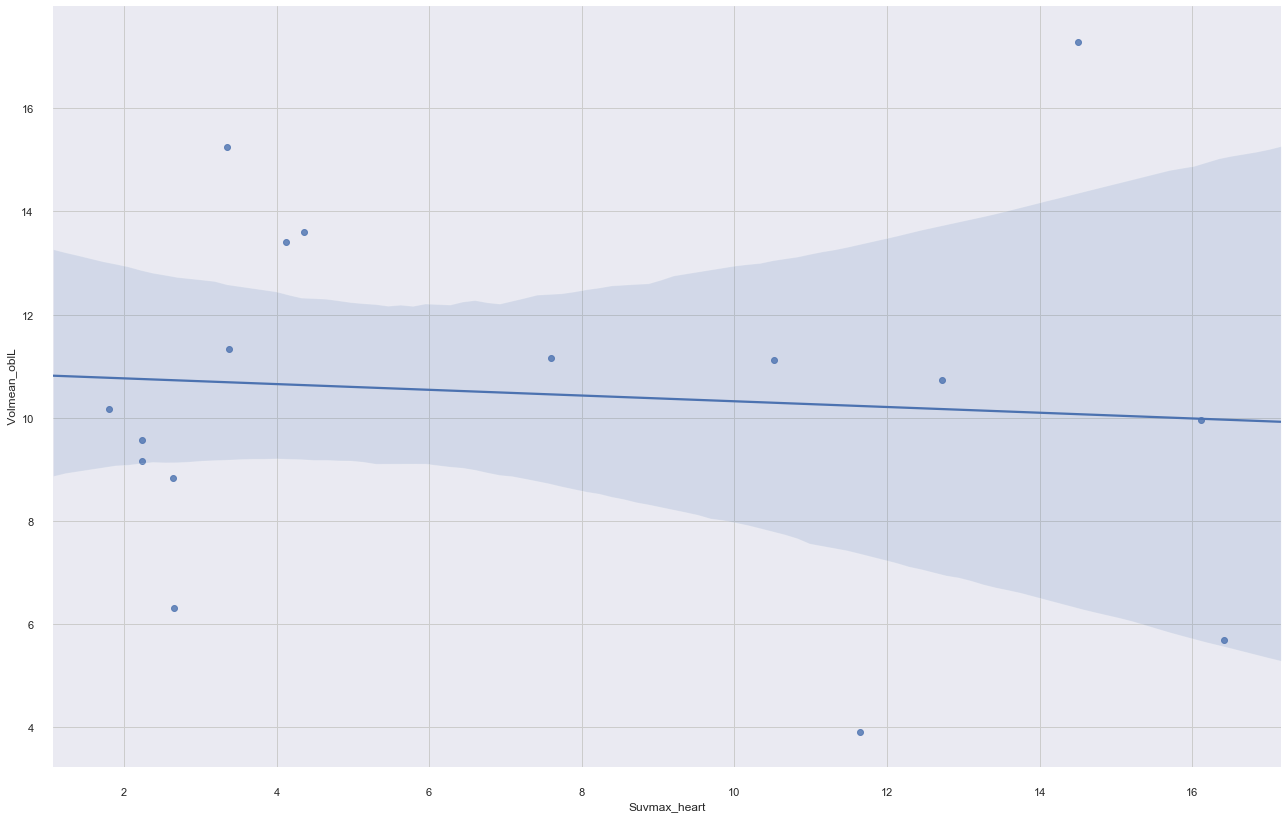

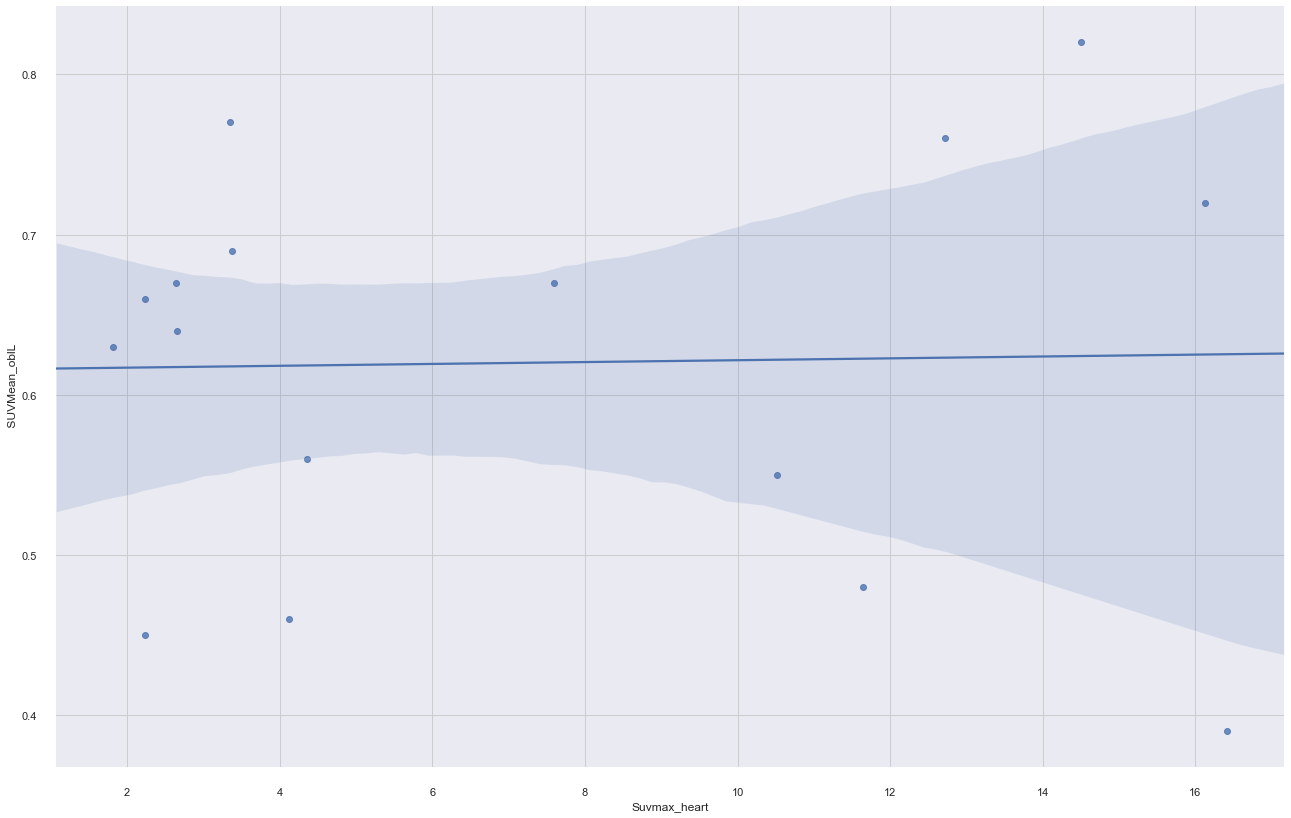

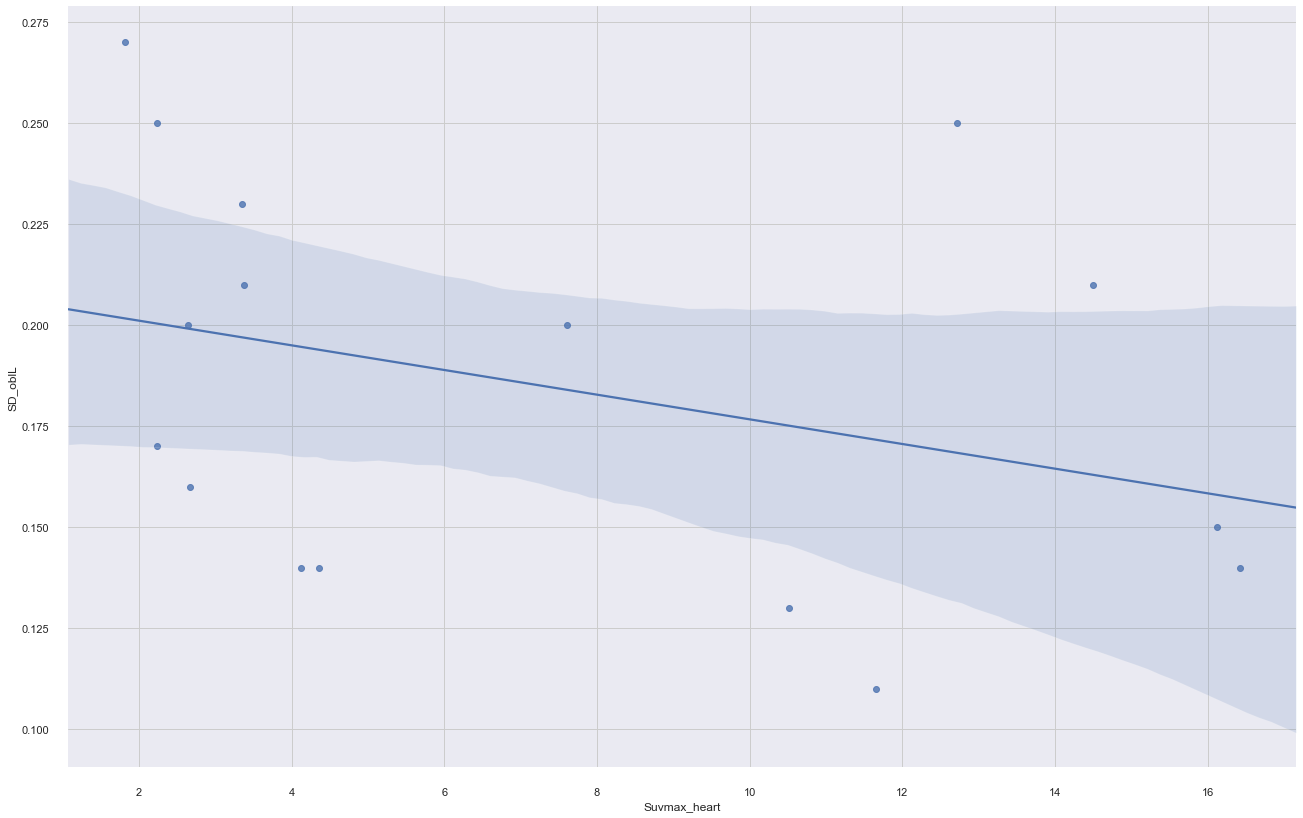

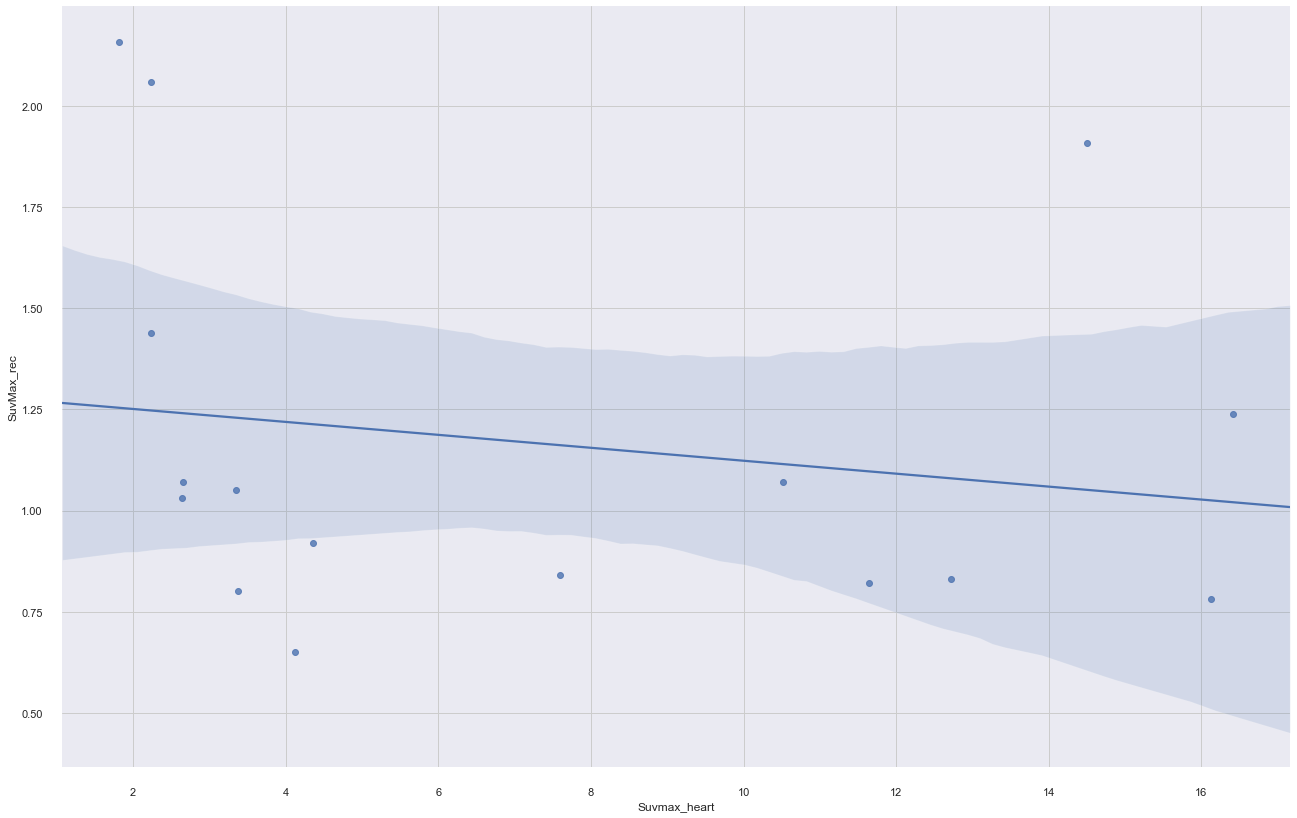

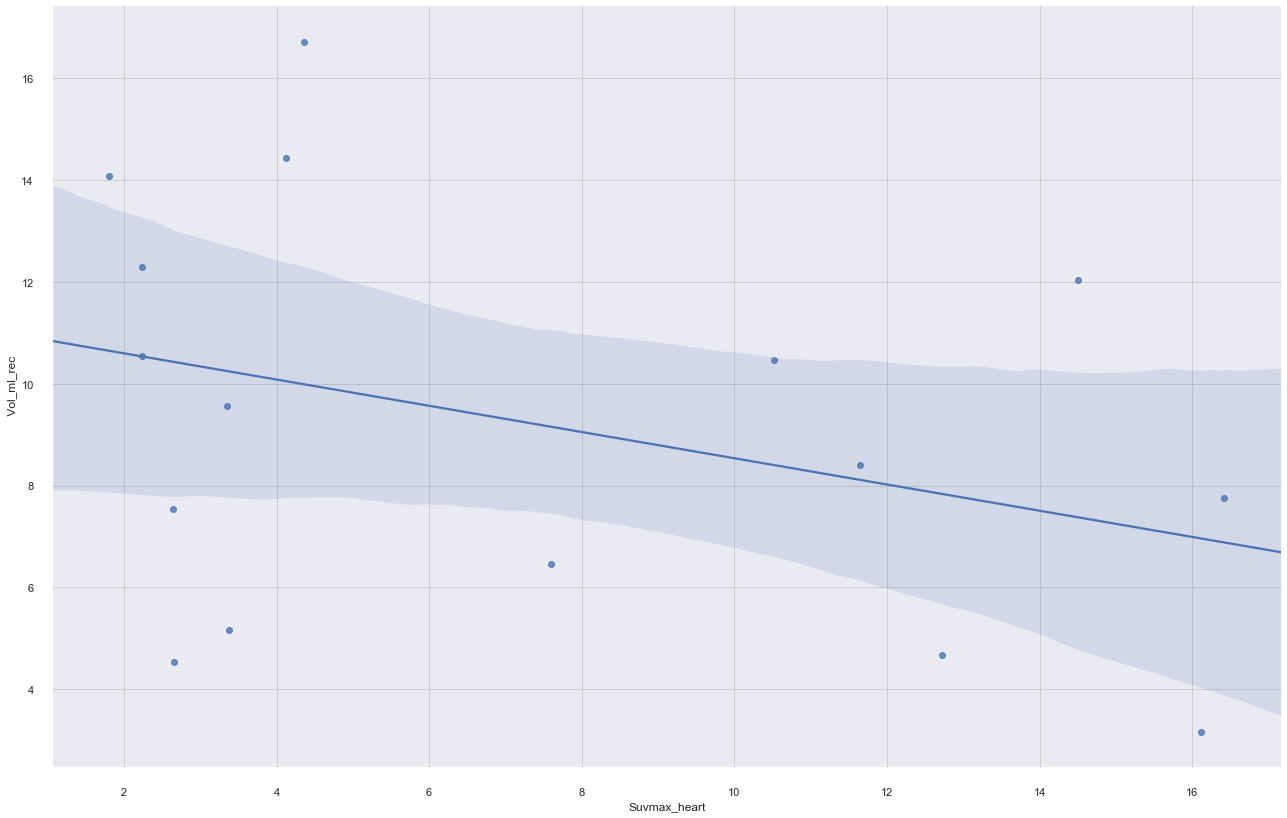

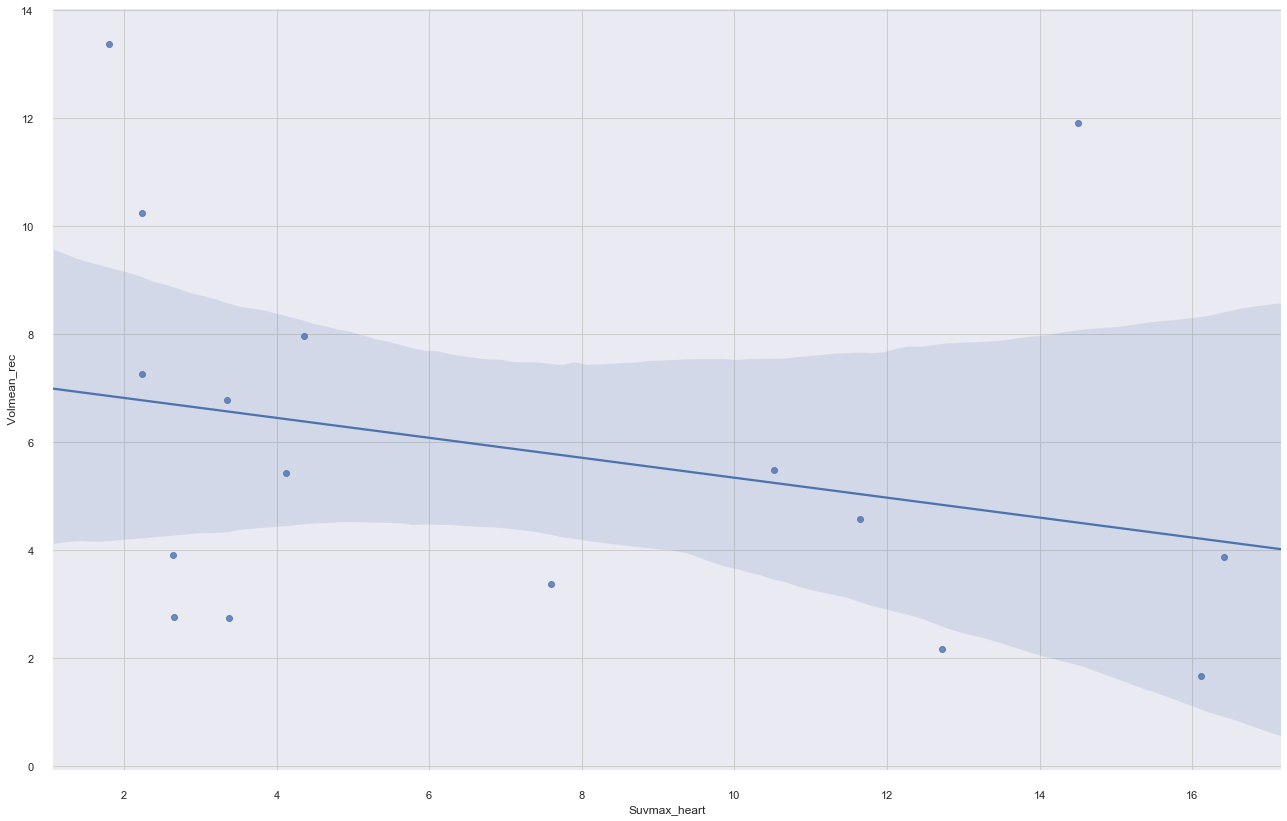

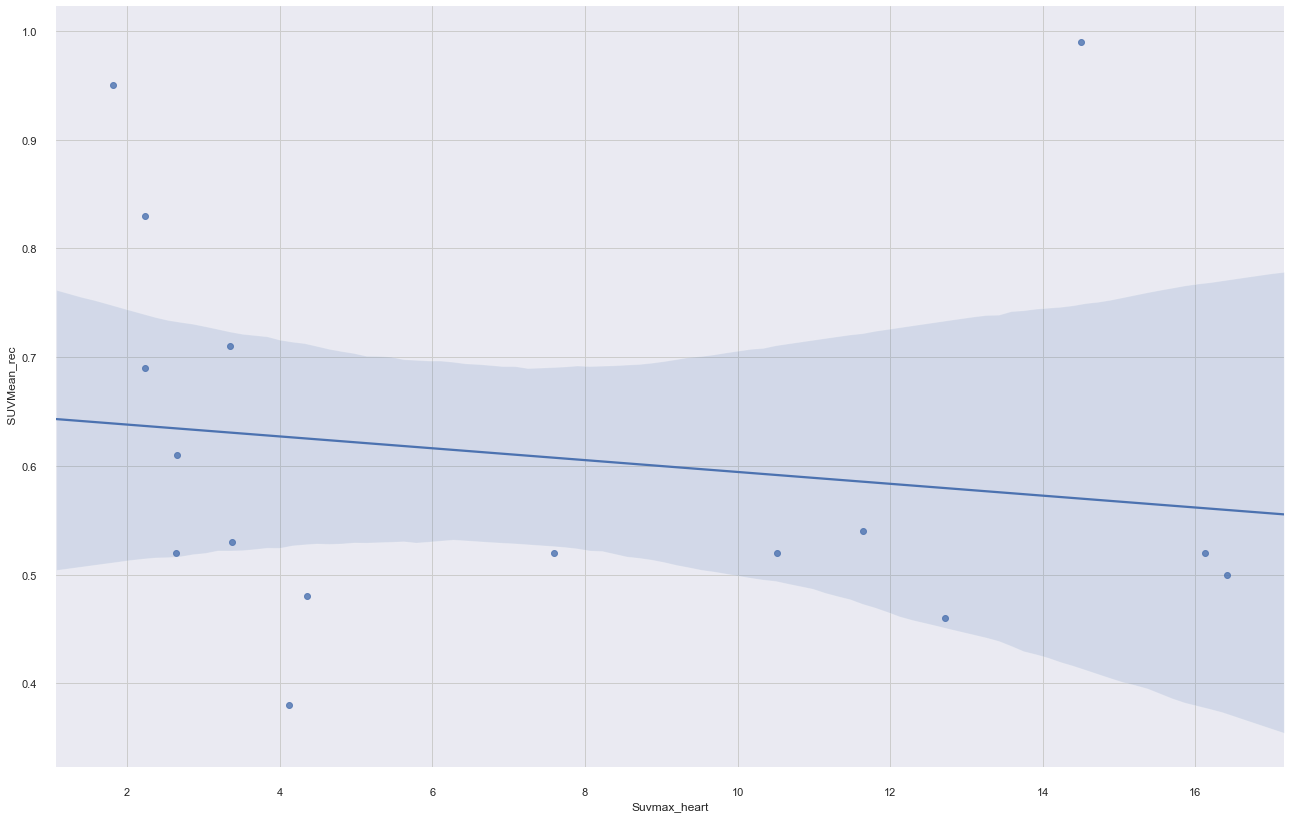

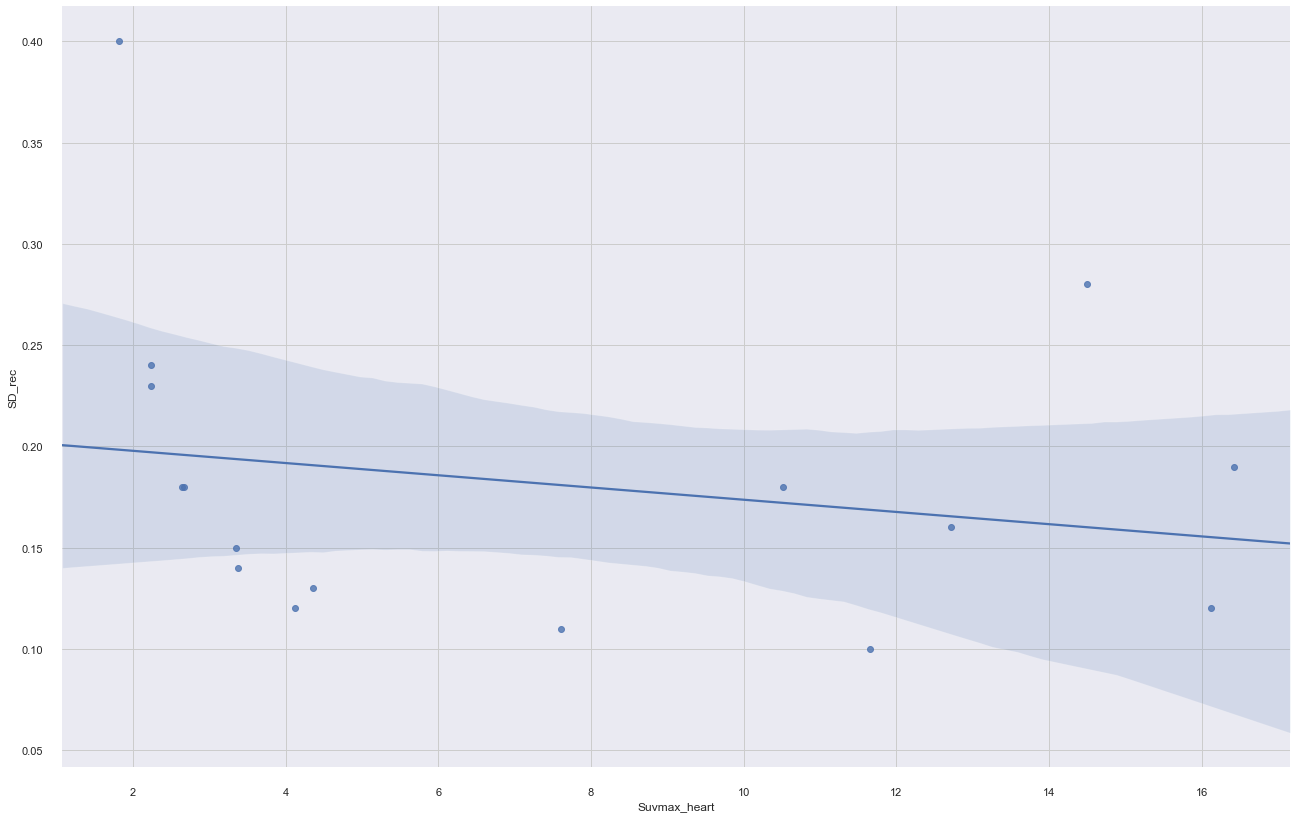

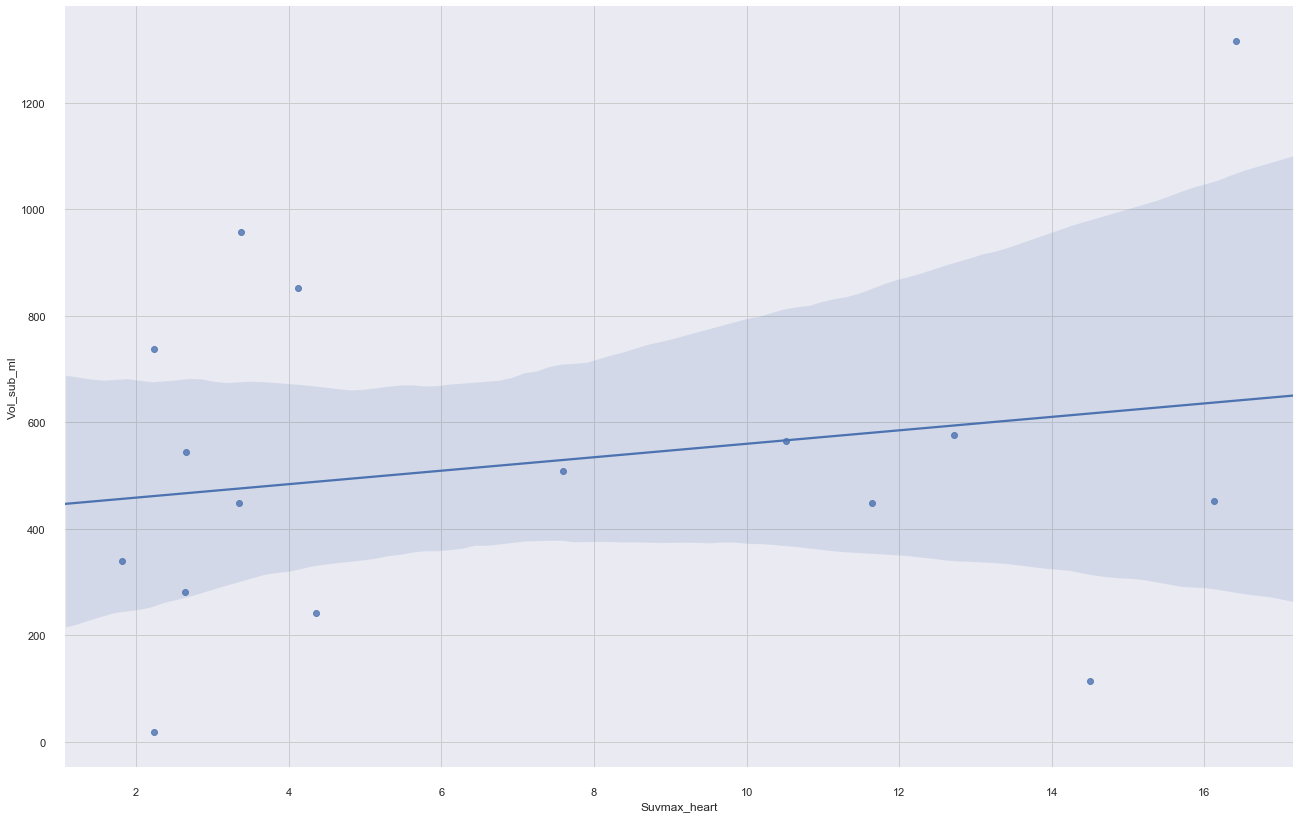

In [25]:
columns = data_continous.columns.to_list()

for column in data_continous.columns[1:]:  # Loop over all columns except 'Location'
    sns.set()
    fig, ax = plt.subplots()
    sns.set(style="ticks")
    sns.regplot(x='Suvmax_heart', y=column, data=data_continous)  # column is chosen here
    sns.despine(offset=10, trim=True) 
    fig.set_size_inches(22,14)
    plt.savefig('suppl/plots/{}.pdf'.format(column), bbox_inches='tight')

In [9]:
columns = [' Vol_mean_vat', 'Vol_mean_deltoid', 'Age', 'SD_brain', 'SD_scwat', 'SUVMean_deltoid', 'Suvmax_scwat', 'Suvmax_deltoid', 'Vol_ml_vat']
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(data, x="Alive", y="Suvmax_scwat", trendline="ols", template='plotly_white')
fig.update_layout(
    legend=dict(
    orientation="h"),
    xaxis_title="Alive",
    yaxis_title="Vmean VAT (ml)",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="black"
    )
)
fig.show()

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_continous)
X=scaler.transform(data_continous)   
X

model = PCA(n_components=10).fit(X)
X_pc = model.transform(X)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = data_continous.columns.to_list()
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
names_pc = pd.DataFrame(dic.items())
names_pc

0               1
0  PC0      Vol_ml_psL
1  PC1    Suvmax_scwat
2  PC2             WBM
3  PC3         Suv Max
4  PC4  SUVqPeak_tumor
5  PC5    Vol_ml_tumor
6  PC6    Suvmax_brain
7  PC7        SD_liver
8  PC8     SuvMax_parL
9  PC9          Height

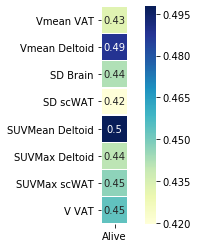

In [9]:
import seaborn as sns
sns.heatmap(corr_heat.transpose(), annot=True, square=True, linewidths=.5, cmap="YlGnBu")
#plt.savefig("corr_pointb.png")

anova for lusc and luad - by STAGE(corr by ordinal)

In [11]:
lusc_dict = {'TTN':['61.11%'],
       'TP53':['44.44%'],
        'USH2A':['38.89%'],
    'CSMD3':['27.78%'], 
        'XIRP2':['27.78%'],
     'CDH10':['27.78%'], 'CDH18':['27.78%'],'RYR2':['27.78%'], 
             'PCDHA7':['22.22%'], 'KIF1A':['22.22%'], 
            'SYNE1':['22.22%'],
            'FAM135B':['22.22%'], 'POTEC':['16.67%'], 'LTBP2':['16.67%'], 
            'PIK3CA':['16.67%'], 'CACNA1E':['16.67%'], 'ZNF638':['16.67%'], 
             'CADPS2':['16.67%'], 'DNAH11':['16.67%'], 'SHANK1':['16.67%']}
corr_heat = pd.DataFrame(lusc_dict)
corr_heat = corr_heat.rename(index={0: 'TCGA-LUSC'})
corr_heat

TTN    TP53   USH2A   CSMD3   XIRP2   CDH10   CDH18    RYR2  \
TCGA-LUSC  61.11%  44.44%  38.89%  27.78%  27.78%  27.78%  27.78%  27.78%   

           PCDHA7   KIF1A   SYNE1 FAM135B   POTEC   LTBP2  PIK3CA CACNA1E  \
TCGA-LUSC  22.22%  22.22%  22.22%  22.22%  16.67%  16.67%  16.67%  16.67%   

           ZNF638  CADPS2  DNAH11  SHANK1  
TCGA-LUSC  16.67%  16.67%  16.67%  16.67%

In [ ]:
luad_dict = {'TTN':['61.11%'],
       'TP53':['44.44%'],
        'USH2A':['38.89%'],
    'CSMD3':['27.78%'], 
        'XIRP2':['27.78%'],
     'CDH10':['27.78%'], 'CDH18':['27.78%'],'RYR2':['27.78%'], 
             'PCDHA7':['22.22%'], 'KIF1A':['22.22%'], 
            'SYNE1':['22.22%'],
            'FAM135B':['22.22%'], 'POTEC':['16.67%'], 'LTBP2':['16.67%'], 
            'PIK3CA':['16.67%'], 'CACNA1E':['16.67%'], 'ZNF638':['16.67%'], 
             'CADPS2':['16.67%'], 'DNAH11':['16.67%'], 'SHANK1':['16.67%']}
corr_heat = pd.DataFrame(luad_dict)
corr_heat = corr_heat.rename(index={0: 'TCGA-LUAD'})
corr_heat

TP53
